### Random Number Generator for shuffling the cards

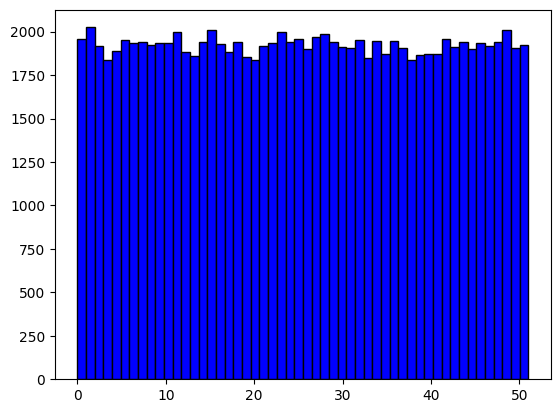

In [172]:
# we will be using this for the random number generator
import random
# linear random number generator
import matplotlib.pyplot as plt
def lcg(seed):
    a = 16843009 
    c = 826366247 
    m = 2**32
    seed = (a * seed + c) % m
    # return a random integer
    return seed

# display the random numbers mod 52 using matplotlib
random_numbers = []
def display_random_numbers(seed):
    for i in range(100000):
        seed = lcg(seed)
        random_numbers.append(seed % 52)
    # show bargraph of random numbers
    plt.hist(random_numbers ,bins = 52,color='blue', edgecolor='black')
    plt.show()
    # print the occurance of each random number
    
seed = 71
display_random_numbers(seed)



### we have equal probability of getting any number between 0 and 51 (i.e. any card in the deck) so fair shuffle

### Programing The Deck

In [173]:
class Deck:
    def __init__(self):
        self.num_decks = 1
        self.deck = [i%52 for i in range(52 * self.num_decks)]
        self.current_seed = 123
    
    def __init__(self,num_decks,seed = 123):
        self.num_decks = num_decks
        self.deck = [i%52 for i in range(52 * self.num_decks)]
        self.current_seed = seed

    def display_deck(self):
        print(self.deck)

    def shuffle(self):
        new_deck = []
        seed = lcg(self.current_seed)
        while(len(new_deck) < 52 * self.num_decks):
            seed = lcg(seed)
            card = seed % 52
            # to reject if we have already added the card the maximum number of times
            if new_deck.count(card) < self.num_decks:
                new_deck.append(card)
        self.current_seed = seed
        self.deck = new_deck
    
    def cut(self,position):
        if position < 0 or position > 52 * self.num_decks:
            print("Invalid cut position")
            return
        self.deck = self.deck[position:] + self.deck[:position]

    def deal(self):
        if len(self.deck) == 0:
            print("No more deck to deal")
            return
        return self.deck.pop()


# script to check if shuffle not producing extra cards
# n = 6
# Deck1 = Deck(n,123)
# # make a hashmap of the deck for occurance
# Deck1.shuffle()
# Deck1.display_deck()
# deck_map = {}
# for i in range(52):
#     deck_map[i] = 0
# for i in range(52 * n):
#     card = Deck1.deal()
#     deck_map[card] += 1
# print(deck_map)

### Stuff for calculating the points in a hand

In [174]:
# utility hash maps for card values
card_map = {
    0 : 'Ah',
    1 : '2h',
    2 : '3h',
    3 : '4h',
    4 : '5h',
    5 : '6h',
    6 : '7h',
    7 : '8h',
    8 : '9h',
    9 : '10h',
    10 : 'Jh',
    11 : 'Qh',
    12 : 'Kh',
    13 : 'Ad',
    14 : '2d',
    15 : '3d',
    16 : '4d',
    17 : '5d',
    18 : '6d',
    19 : '7d',
    20 : '8d',
    21 : '9d',
    22 : '10d',
    23 : 'Jd',
    24 : 'Qd',
    25 : 'Kd',
    26 : 'As',
    27 : '2s',
    28 : '3s',
    29 : '4s',
    30 : '5s',
    31 : '6s',
    32 : '7s',
    33 : '8s',
    34 : '9s',
    35 : '10s',
    36 : 'Js',
    37 : 'Qs',
    38 : 'Ks',
    39 : 'Ac',
    40 : '2c',
    41 : '3c',
    42 : '4c',
    43 : '5c',
    44 : '6c',
    45 : '7c',
    46 : '8c',
    47 : '9c',
    48 : '10c',
    49 : 'Jc',
    50 : 'Qc',
    51 : 'Kc'
}

num_to_card = {
    'Ah' : 0,
    '2h' : 1,
    '3h' : 2,
    '4h' : 3,
    '5h' : 4,
    '6h' : 5,
    '7h' : 6,
    '8h' : 7,
    '9h' : 8,
    '10h' : 9,
    'Jh' : 10,
    'Qh' : 11,
    'Kh' : 12,
    'Ad' : 13,
    '2d' : 14,
    '3d' : 15,
    '4d' : 16,
    '5d' : 17,
    '6d' : 18,
    '7d' : 19,
    '8d' : 20,
    '9d' : 21,
    '10d' : 22,
    'Jd' : 23,
    'Qd' : 24,
    'Kd' : 25,
    'As' : 26,
    '2s' : 27,
    '3s' : 28,
    '4s' : 29,
    '5s' : 30,
    '6s' : 31,
    '7s' : 32,
    '8s' : 33,
    '9s' : 34,
    '10s' : 35,
    'Js' : 36,
    'Qs' : 37,
    'Ks' : 38,
    'Ac' : 39,
    '2c' : 40,
    '3c' : 41,
    '4c' : 42,
    '5c' : 43,
    '6c' : 44,
    '7c' : 45,
    '8c' : 46,
    '9c' : 47,
    '10c' : 48,
    'Jc' : 49,
    'Qc' : 50,
    'Kc' : 51
}

def value(card):
    # aces are 11
    if card % 13 == 0:
        return 11
    elif card % 13 >= 9:
        return 10
    else:
        return card % 13 + 1
    
def calculate_points(hand):
    # if no aces in hand then return the sum (aces begin with letter A and end with s,d,c,h)
    if 'As' not in hand and 'Ad' not in hand and 'Ac' not in hand and 'Ah' not in hand:
        return sum([value(num_to_card[card]) for card in hand])
    # if we have s in hand then we need to check if we can reduce the value of the ace to 1 if score is greater than 21
    points = sum([value(num_to_card[card]) for card in hand])
    num_aces = hand.count('As') + hand.count('Ad') + hand.count('Ac') + hand.count('Ah')
    if points > 21:
        for i in range(num_aces):
            points -= 10
            if points <= 21:
                return points
    return points



### File I/O

In [175]:
with open('game_history.txt','w') as f:
    f.write("Game history\n")
    
def fprint(str):
    with open('game_history.txt','a') as f:
        f.write(str)
def print_cards(player_hand,dealer_hand,balance):
    fprint("Player hand: " + str(player_hand) + "\n")
    fprint("Dealer hand: " + str(dealer_hand) + "\n")
    fprint("balance: " + str(balance) + "\n") 
    fprint("**************" + "\n")

### Simluating One Round of Black Jack

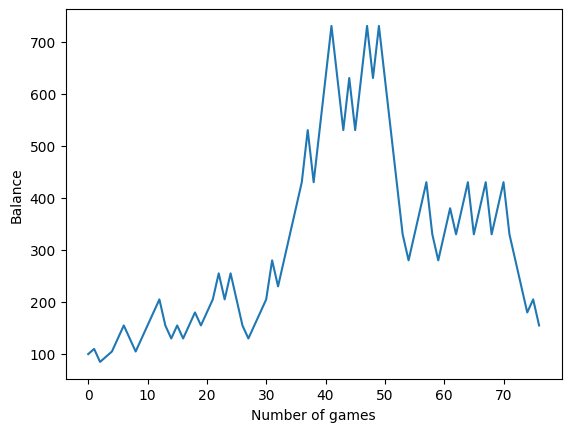

In [176]:
# the game
seed = 0
deck = Deck(6,seed)
deck.shuffle()
balance = 100
balance_history = [balance]

balance_history = [balance]
for i in range(100):
    if balance <= 100:
        bet = 10
    elif balance <= 200:
        bet = 25
    elif balance <= 400:
        bet = 50
    elif balance <= 800:
        bet = 100
    elif balance <= 1600:
        bet = 200
    else:
        bet = 500

    # check if deck is sufficient we reshuffle when we have 1/3 of the deck left
    if len(deck.deck) < 52 * deck.num_decks / 3:
        fprint("reshuffling deck\n")
        # print("reshuffling deck")
        deck.shuffle()

    player_hand = []
    player_points = 0
    dealer_hand = []
    dealer_points = 0
    card = -1
    # initial game
    card = deck.deal()
    player_hand.append(card_map[card])
    player_points = calculate_points(player_hand)
    
    card = deck.deal()
    dealer_hand.append(card_map[card])
    dealer_points = calculate_points(dealer_hand)
    
    card = deck.deal()
    player_hand.append(card_map[card])
    player_points = calculate_points(player_hand)

    card = deck.deal()
    dealer_hand.append(card_map[card])
    dealer_points = calculate_points(dealer_hand)
        
    # blackjack if player has 21
    if player_points == 21:
        balance += bet*1.5
        balance_history.append(balance)
        fprint("Player wins\n")
        print_cards(player_hand,dealer_hand,balance)
        continue
    
    # we assume to play the bet like the dealer till we get around 17
    while(player_points < 17):
        card = deck.deal()
        player_hand.append(card_map[card])
        player_points = calculate_points(player_hand)
        
        
    if player_points > 21:
        balance -= bet
        balance_history.append(balance)
        fprint("Dealer wins\n")
        print_cards(player_hand,dealer_hand,balance)
        continue

    if dealer_points == 21 and player_points != 21:
        balance -= bet
        balance_history.append(balance)
        fprint("Dealer wins\n")
        print_cards(player_hand,dealer_hand,balance)
        
    while(dealer_points < 17):
        card = deck.deal()
        dealer_hand.append(card_map[card])
        dealer_points = calculate_points(dealer_hand)

        if dealer_points > 21:
            balance += bet
            balance_history.append(balance)
            fprint("Player wins\n")
            print_cards(player_hand,dealer_hand,balance)

    if player_points > dealer_points:
        balance += bet
        balance_history.append(balance)
        fprint("Player wins\n")
        print_cards(player_hand,dealer_hand,balance)
    
    if player_points == dealer_points:
        fprint("Draw\n")
        print_cards(player_hand,dealer_hand,balance)
    if balance<=0:
        break

plt.plot(balance_history)
plt.xlabel('Number of games')
plt.ylabel('Balance')
plt.show()

### Playing 100 rounds of Black Jack

In [181]:
seed = 54

with open('game_history.txt','w') as f:
    f.write("Game history\n")

end_balance = []
deck = Deck(4,seed)
for i in range(100):
    fprint("~~~~~  Game #" + str(i) + " ~~~~~\n")
    deck.shuffle()
    balance = 100
    balance_history = [balance]
    # say we play 100 games
    while True:
        # bankrupt
        if balance<=0:
            break
        # target balance
        if balance >= 1000:
            break
        
        # betting strategy
        # bet = 50
        elif balance <= 100:
            bet = 10
        elif balance <= 200:
            bet = 25
        elif balance <= 400:
            bet = 50
        elif balance <= 800:
            bet = 100
        elif balance <= 1600:
            bet = 200
        else:
            bet = 500

        # bet = balance
        
        # all in if we go below 10
        if(balance < bet):
            bet = balance

        # check if deck is sufficient we reshuffle when we have 1/3 of the deck left
        if len(deck.deck) < 52 * deck.num_decks / 3:
            fprint("reshuffling deck\n")
            # print("reshuffling deck")
            deck.shuffle()
            
        player_hand = []
        player_points = 0
        dealer_hand = []
        dealer_points = 0
        card = -1   
        # initial game
        deck.cut(lcg(deck.current_seed) % (52*deck.num_decks))

        card = deck.deal()
        player_hand.append(card_map[card])
        player_points = calculate_points(player_hand)

        card = deck.deal()
        dealer_hand.append(card_map[card])
        dealer_points = calculate_points(dealer_hand)
        
        card = deck.deal()
        player_hand.append(card_map[card])
        player_points = calculate_points(player_hand)

        card = deck.deal()
        dealer_hand.append(card_map[card])
        dealer_points = calculate_points(dealer_hand)
            
        
        # blackjack if player has 21
        if player_points == 21:
            balance += bet*1.5
            balance_history.append(balance)
            fprint("Player wins\n")
            fprint("BlackJack!!\n")
            print_cards(player_hand,dealer_hand,balance)
            continue
        
        # we assume to play the bet like the dealer till we get around 17
        while(player_points < 17):
            card = deck.deal()
            player_hand.append(card_map[card])
            player_points = calculate_points(player_hand)
            
            
        if player_points > 21:
            balance -= bet
            balance_history.append(balance)
            fprint("Dealer wins\n")
            fprint("Player Busts\n")
            print_cards(player_hand,dealer_hand,balance)
            continue

        if dealer_points == 21 and player_points != 21:
            balance -= bet
            balance_history.append(balance)
            fprint("Dealer wins\n")
            fprint("Dealer BlackJack\n")
            print_cards(player_hand,dealer_hand,balance)
            
        while(dealer_points < 17):
            card = deck.deal()
            dealer_hand.append(card_map[card])
            dealer_points = calculate_points(dealer_hand)

            if dealer_points > 21:
                balance += bet
                balance_history.append(balance)
                fprint("Player wins\n")
                fprint("Dealer Busts\n")
                print_cards(player_hand,dealer_hand,balance)

        if player_points > dealer_points:
            balance += bet
            balance_history.append(balance)
            fprint("Player wins\n")
            fprint("Player has higher points\n")
            print_cards(player_hand,dealer_hand,balance)
        
        if player_points == dealer_points:
            fprint("Draw\n")
            print_cards(player_hand,dealer_hand,balance)
        
        # stop profit
        
    # plt.plot(balance_history)
    # plt.xlabel('Number of games')
    # plt.ylabel('Balance')
    # plt.show()
    # save the figure
    # plt.savefig('all_fig.png')
    # plt.savefig('fig/fig'+str(i)+'.png')
    # plt.close()
    
    end_balance.append(balance)

# create a pdf of the figures
# from fpdf import FPDF
# pdf = FPDF()
# pdf.set_auto_page_break(auto=True, margin=15)
# pdf.add_page()
# pdf.set_font("Arial", size = 12)
# for i in range(100):
#     pdf.image(os.path.join('fig', f'fig{i}.png'), x = None, y = None, w = 200, h = 150)
# pdf.output("end_balance.pdf")

### End Balance At the end of 100 rounds

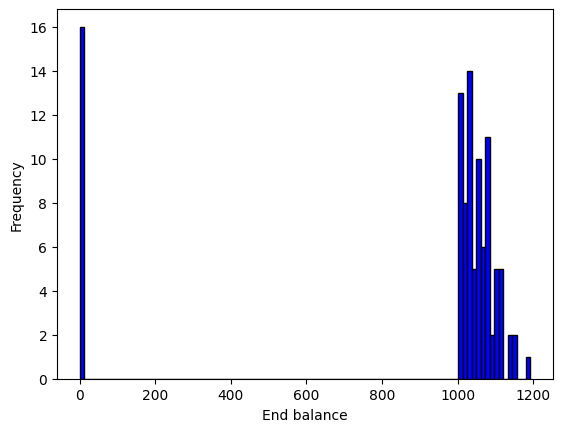

Mean balance:  887.875


In [182]:
plt.hist(end_balance, bins=100, color='blue', edgecolor='black')
plt.xlabel('End balance')
plt.ylabel('Frequency')
plt.show()
print("Mean balance: ", sum(end_balance)/len(end_balance))

In [183]:
# read through game_history.txt to see the game history and find win to lose ratio
win = 0
lose = 0
draw = 0
with open('game_history.txt','r') as f:
    for line in f:
        if line == "Player wins\n":
            win += 1
        elif line == "Dealer wins\n":
            lose += 1
        elif line == "Draw\n":
            draw += 1

print("Win: ", win)
print("Lose: ", lose)
print("Draw: ", draw)

# find bankrupt ratio to total games
bankrupt = 0
total_games = 100
for i in range(100):
    if end_balance[i] <= 0:
        bankrupt += 1

print("Bankrupt ratio: ", bankrupt/total_games)


Win:  6688
Lose:  4979
Draw:  1562
Bankrupt ratio:  0.16


hands:  65
balance:  [100, 100.0, 90.0, 80.0, 90.0, 90.0, 100.0, 110.0, 110.0, 135.0, 110.0, 135.0, 110.0, 135.0, 160.0, 185.0, 210.0, 260.0, 310.0, 360.0, 310.0, 385.0, 385.0, 335.0, 385.0, 435.0, 585.0, 485.0, 385.0, 335.0, 385.0, 335.0, 385.0, 435.0, 335.0, 335.0, 385.0, 335.0, 335.0, 385.0, 435.0, 535.0, 535.0, 535.0, 435.0, 535.0, 435.0, 535.0, 635.0, 535.0, 435.0, 435.0, 335.0, 285.0, 335.0, 385.0, 435.0, 535.0, 435.0, 535.0, 635.0, 735.0, 635.0, 735.0, 835.0, 1135.0]


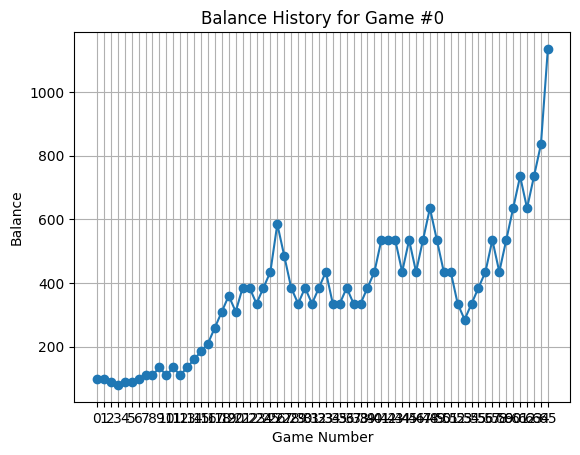

hands:  71
balance:  [100, 110.0, 135.0, 160.0, 160.0, 185.0, 210.0, 160.0, 160.0, 160.0, 135.0, 110.0, 135.0, 160.0, 185.0, 222.5, 272.5, 222.5, 272.5, 222.5, 272.5, 322.5, 372.5, 322.5, 372.5, 322.5, 372.5, 422.5, 572.5, 672.5, 772.5, 672.5, 572.5, 672.5, 572.5, 672.5, 572.5, 672.5, 572.5, 672.5, 572.5, 672.5, 672.5, 572.5, 672.5, 672.5, 572.5, 672.5, 572.5, 472.5, 572.5, 472.5, 572.5, 672.5, 772.5, 872.5, 672.5, 572.5, 472.5, 372.5, 372.5, 322.5, 372.5, 422.5, 522.5, 622.5, 772.5, 772.5, 672.5, 772.5, 872.5, 1072.5]


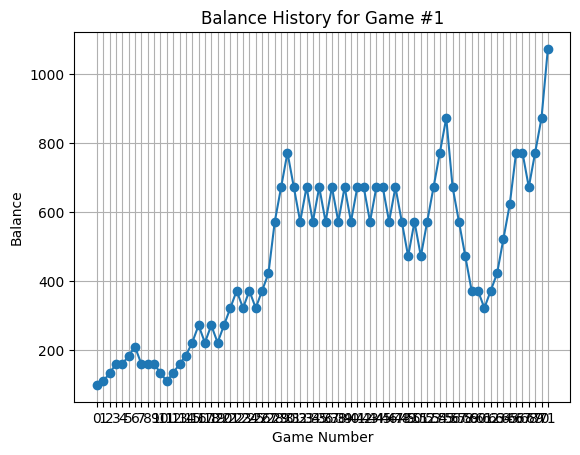

hands:  210
balance:  [100, 90.0, 100.0, 110.0, 85.0, 75.0, 85.0, 85.0, 100.0, 90.0, 100.0, 110.0, 85.0, 95.0, 85.0, 95.0, 85.0, 75.0, 65.0, 80.0, 80.0, 70.0, 60.0, 70.0, 80.0, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 85.0, 85.0, 75.0, 65.0, 80.0, 95.0, 105.0, 105.0, 80.0, 90.0, 80.0, 95.0, 85.0, 75.0, 85.0, 95.0, 85.0, 95.0, 85.0, 95.0, 85.0, 95.0, 110.0, 135.0, 110.0, 135.0, 135.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 172.5, 197.5, 197.5, 172.5, 197.5, 222.5, 272.5, 347.5, 397.5, 447.5, 347.5, 297.5, 247.5, 297.5, 247.5, 197.5, 222.5, 272.5, 222.5, 172.5, 147.5, 122.5, 122.5, 97.5, 107.5, 82.5, 97.5, 87.5, 87.5, 97.5, 87.5, 77.5, 77.5, 67.5, 67.5, 57.5, 67.5, 57.5, 47.5, 37.5, 27.5, 27.5, 42.5, 32.5, 42.5, 32.5, 42.5, 52.5, 62.5, 77.5, 67.5, 77.5, 67.5, 82.5, 92.5, 82.5, 82.5, 92.5, 82.5, 72.5, 62.5, 72.5, 62.5, 72.5, 62.5, 52.5, 62.5, 72.5, 82.5, 92.5, 102.5, 77.5, 67.5, 77.5, 67.5, 82.5, 92.5, 102.5, 127.5, 152.5, 127.5, 102.5, 77.5, 92.5, 102.5, 127.5, 152.5

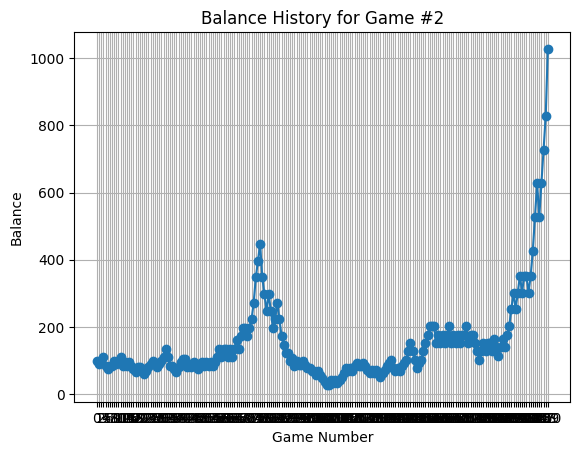

hands:  226
balance:  [100, 110.0, 135.0, 160.0, 160.0, 135.0, 135.0, 110.0, 85.0, 95.0, 85.0, 75.0, 85.0, 75.0, 75.0, 75.0, 65.0, 75.0, 90.0, 100.0, 110.0, 85.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 130.0, 155.0, 130.0, 105.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 147.5, 122.5, 147.5, 122.5, 97.5, 107.5, 132.5, 170.0, 195.0, 170.0, 170.0, 195.0, 195.0, 170.0, 145.0, 170.0, 195.0, 220.0, 170.0, 145.0, 120.0, 145.0, 170.0, 195.0, 220.0, 170.0, 170.0, 195.0, 170.0, 195.0, 170.0, 145.0, 120.0, 145.0, 170.0, 195.0, 170.0, 170.0, 145.0, 120.0, 95.0, 105.0, 130.0, 105.0, 130.0, 155.0, 155.0, 180.0, 180.0, 217.5, 267.5, 267.5, 317.5, 267.5, 317.5, 367.5, 367.5, 367.5, 317.5, 317.5, 267.5, 217.5, 267.5, 267.5, 317.5, 367.5, 417.5, 517.5, 417.5, 317.5, 367.5, 367.5, 317.5, 267.5, 217.5, 167.5, 167.5, 192.5, 167.5, 142.5, 167.5, 192.5, 167.5, 192.5, 192.5, 167.5, 192.5, 167.5, 192.5, 217.5, 267.5, 217.5, 167.5, 142.5, 180.0, 217.5, 267.5, 317.5, 267.5, 217.5, 167.5, 205.0, 255.0, 205.0, 205.0,

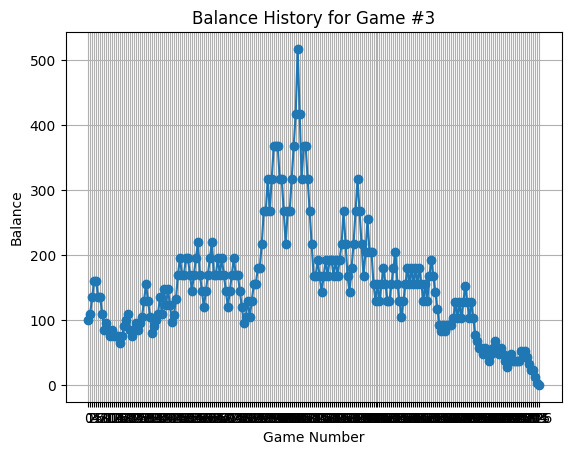

hands:  298
balance:  [100, 90.0, 80.0, 70.0, 60.0, 50.0, 60.0, 70.0, 60.0, 70.0, 80.0, 80.0, 90.0, 105.0, 130.0, 105.0, 105.0, 80.0, 95.0, 105.0, 130.0, 130.0, 155.0, 130.0, 155.0, 130.0, 105.0, 80.0, 90.0, 100.0, 90.0, 105.0, 130.0, 155.0, 130.0, 105.0, 80.0, 90.0, 80.0, 70.0, 80.0, 90.0, 100.0, 90.0, 90.0, 100.0, 100.0, 110.0, 85.0, 95.0, 85.0, 95.0, 105.0, 142.5, 117.5, 142.5, 117.5, 92.5, 102.5, 102.5, 102.5, 140.0, 115.0, 90.0, 90.0, 100.0, 100.0, 90.0, 80.0, 70.0, 80.0, 90.0, 100.0, 90.0, 105.0, 130.0, 155.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 180.0, 205.0, 205.0, 205.0, 155.0, 155.0, 180.0, 205.0, 255.0, 330.0, 280.0, 230.0, 230.0, 305.0, 355.0, 405.0, 305.0, 255.0, 255.0, 305.0, 355.0, 305.0, 355.0, 405.0, 305.0, 255.0, 305.0, 355.0, 305.0, 255.0, 305.0, 355.0, 355.0, 405.0, 405.0, 305.0, 305.0, 355.0, 405.0, 305.0, 355.0, 305.0, 255.0, 305.0, 355.0, 305.0, 355.0, 305.0, 355.0, 405.0, 555.0, 655.0, 655.0, 755.0, 655.0, 555.0, 455.0, 355.0, 430.0, 330.0, 405.0, 405.0, 50

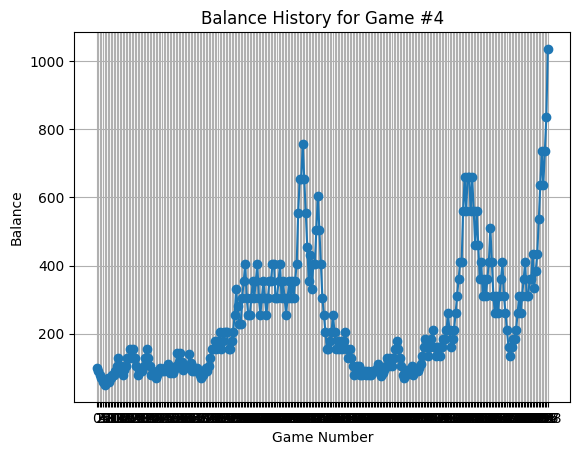

hands:  65
balance:  [100, 100.0, 110.0, 110.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 85.0, 75.0, 85.0, 95.0, 105.0, 105.0, 105.0, 130.0, 155.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 205.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 180.0, 155.0, 155.0, 130.0, 155.0, 180.0, 205.0, 255.0, 305.0, 355.0, 355.0, 405.0, 505.0, 405.0, 505.0, 405.0, 505.0, 405.0, 505.0, 605.0, 705.0, 805.0, 605.0, 505.0, 405.0, 405.0, 555.0, 655.0, 555.0, 705.0, 805.0, 1005.0]


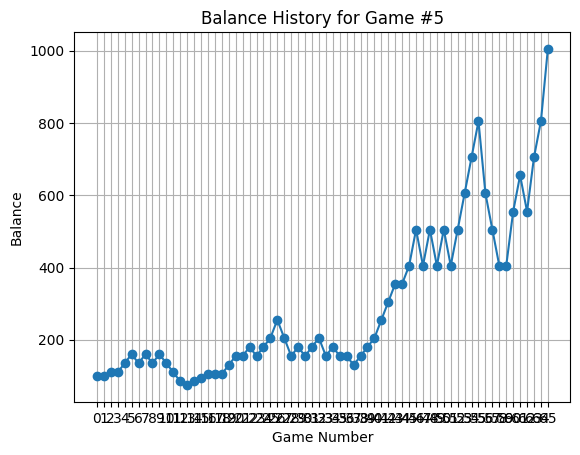

hands:  66
balance:  [100, 90.0, 80.0, 70.0, 80.0, 70.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 160.0, 185.0, 210.0, 260.0, 260.0, 210.0, 210.0, 260.0, 310.0, 360.0, 410.0, 310.0, 360.0, 410.0, 510.0, 410.0, 310.0, 360.0, 435.0, 335.0, 285.0, 335.0, 285.0, 335.0, 285.0, 235.0, 285.0, 360.0, 310.0, 385.0, 335.0, 385.0, 435.0, 535.0, 535.0, 435.0, 435.0, 535.0, 435.0, 435.0, 435.0, 535.0, 635.0, 785.0, 685.0, 685.0, 785.0, 885.0, 1085.0]


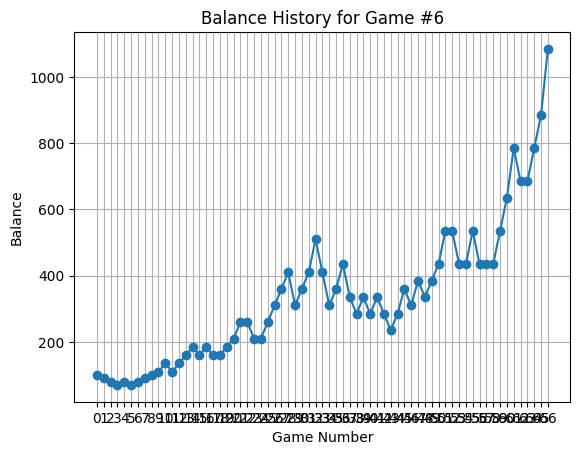

hands:  44
balance:  [100, 110.0, 135.0, 135.0, 110.0, 85.0, 75.0, 85.0, 85.0, 75.0, 90.0, 80.0, 70.0, 80.0, 90.0, 80.0, 95.0, 95.0, 85.0, 75.0, 90.0, 90.0, 90.0, 90.0, 80.0, 80.0, 90.0, 80.0, 70.0, 80.0, 90.0, 80.0, 70.0, 80.0, 70.0, 60.0, 60.0, 50.0, 40.0, 30.0, 40.0, 30.0, 20.0, 10.0, 0.0]


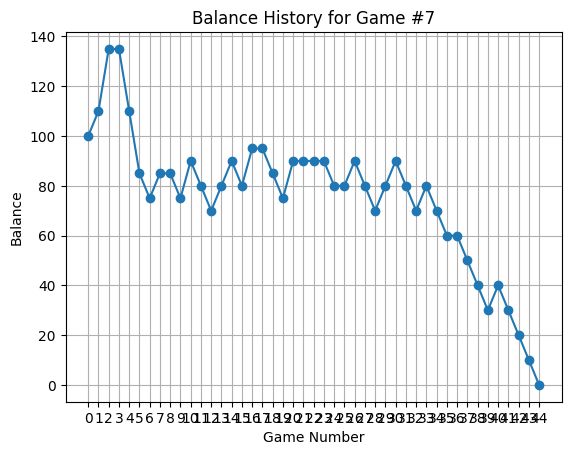

hands:  83
balance:  [100, 90.0, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 185.0, 222.5, 172.5, 172.5, 197.5, 172.5, 172.5, 147.5, 122.5, 147.5, 172.5, 210.0, 260.0, 210.0, 260.0, 210.0, 160.0, 185.0, 210.0, 160.0, 160.0, 185.0, 185.0, 185.0, 210.0, 260.0, 260.0, 310.0, 360.0, 410.0, 510.0, 410.0, 310.0, 260.0, 210.0, 160.0, 185.0, 160.0, 160.0, 185.0, 160.0, 185.0, 210.0, 210.0, 210.0, 260.0, 335.0, 285.0, 335.0, 385.0, 385.0, 435.0, 535.0, 685.0, 785.0, 935.0, 1135.0]


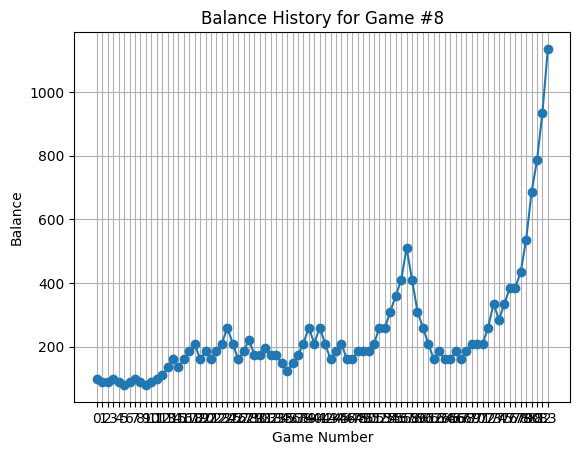

hands:  128
balance:  [100, 100.0, 90.0, 105.0, 130.0, 155.0, 130.0, 130.0, 155.0, 155.0, 130.0, 105.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 180.0, 155.0, 130.0, 167.5, 142.5, 117.5, 92.5, 102.5, 127.5, 152.5, 127.5, 102.5, 102.5, 77.5, 87.5, 97.5, 87.5, 87.5, 77.5, 67.5, 77.5, 87.5, 97.5, 107.5, 82.5, 72.5, 82.5, 72.5, 62.5, 52.5, 42.5, 32.5, 42.5, 57.5, 47.5, 57.5, 47.5, 57.5, 57.5, 47.5, 57.5, 57.5, 47.5, 37.5, 37.5, 47.5, 57.5, 67.5, 77.5, 67.5, 77.5, 77.5, 87.5, 97.5, 97.5, 107.5, 132.5, 107.5, 132.5, 157.5, 182.5, 157.5, 182.5, 207.5, 157.5, 132.5, 157.5, 132.5, 107.5, 82.5, 72.5, 82.5, 92.5, 102.5, 127.5, 152.5, 190.0, 215.0, 215.0, 215.0, 265.0, 315.0, 265.0, 215.0, 215.0, 265.0, 340.0, 390.0, 340.0, 390.0, 340.0, 390.0, 340.0, 290.0, 340.0, 415.0, 515.0, 615.0, 515.0, 615.0, 715.0, 715.0, 615.0, 515.0, 615.0, 715.0, 615.0, 715.0, 815.0, 1015.0]


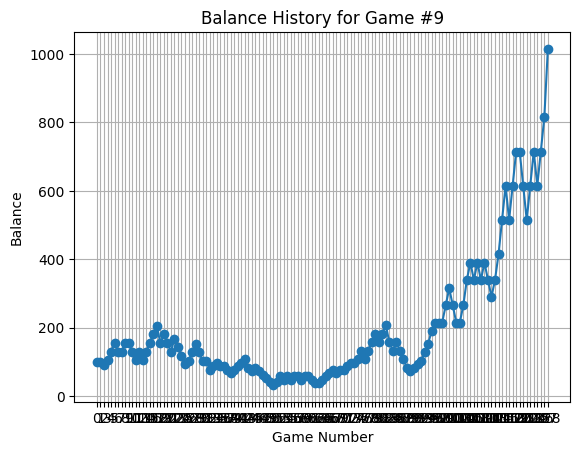

hands:  132
balance:  [100, 100.0, 110.0, 85.0, 75.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 105.0, 130.0, 105.0, 130.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 130.0, 105.0, 105.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 135.0, 110.0, 110.0, 135.0, 172.5, 172.5, 197.5, 222.5, 222.5, 272.5, 322.5, 272.5, 322.5, 372.5, 322.5, 372.5, 372.5, 372.5, 422.5, 522.5, 422.5, 522.5, 422.5, 322.5, 322.5, 272.5, 222.5, 172.5, 197.5, 222.5, 172.5, 197.5, 172.5, 197.5, 235.0, 185.0, 210.0, 285.0, 335.0, 385.0, 385.0, 435.0, 335.0, 385.0, 335.0, 285.0, 335.0, 285.0, 335.0, 285.0, 335.0, 335.0, 335.0, 335.0, 335.0, 335.0, 385.0, 435.0, 335.0, 285.0, 235.0, 285.0, 235.0, 185.0, 210.0, 260.0, 310.0, 260.0, 210.0, 260.0, 210.0, 160.0, 135.0, 135.0, 160.0, 197.5, 222.5, 172.5, 147.5, 122.5, 97.5, 107.5, 82.5, 72.5, 62.5, 52.5, 42.5, 52.5, 42.5, 52.5, 62.5, 52.5, 42.5, 32.5, 42.5, 32.5, 22.5, 12.5, 2.5, 0.0]


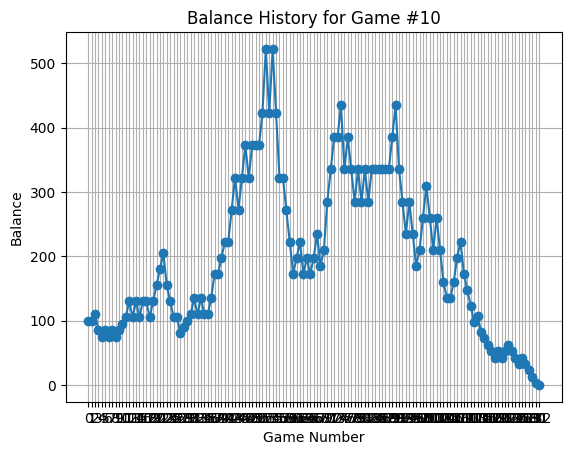

hands:  79
balance:  [100, 110.0, 85.0, 95.0, 85.0, 95.0, 110.0, 135.0, 160.0, 135.0, 135.0, 160.0, 185.0, 210.0, 210.0, 160.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 160.0, 185.0, 210.0, 210.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 197.5, 197.5, 235.0, 185.0, 222.5, 272.5, 222.5, 272.5, 322.5, 272.5, 222.5, 222.5, 272.5, 272.5, 322.5, 272.5, 322.5, 272.5, 272.5, 222.5, 272.5, 222.5, 172.5, 147.5, 172.5, 197.5, 222.5, 272.5, 347.5, 397.5, 347.5, 297.5, 347.5, 397.5, 397.5, 397.5, 472.5, 472.5, 572.5, 472.5, 572.5, 722.5, 622.5, 522.5, 622.5, 722.5, 822.5, 1022.5]


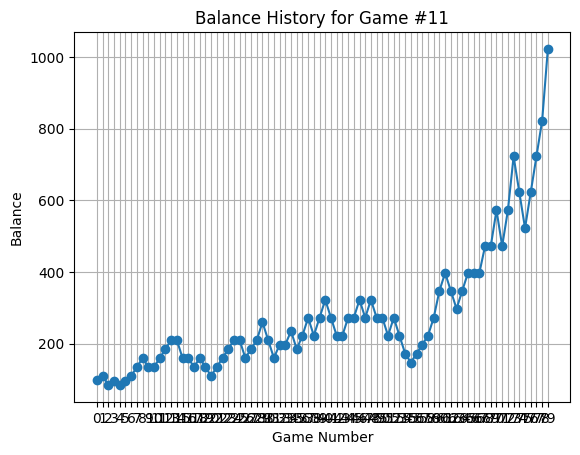

hands:  131
balance:  [100, 110.0, 85.0, 95.0, 105.0, 105.0, 130.0, 105.0, 80.0, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 185.0, 222.5, 272.5, 322.5, 372.5, 372.5, 322.5, 272.5, 222.5, 222.5, 172.5, 172.5, 210.0, 285.0, 335.0, 385.0, 435.0, 435.0, 535.0, 635.0, 535.0, 435.0, 335.0, 385.0, 335.0, 285.0, 335.0, 335.0, 285.0, 235.0, 285.0, 335.0, 285.0, 335.0, 285.0, 235.0, 185.0, 160.0, 185.0, 160.0, 135.0, 135.0, 110.0, 147.5, 147.5, 122.5, 97.5, 112.5, 112.5, 150.0, 175.0, 175.0, 150.0, 175.0, 200.0, 225.0, 275.0, 225.0, 175.0, 150.0, 187.5, 212.5, 262.5, 312.5, 312.5, 362.5, 412.5, 412.5, 512.5, 412.5, 412.5, 312.5, 362.5, 412.5, 512.5, 412.5, 312.5, 262.5, 312.5, 362.5, 312.5, 362.5, 412.5, 312.5, 262.5, 212.5, 162.5, 187.5, 212.5, 262.5, 312.5, 262.5, 212.5, 262.5, 262.5, 312.5, 387.5, 437.5, 337.5, 287.5, 237.5, 287.5, 237.5, 287.5, 337.5, 337.5, 387.5, 437.5, 537.5, 637.5, 737.5, 837.5, 1037.5]


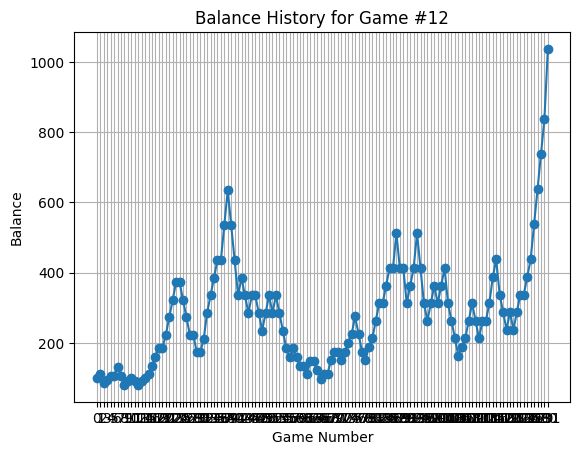

hands:  79
balance:  [100, 110.0, 85.0, 95.0, 95.0, 85.0, 75.0, 75.0, 85.0, 75.0, 85.0, 85.0, 75.0, 65.0, 65.0, 55.0, 45.0, 60.0, 60.0, 60.0, 70.0, 80.0, 70.0, 80.0, 90.0, 80.0, 90.0, 90.0, 80.0, 90.0, 105.0, 80.0, 90.0, 90.0, 80.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 85.0, 75.0, 90.0, 80.0, 90.0, 90.0, 80.0, 70.0, 80.0, 70.0, 80.0, 90.0, 105.0, 105.0, 105.0, 105.0, 105.0, 130.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 305.0, 380.0, 430.0, 530.0, 630.0, 730.0, 830.0, 630.0, 730.0, 830.0, 830.0, 830.0, 830.0, 1030.0]


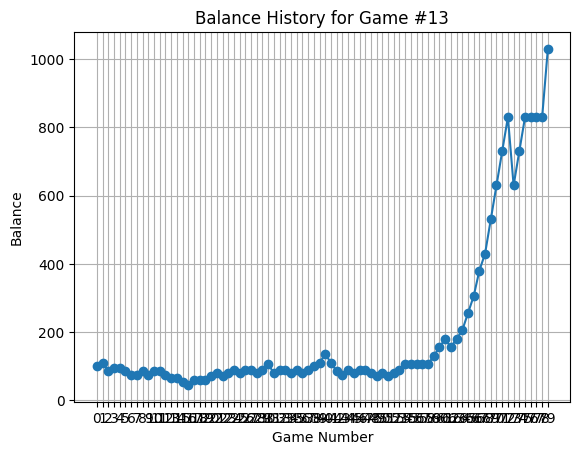

hands:  396
balance:  [100, 110.0, 85.0, 95.0, 85.0, 85.0, 95.0, 85.0, 95.0, 85.0, 75.0, 65.0, 65.0, 55.0, 65.0, 75.0, 90.0, 90.0, 80.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 210.0, 160.0, 160.0, 185.0, 160.0, 185.0, 210.0, 160.0, 185.0, 160.0, 197.5, 197.5, 222.5, 272.5, 322.5, 372.5, 322.5, 272.5, 322.5, 372.5, 322.5, 272.5, 322.5, 372.5, 422.5, 322.5, 272.5, 322.5, 322.5, 272.5, 322.5, 372.5, 422.5, 522.5, 422.5, 522.5, 422.5, 322.5, 322.5, 272.5, 322.5, 322.5, 322.5, 322.5, 372.5, 447.5, 347.5, 297.5, 247.5, 297.5, 297.5, 247.5, 297.5, 247.5, 197.5, 172.5, 147.5, 122.5, 97.5, 87.5, 97.5, 107.5, 132.5, 157.5, 182.5, 157.5, 132.5, 157.5, 182.5, 157.5, 182.5, 157.5, 157.5, 157.5, 182.5, 207.5, 257.5, 207.5, 207.5, 207.5, 157.5, 132.5, 107.5, 132.5, 107.5, 107.5, 132.5, 157.5, 182.5, 207.5, 257.5, 207.5, 257.5, 307.5, 357.5, 407.5, 307.5, 257.5, 257.5, 207.5, 157.5, 132.5, 107.5, 132.5, 132.5, 107.5, 132.5, 107.5, 107.5, 132.5, 107.5, 132.5, 107.5, 132.5, 107.5, 132.5, 1

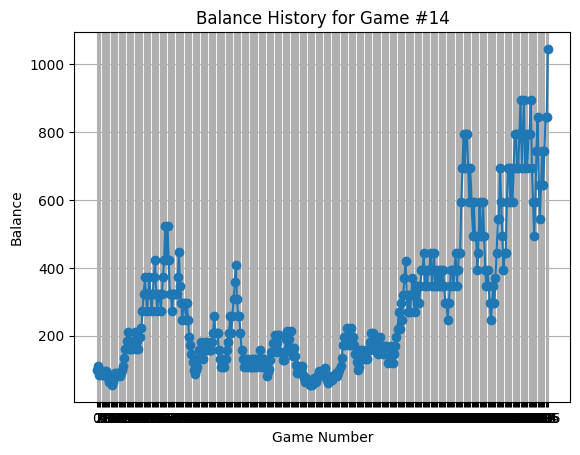

hands:  140
balance:  [100, 90.0, 100.0, 100.0, 110.0, 110.0, 85.0, 95.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 85.0, 75.0, 65.0, 55.0, 45.0, 55.0, 70.0, 70.0, 70.0, 80.0, 90.0, 80.0, 90.0, 80.0, 90.0, 100.0, 100.0, 110.0, 135.0, 110.0, 135.0, 135.0, 160.0, 185.0, 160.0, 135.0, 160.0, 185.0, 185.0, 210.0, 160.0, 160.0, 135.0, 160.0, 135.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 135.0, 110.0, 147.5, 185.0, 160.0, 135.0, 135.0, 110.0, 85.0, 75.0, 85.0, 75.0, 65.0, 75.0, 65.0, 80.0, 80.0, 90.0, 100.0, 110.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 155.0, 180.0, 205.0, 255.0, 205.0, 205.0, 255.0, 205.0, 155.0, 180.0, 205.0, 155.0, 155.0, 130.0, 105.0, 130.0, 105.0, 130.0, 105.0, 130.0, 155.0, 155.0, 180.0, 205.0, 255.0, 305.0, 355.0, 305.0, 355.0, 305.0, 355.0, 355.0, 355.0, 305.0, 355.0, 305.0, 355.0, 405.0, 505.0, 405.0, 305.0, 255.0, 255.0, 205.0, 255.0, 330.0, 405.0, 505.0, 605.0, 755.0, 655.0, 755.0, 855.0, 655.0, 755.0, 855.0, 655.0, 755.0, 855.0, 1055.0]


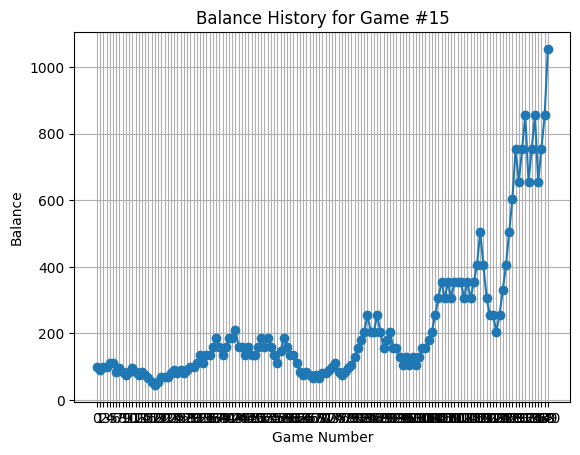

hands:  153
balance:  [100, 110.0, 135.0, 110.0, 110.0, 135.0, 110.0, 135.0, 110.0, 110.0, 85.0, 85.0, 75.0, 85.0, 95.0, 105.0, 80.0, 70.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 135.0, 110.0, 135.0, 172.5, 147.5, 122.5, 147.5, 122.5, 97.5, 87.5, 97.5, 97.5, 107.5, 132.5, 107.5, 82.5, 92.5, 107.5, 132.5, 132.5, 157.5, 132.5, 107.5, 107.5, 132.5, 157.5, 182.5, 207.5, 157.5, 157.5, 182.5, 207.5, 257.5, 332.5, 382.5, 432.5, 532.5, 432.5, 532.5, 432.5, 532.5, 632.5, 632.5, 632.5, 632.5, 632.5, 782.5, 682.5, 782.5, 782.5, 782.5, 882.5, 682.5, 782.5, 782.5, 882.5, 682.5, 682.5, 782.5, 682.5, 782.5, 882.5, 682.5, 782.5, 682.5, 582.5, 482.5, 382.5, 332.5, 282.5, 232.5, 282.5, 232.5, 282.5, 332.5, 407.5, 507.5, 407.5, 307.5, 382.5, 332.5, 282.5, 332.5, 382.5, 332.5, 382.5, 432.5, 332.5, 382.5, 432.5, 532.5, 632.5, 732.5, 732.5, 632.5, 732.5, 732.5, 832.5, 632.5, 632.5, 732.5, 632.5, 732.5, 732.5, 832.5, 632.5, 632.5, 532.5, 432.5, 532.5, 632.5, 632.5, 632.5, 732.5, 882.5, 682.5, 782.5, 682.5, 

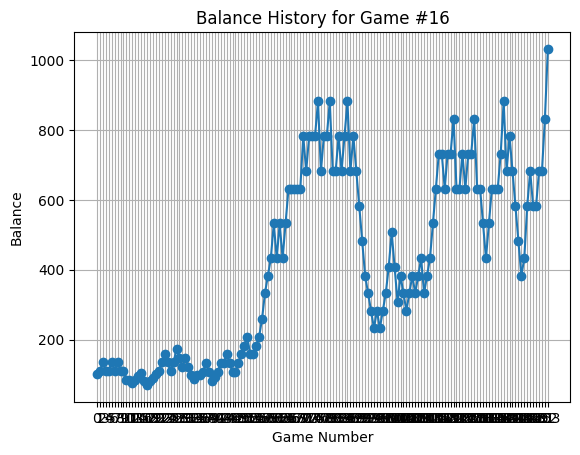

hands:  74
balance:  [100, 110.0, 110.0, 85.0, 75.0, 85.0, 95.0, 95.0, 105.0, 142.5, 117.5, 142.5, 167.5, 142.5, 167.5, 142.5, 142.5, 142.5, 117.5, 92.5, 102.5, 102.5, 127.5, 102.5, 77.5, 92.5, 102.5, 77.5, 67.5, 77.5, 67.5, 57.5, 47.5, 57.5, 47.5, 37.5, 27.5, 27.5, 42.5, 42.5, 32.5, 42.5, 52.5, 52.5, 52.5, 62.5, 77.5, 77.5, 67.5, 57.5, 57.5, 67.5, 77.5, 67.5, 57.5, 47.5, 57.5, 47.5, 37.5, 37.5, 27.5, 17.5, 27.5, 37.5, 47.5, 37.5, 27.5, 17.5, 27.5, 17.5, 17.5, 17.5, 17.5, 7.5, 0.0]


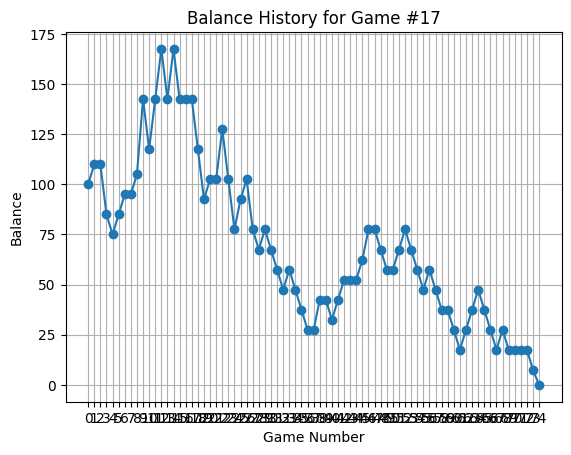

hands:  40
balance:  [100, 110.0, 110.0, 135.0, 110.0, 135.0, 160.0, 160.0, 135.0, 160.0, 135.0, 160.0, 185.0, 185.0, 160.0, 185.0, 160.0, 160.0, 160.0, 185.0, 210.0, 210.0, 285.0, 335.0, 285.0, 335.0, 385.0, 435.0, 435.0, 335.0, 335.0, 385.0, 435.0, 535.0, 435.0, 535.0, 635.0, 785.0, 885.0, 885.0, 1085.0]


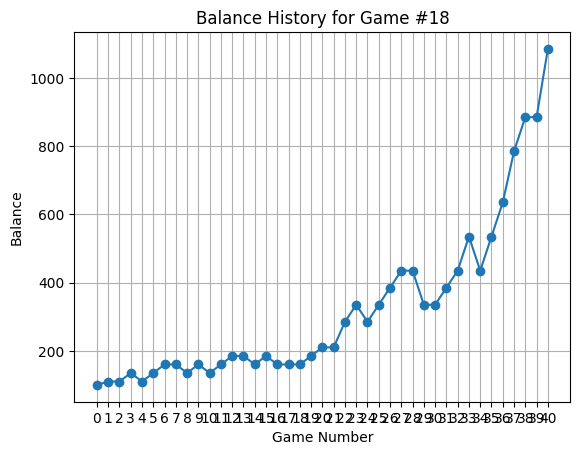

hands:  212
balance:  [100, 90.0, 100.0, 110.0, 85.0, 85.0, 75.0, 65.0, 55.0, 65.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 80.0, 90.0, 80.0, 70.0, 60.0, 50.0, 40.0, 30.0, 20.0, 30.0, 20.0, 35.0, 45.0, 35.0, 25.0, 35.0, 45.0, 55.0, 45.0, 55.0, 65.0, 55.0, 65.0, 75.0, 85.0, 100.0, 90.0, 80.0, 90.0, 80.0, 70.0, 80.0, 70.0, 80.0, 70.0, 60.0, 70.0, 60.0, 70.0, 80.0, 80.0, 90.0, 80.0, 80.0, 90.0, 90.0, 80.0, 70.0, 60.0, 50.0, 60.0, 70.0, 60.0, 75.0, 65.0, 75.0, 65.0, 75.0, 65.0, 55.0, 55.0, 65.0, 75.0, 65.0, 55.0, 55.0, 45.0, 35.0, 25.0, 35.0, 25.0, 35.0, 45.0, 35.0, 25.0, 25.0, 15.0, 15.0, 25.0, 35.0, 25.0, 35.0, 35.0, 45.0, 35.0, 45.0, 55.0, 45.0, 55.0, 45.0, 45.0, 55.0, 65.0, 75.0, 65.0, 75.0, 75.0, 65.0, 75.0, 90.0, 80.0, 90.0, 90.0, 80.0, 70.0, 60.0, 50.0, 40.0, 50.0, 60.0, 50.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 135.0, 135.0, 110.0, 147.5, 147.5, 147.5, 122.5, 160.0, 160.0, 135.0, 110.0, 135.0, 160.0, 160.0, 135.0, 160.0, 197.5, 222.5, 172.5, 197.5, 197.5, 222.5, 297.5, 3

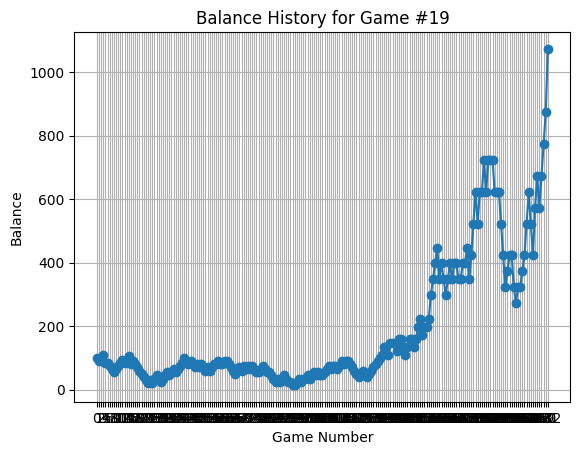

hands:  124
balance:  [100, 100.0, 100.0, 100.0, 90.0, 100.0, 90.0, 80.0, 80.0, 70.0, 80.0, 70.0, 60.0, 70.0, 80.0, 70.0, 60.0, 70.0, 70.0, 70.0, 80.0, 95.0, 85.0, 95.0, 105.0, 130.0, 105.0, 80.0, 70.0, 80.0, 90.0, 100.0, 115.0, 140.0, 140.0, 140.0, 165.0, 190.0, 165.0, 140.0, 115.0, 140.0, 115.0, 140.0, 140.0, 165.0, 140.0, 115.0, 90.0, 105.0, 80.0, 70.0, 70.0, 60.0, 50.0, 60.0, 50.0, 60.0, 70.0, 80.0, 70.0, 80.0, 70.0, 60.0, 50.0, 60.0, 75.0, 75.0, 65.0, 65.0, 75.0, 90.0, 80.0, 95.0, 110.0, 135.0, 160.0, 135.0, 135.0, 160.0, 185.0, 210.0, 260.0, 310.0, 260.0, 210.0, 260.0, 335.0, 410.0, 310.0, 260.0, 310.0, 360.0, 410.0, 410.0, 410.0, 310.0, 385.0, 435.0, 535.0, 635.0, 535.0, 435.0, 535.0, 435.0, 535.0, 635.0, 735.0, 635.0, 735.0, 635.0, 535.0, 435.0, 535.0, 635.0, 535.0, 635.0, 535.0, 635.0, 635.0, 535.0, 635.0, 735.0, 885.0, 1085.0]


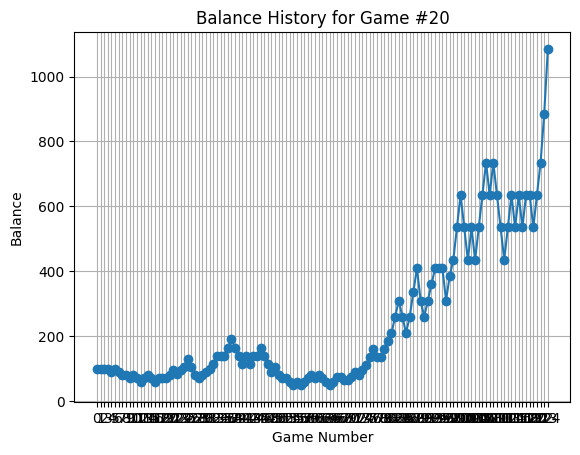

hands:  179
balance:  [100, 100.0, 100.0, 90.0, 80.0, 70.0, 85.0, 75.0, 65.0, 65.0, 75.0, 85.0, 75.0, 65.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 65.0, 75.0, 65.0, 55.0, 65.0, 55.0, 45.0, 55.0, 65.0, 55.0, 65.0, 75.0, 75.0, 85.0, 95.0, 105.0, 80.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 210.0, 210.0, 160.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 135.0, 135.0, 135.0, 110.0, 85.0, 95.0, 105.0, 105.0, 105.0, 130.0, 155.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 180.0, 205.0, 255.0, 305.0, 355.0, 405.0, 505.0, 405.0, 305.0, 305.0, 355.0, 430.0, 330.0, 380.0, 430.0, 330.0, 380.0, 430.0, 330.0, 280.0, 230.0, 230.0, 280.0, 230.0, 305.0, 355.0, 305.0, 355.0, 405.0, 305.0, 380.0, 330.0, 280.0, 330.0, 280.0, 330.0, 330.0, 380.0, 430.0, 330.0, 280.0, 230.0, 180.0, 155.0, 180.0, 155.0, 180.0, 205.0, 205.0, 155.0, 192.5, 167.5, 142.5, 167.5, 192.5, 217.5, 167.5, 192.5, 167.5, 192.5, 217.5, 167.5, 192.5, 217.5, 167.5, 192.5, 167.5, 192.5, 230.0, 280.0, 330.0, 380.0, 430.0, 53

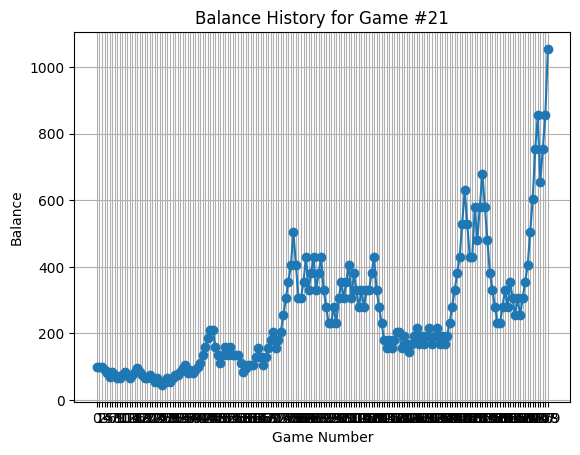

hands:  34
balance:  [100, 110.0, 110.0, 85.0, 75.0, 90.0, 105.0, 105.0, 130.0, 155.0, 180.0, 180.0, 155.0, 180.0, 217.5, 267.5, 267.5, 317.5, 367.5, 417.5, 417.5, 567.5, 567.5, 667.5, 567.5, 467.5, 567.5, 667.5, 567.5, 467.5, 567.5, 667.5, 767.5, 867.5, 1067.5]


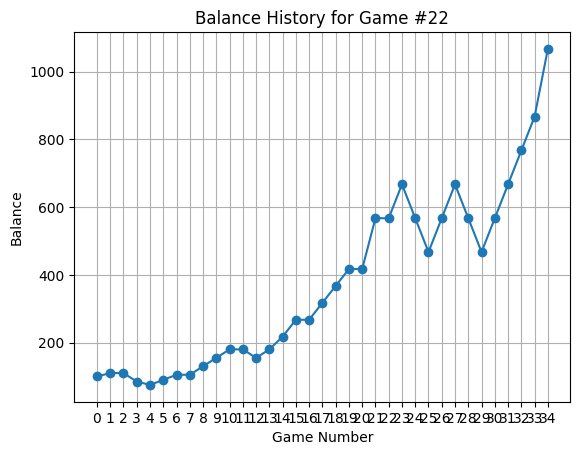

hands:  293
balance:  [100, 110.0, 85.0, 95.0, 105.0, 130.0, 105.0, 130.0, 105.0, 80.0, 70.0, 60.0, 70.0, 60.0, 50.0, 60.0, 70.0, 60.0, 70.0, 60.0, 70.0, 80.0, 90.0, 100.0, 115.0, 90.0, 100.0, 115.0, 115.0, 90.0, 105.0, 80.0, 70.0, 80.0, 70.0, 60.0, 70.0, 60.0, 70.0, 60.0, 70.0, 80.0, 70.0, 80.0, 90.0, 100.0, 100.0, 110.0, 135.0, 110.0, 135.0, 110.0, 110.0, 135.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 135.0, 160.0, 185.0, 160.0, 135.0, 135.0, 110.0, 85.0, 85.0, 75.0, 65.0, 55.0, 65.0, 55.0, 45.0, 55.0, 65.0, 75.0, 85.0, 75.0, 75.0, 65.0, 55.0, 65.0, 75.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 65.0, 55.0, 65.0, 55.0, 65.0, 80.0, 90.0, 80.0, 90.0, 100.0, 110.0, 110.0, 85.0, 75.0, 75.0, 75.0, 65.0, 55.0, 55.0, 65.0, 55.0, 70.0, 60.0, 70.0, 60.0, 50.0, 60.0, 60.0, 60.0, 50.0, 40.0, 30.0, 40.0, 30.0, 20.0, 30.0, 40.0, 50.0, 65.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 80.0, 90.0, 100.0, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 185.0, 210.0, 285.0, 235.0, 285.0, 285.0, 335.0, 2

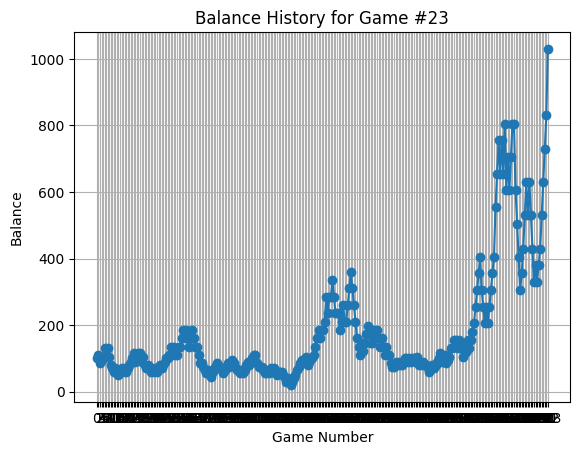

hands:  95
balance:  [100, 110.0, 85.0, 85.0, 95.0, 105.0, 130.0, 130.0, 155.0, 130.0, 155.0, 130.0, 105.0, 80.0, 70.0, 60.0, 60.0, 50.0, 60.0, 60.0, 50.0, 40.0, 50.0, 60.0, 50.0, 50.0, 40.0, 50.0, 50.0, 60.0, 70.0, 60.0, 50.0, 60.0, 50.0, 60.0, 70.0, 60.0, 75.0, 85.0, 75.0, 65.0, 80.0, 90.0, 100.0, 115.0, 140.0, 165.0, 140.0, 165.0, 165.0, 190.0, 190.0, 190.0, 190.0, 215.0, 215.0, 165.0, 190.0, 215.0, 265.0, 215.0, 290.0, 240.0, 190.0, 215.0, 165.0, 202.5, 252.5, 202.5, 252.5, 302.5, 352.5, 402.5, 302.5, 252.5, 302.5, 352.5, 302.5, 377.5, 377.5, 427.5, 527.5, 627.5, 627.5, 727.5, 627.5, 727.5, 627.5, 727.5, 627.5, 727.5, 727.5, 827.5, 827.5, 1027.5]


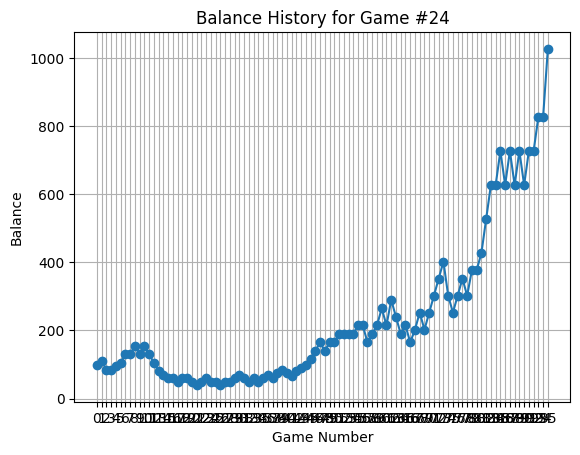

hands:  134
balance:  [100, 110.0, 85.0, 75.0, 85.0, 95.0, 105.0, 80.0, 80.0, 90.0, 100.0, 110.0, 85.0, 95.0, 105.0, 130.0, 155.0, 130.0, 105.0, 80.0, 90.0, 105.0, 80.0, 70.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 135.0, 160.0, 160.0, 185.0, 222.5, 172.5, 197.5, 222.5, 222.5, 222.5, 172.5, 197.5, 172.5, 147.5, 147.5, 122.5, 160.0, 185.0, 160.0, 185.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 110.0, 85.0, 75.0, 90.0, 80.0, 70.0, 60.0, 70.0, 70.0, 80.0, 90.0, 100.0, 90.0, 100.0, 110.0, 85.0, 95.0, 95.0, 85.0, 75.0, 75.0, 85.0, 75.0, 85.0, 95.0, 85.0, 95.0, 85.0, 75.0, 65.0, 75.0, 75.0, 90.0, 80.0, 90.0, 80.0, 70.0, 80.0, 95.0, 85.0, 75.0, 75.0, 65.0, 75.0, 65.0, 65.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 80.0, 70.0, 80.0, 80.0, 80.0, 90.0, 100.0, 110.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 260.0, 335.0, 385.0, 460.0, 610.0, 710.0, 810.0, 1010.0]


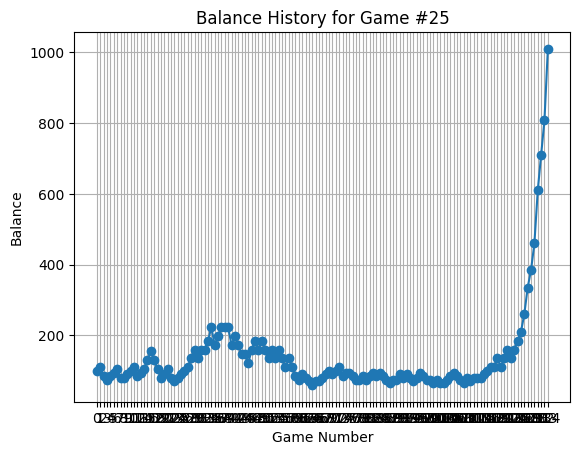

hands:  136
balance:  [100, 90.0, 100.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 197.5, 197.5, 222.5, 272.5, 222.5, 172.5, 172.5, 147.5, 172.5, 197.5, 197.5, 197.5, 222.5, 172.5, 172.5, 147.5, 172.5, 147.5, 172.5, 197.5, 222.5, 272.5, 322.5, 372.5, 422.5, 522.5, 422.5, 422.5, 522.5, 422.5, 522.5, 622.5, 522.5, 422.5, 522.5, 422.5, 572.5, 472.5, 472.5, 572.5, 472.5, 372.5, 322.5, 272.5, 222.5, 297.5, 297.5, 347.5, 297.5, 247.5, 197.5, 222.5, 272.5, 322.5, 322.5, 272.5, 222.5, 172.5, 147.5, 122.5, 147.5, 172.5, 147.5, 122.5, 122.5, 97.5, 87.5, 87.5, 97.5, 107.5, 132.5, 157.5, 132.5, 157.5, 195.0, 232.5, 232.5, 282.5, 282.5, 282.5, 232.5, 282.5, 232.5, 282.5, 332.5, 382.5, 382.5, 432.5, 332.5, 282.5, 332.5, 282.5, 332.5, 282.5, 357.5, 407.5, 407.5, 307.5, 257.5, 207.5, 257.5, 307.5, 357.5, 407.5, 507.5, 407.5, 307.5, 357.5, 407.5, 507.5, 607.5, 507.5, 407.5, 507.5, 607.5, 707.5, 607.5, 707.5, 807.5, 807.5, 607.5, 707.5, 807.5, 607.5, 707.5, 807.5, 1007.5]


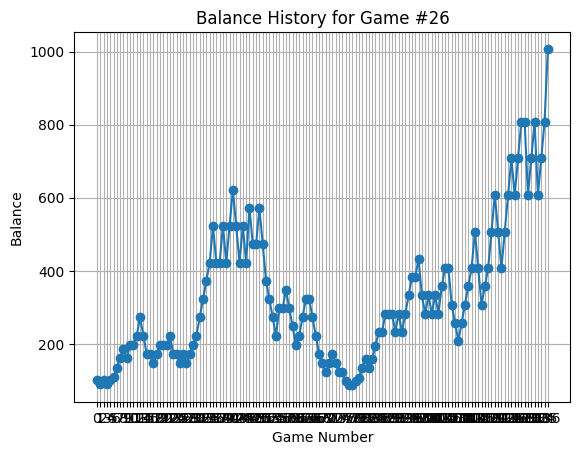

hands:  29
balance:  [100, 110.0, 135.0, 160.0, 197.5, 172.5, 197.5, 222.5, 272.5, 222.5, 222.5, 272.5, 322.5, 272.5, 322.5, 372.5, 422.5, 522.5, 522.5, 622.5, 722.5, 622.5, 622.5, 522.5, 622.5, 522.5, 672.5, 772.5, 872.5, 1072.5]


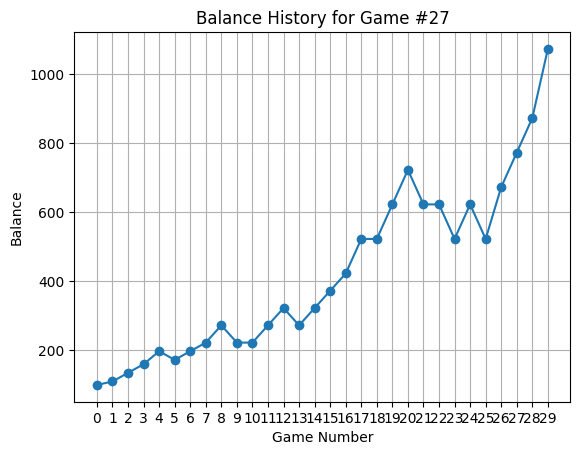

hands:  187
balance:  [100, 90.0, 100.0, 110.0, 110.0, 135.0, 160.0, 135.0, 110.0, 85.0, 75.0, 65.0, 75.0, 85.0, 95.0, 95.0, 105.0, 130.0, 167.5, 192.5, 230.0, 180.0, 205.0, 155.0, 180.0, 180.0, 155.0, 130.0, 155.0, 155.0, 155.0, 180.0, 205.0, 255.0, 305.0, 355.0, 405.0, 305.0, 355.0, 305.0, 355.0, 430.0, 330.0, 380.0, 330.0, 380.0, 330.0, 280.0, 330.0, 380.0, 330.0, 330.0, 280.0, 230.0, 180.0, 155.0, 180.0, 205.0, 155.0, 192.5, 192.5, 217.5, 167.5, 192.5, 167.5, 142.5, 167.5, 205.0, 255.0, 205.0, 155.0, 180.0, 180.0, 155.0, 180.0, 205.0, 155.0, 192.5, 217.5, 267.5, 342.5, 417.5, 517.5, 517.5, 417.5, 517.5, 417.5, 317.5, 267.5, 217.5, 217.5, 167.5, 142.5, 117.5, 92.5, 82.5, 82.5, 72.5, 87.5, 97.5, 97.5, 107.5, 82.5, 82.5, 97.5, 87.5, 87.5, 97.5, 87.5, 77.5, 67.5, 57.5, 67.5, 77.5, 77.5, 67.5, 57.5, 67.5, 77.5, 87.5, 97.5, 107.5, 132.5, 157.5, 132.5, 157.5, 182.5, 157.5, 182.5, 157.5, 132.5, 157.5, 182.5, 157.5, 132.5, 157.5, 182.5, 207.5, 257.5, 257.5, 207.5, 157.5, 132.5, 157.5, 182.5

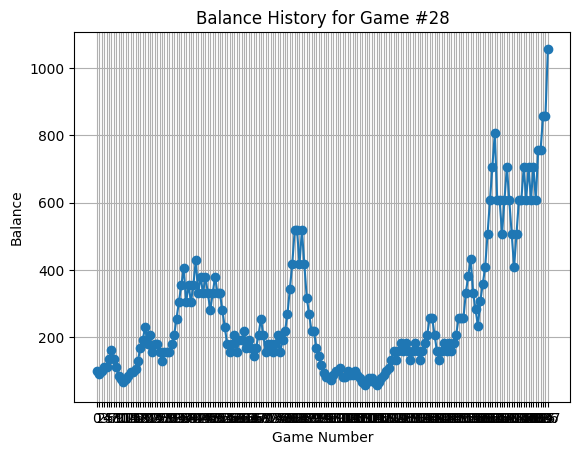

hands:  85
balance:  [100, 90.0, 100.0, 110.0, 147.5, 172.5, 147.5, 172.5, 197.5, 222.5, 272.5, 322.5, 272.5, 222.5, 272.5, 222.5, 272.5, 222.5, 272.5, 222.5, 172.5, 147.5, 172.5, 172.5, 172.5, 147.5, 172.5, 147.5, 122.5, 122.5, 147.5, 172.5, 197.5, 197.5, 222.5, 172.5, 147.5, 147.5, 172.5, 210.0, 160.0, 197.5, 172.5, 197.5, 222.5, 172.5, 197.5, 197.5, 222.5, 172.5, 197.5, 222.5, 172.5, 197.5, 197.5, 222.5, 272.5, 322.5, 372.5, 322.5, 372.5, 422.5, 522.5, 422.5, 522.5, 622.5, 522.5, 422.5, 522.5, 422.5, 322.5, 322.5, 372.5, 422.5, 322.5, 272.5, 322.5, 272.5, 322.5, 372.5, 422.5, 522.5, 622.5, 722.5, 822.5, 1022.5]


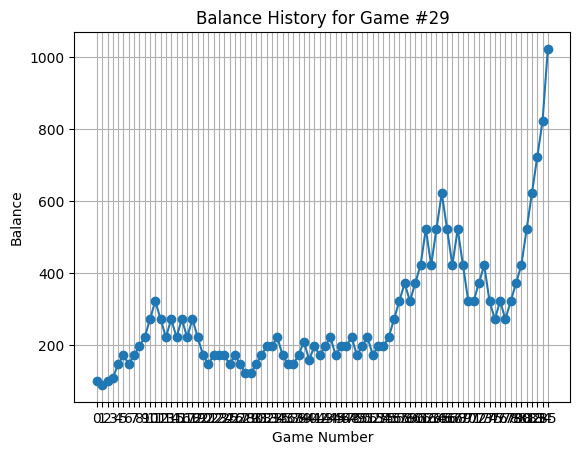

hands:  37
balance:  [100, 110.0, 135.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 310.0, 360.0, 310.0, 260.0, 335.0, 385.0, 335.0, 335.0, 410.0, 310.0, 385.0, 335.0, 385.0, 435.0, 535.0, 635.0, 735.0, 835.0, 635.0, 735.0, 735.0, 835.0, 1035.0]


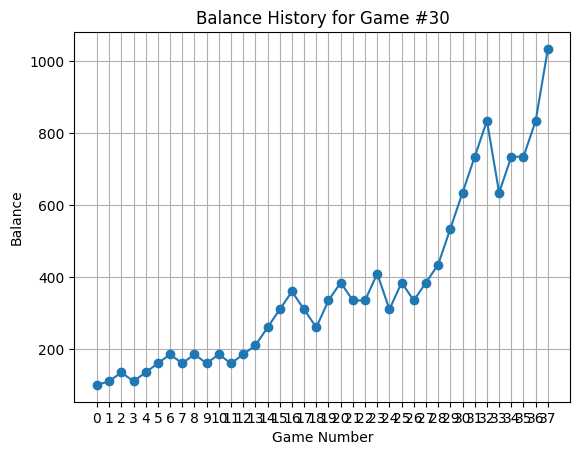

hands:  233
balance:  [100, 110.0, 135.0, 135.0, 110.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 105.0, 80.0, 70.0, 60.0, 70.0, 80.0, 90.0, 100.0, 115.0, 140.0, 177.5, 202.5, 152.5, 177.5, 152.5, 127.5, 102.5, 77.5, 87.5, 87.5, 77.5, 87.5, 77.5, 67.5, 77.5, 67.5, 82.5, 92.5, 107.5, 107.5, 82.5, 72.5, 62.5, 72.5, 62.5, 72.5, 72.5, 72.5, 82.5, 72.5, 62.5, 52.5, 42.5, 32.5, 22.5, 12.5, 12.5, 22.5, 32.5, 42.5, 52.5, 42.5, 52.5, 42.5, 52.5, 42.5, 42.5, 32.5, 47.5, 57.5, 67.5, 67.5, 77.5, 92.5, 102.5, 77.5, 87.5, 77.5, 67.5, 82.5, 97.5, 107.5, 82.5, 72.5, 72.5, 82.5, 72.5, 82.5, 72.5, 62.5, 52.5, 62.5, 72.5, 82.5, 72.5, 82.5, 72.5, 62.5, 52.5, 52.5, 52.5, 67.5, 57.5, 67.5, 57.5, 47.5, 37.5, 47.5, 57.5, 47.5, 57.5, 57.5, 47.5, 47.5, 47.5, 57.5, 47.5, 37.5, 37.5, 27.5, 27.5, 37.5, 47.5, 57.5, 47.5, 57.5, 47.5, 47.5, 57.5, 67.5, 57.5, 57.5, 57.5, 67.5, 67.5, 77.5, 67.5, 77.5, 87.5, 97.5, 87.5, 77.5, 87.5, 77.5, 87.5, 77.5, 67.5, 57.5, 67.5, 77.5, 67.5, 82.5, 72.5, 62.5, 72.5, 87.5, 77.

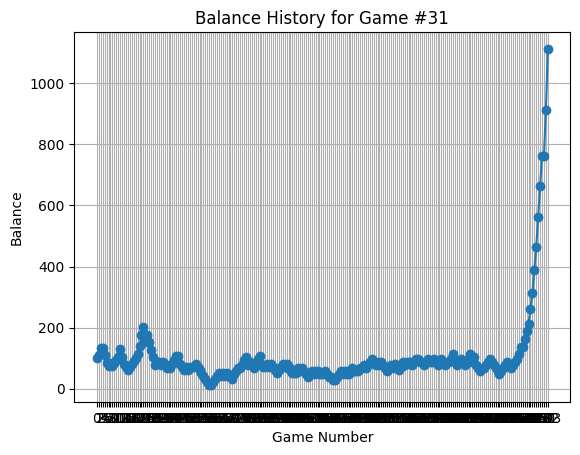

hands:  100
balance:  [100, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 147.5, 172.5, 172.5, 147.5, 172.5, 197.5, 172.5, 197.5, 172.5, 147.5, 122.5, 97.5, 107.5, 82.5, 97.5, 87.5, 97.5, 87.5, 77.5, 77.5, 67.5, 57.5, 67.5, 77.5, 67.5, 77.5, 87.5, 97.5, 107.5, 82.5, 92.5, 102.5, 127.5, 127.5, 102.5, 102.5, 127.5, 152.5, 152.5, 177.5, 202.5, 252.5, 302.5, 252.5, 302.5, 252.5, 202.5, 152.5, 177.5, 215.0, 165.0, 190.0, 215.0, 165.0, 140.0, 177.5, 202.5, 252.5, 302.5, 352.5, 402.5, 302.5, 352.5, 302.5, 252.5, 302.5, 252.5, 202.5, 252.5, 302.5, 352.5, 302.5, 252.5, 302.5, 352.5, 402.5, 302.5, 352.5, 302.5, 352.5, 402.5, 502.5, 402.5, 302.5, 352.5, 402.5, 502.5, 602.5, 702.5, 802.5, 1102.5]


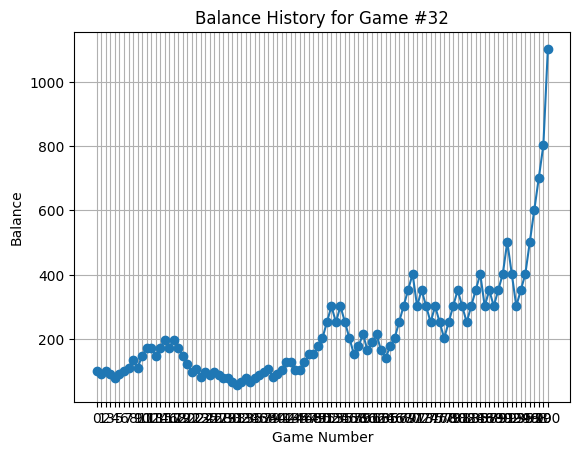

hands:  108
balance:  [100, 110.0, 110.0, 85.0, 85.0, 95.0, 110.0, 85.0, 100.0, 115.0, 115.0, 115.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 135.0, 110.0, 85.0, 75.0, 85.0, 95.0, 95.0, 105.0, 130.0, 155.0, 180.0, 155.0, 130.0, 130.0, 105.0, 80.0, 90.0, 100.0, 90.0, 90.0, 105.0, 80.0, 80.0, 70.0, 70.0, 70.0, 80.0, 90.0, 100.0, 110.0, 85.0, 95.0, 105.0, 80.0, 70.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 85.0, 85.0, 95.0, 105.0, 105.0, 80.0, 90.0, 80.0, 70.0, 85.0, 95.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 130.0, 105.0, 130.0, 105.0, 80.0, 90.0, 80.0, 70.0, 60.0, 50.0, 40.0, 40.0, 30.0, 20.0, 20.0, 30.0, 30.0, 20.0, 10.0, 10.0, 0.0]


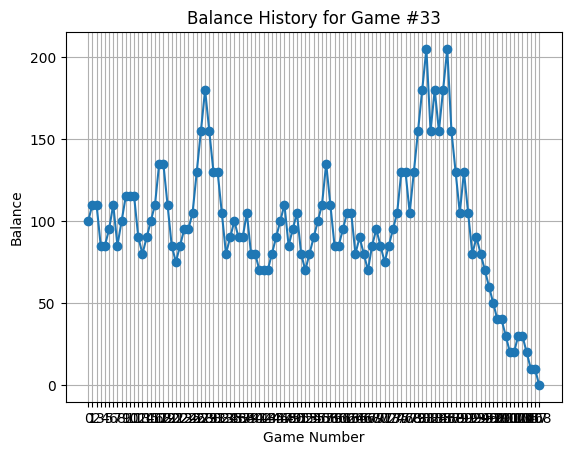

hands:  51
balance:  [100, 90.0, 105.0, 142.5, 167.5, 192.5, 167.5, 167.5, 192.5, 217.5, 167.5, 142.5, 142.5, 167.5, 192.5, 192.5, 167.5, 192.5, 167.5, 142.5, 117.5, 142.5, 142.5, 167.5, 192.5, 167.5, 192.5, 217.5, 267.5, 217.5, 167.5, 142.5, 167.5, 205.0, 155.0, 180.0, 205.0, 255.0, 255.0, 330.0, 280.0, 230.0, 280.0, 355.0, 405.0, 505.0, 605.0, 505.0, 605.0, 705.0, 855.0, 1055.0]


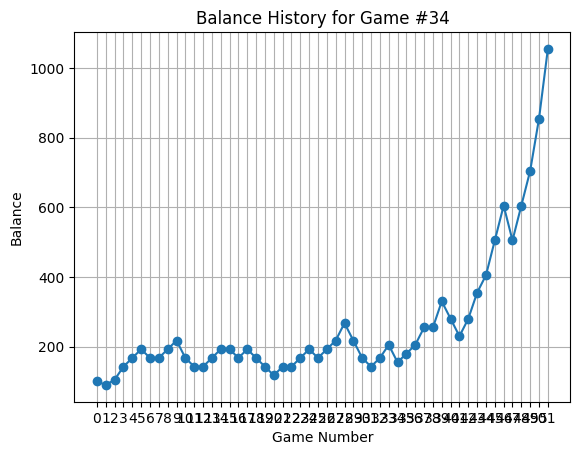

hands:  110
balance:  [100, 100.0, 90.0, 80.0, 90.0, 105.0, 130.0, 105.0, 105.0, 130.0, 105.0, 80.0, 90.0, 90.0, 100.0, 100.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 210.0, 160.0, 135.0, 110.0, 135.0, 160.0, 185.0, 185.0, 185.0, 160.0, 135.0, 172.5, 147.5, 122.5, 147.5, 172.5, 197.5, 172.5, 197.5, 222.5, 172.5, 197.5, 222.5, 172.5, 197.5, 172.5, 147.5, 122.5, 122.5, 147.5, 122.5, 147.5, 172.5, 197.5, 222.5, 272.5, 322.5, 272.5, 347.5, 297.5, 247.5, 247.5, 297.5, 347.5, 397.5, 447.5, 347.5, 397.5, 447.5, 447.5, 347.5, 297.5, 347.5, 297.5, 347.5, 297.5, 347.5, 422.5, 522.5, 422.5, 522.5, 622.5, 722.5, 622.5, 622.5, 522.5, 622.5, 522.5, 622.5, 722.5, 622.5, 522.5, 672.5, 572.5, 472.5, 372.5, 422.5, 572.5, 472.5, 372.5, 422.5, 422.5, 522.5, 622.5, 622.5, 722.5, 822.5, 822.5, 1022.5]


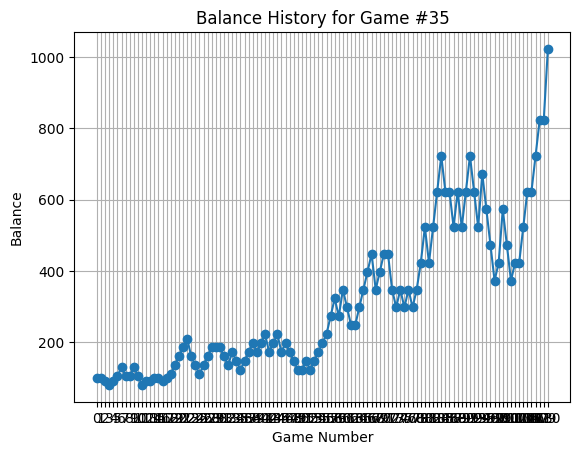

hands:  279
balance:  [100, 90.0, 90.0, 100.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 260.0, 260.0, 310.0, 360.0, 410.0, 310.0, 260.0, 335.0, 385.0, 335.0, 285.0, 235.0, 185.0, 160.0, 135.0, 160.0, 185.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 110.0, 135.0, 110.0, 147.5, 122.5, 122.5, 160.0, 185.0, 210.0, 260.0, 310.0, 260.0, 310.0, 310.0, 360.0, 410.0, 510.0, 410.0, 510.0, 510.0, 410.0, 510.0, 610.0, 510.0, 410.0, 510.0, 410.0, 310.0, 360.0, 410.0, 310.0, 360.0, 310.0, 260.0, 260.0, 210.0, 260.0, 310.0, 260.0, 210.0, 285.0, 335.0, 285.0, 235.0, 235.0, 235.0, 185.0, 210.0, 160.0, 185.0, 160.0, 135.0, 160.0, 185.0, 160.0, 160.0, 160.0, 135.0, 160.0, 135.0, 135.0, 110.0, 135.0, 160.0, 135.0, 110.0, 85.0, 95.0, 95.0, 105.0, 80.0, 90.0, 100.0, 90.0, 90.0, 100.0, 115.0, 140.0, 115.0, 140.0, 115.0, 152.5, 177.5, 202.5, 152.5, 127.5, 152.5, 152.5, 127.5, 152.5, 152.5, 177.5, 202.5, 277.5, 327.5, 402.5, 302.5, 252.5, 202.5, 252.5, 302.5, 352.5, 402.5, 302.5, 252.5, 2

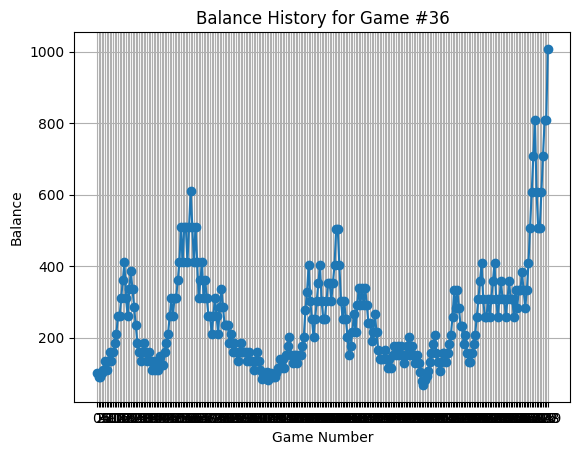

hands:  153
balance:  [100, 115.0, 90.0, 100.0, 90.0, 100.0, 90.0, 100.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 222.5, 272.5, 322.5, 272.5, 222.5, 172.5, 172.5, 197.5, 197.5, 197.5, 235.0, 185.0, 185.0, 185.0, 185.0, 185.0, 210.0, 160.0, 185.0, 210.0, 160.0, 135.0, 160.0, 135.0, 135.0, 110.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 75.0, 85.0, 95.0, 110.0, 135.0, 110.0, 135.0, 172.5, 197.5, 222.5, 172.5, 197.5, 197.5, 235.0, 285.0, 335.0, 410.0, 510.0, 510.0, 610.0, 510.0, 410.0, 410.0, 510.0, 610.0, 510.0, 610.0, 510.0, 610.0, 510.0, 410.0, 510.0, 610.0, 510.0, 410.0, 410.0, 510.0, 610.0, 510.0, 410.0, 310.0, 260.0, 310.0, 260.0, 310.0, 260.0, 335.0, 385.0, 435.0, 335.0, 285.0, 235.0, 285.0, 235.0, 285.0, 335.0, 285.0, 335.0, 285.0, 335.0, 285.0, 285.0, 235.0, 185.0, 222.5, 272.5, 272.5, 322.5, 372.5, 447.5, 447.5, 347.5, 347.5, 397.5, 347.5, 397.5, 447.5, 347.5, 397.5, 397.5, 347.5, 297.5, 347.5, 297.5, 347.5, 397.5, 447.5, 547.5, 647.5, 747.5, 647.5, 747.5, 847.5,

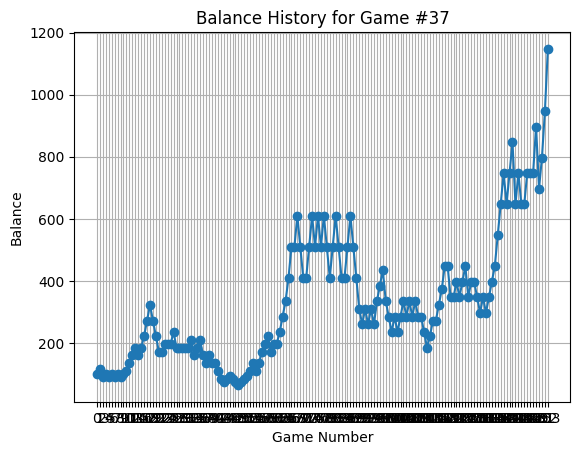

hands:  101
balance:  [100, 90.0, 80.0, 90.0, 100.0, 100.0, 90.0, 100.0, 110.0, 135.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 135.0, 172.5, 147.5, 172.5, 197.5, 222.5, 172.5, 172.5, 147.5, 122.5, 147.5, 172.5, 197.5, 172.5, 172.5, 197.5, 222.5, 222.5, 272.5, 222.5, 222.5, 272.5, 322.5, 372.5, 422.5, 522.5, 422.5, 322.5, 372.5, 322.5, 272.5, 347.5, 347.5, 347.5, 397.5, 447.5, 447.5, 447.5, 347.5, 397.5, 397.5, 397.5, 347.5, 347.5, 397.5, 447.5, 347.5, 297.5, 347.5, 297.5, 347.5, 397.5, 347.5, 297.5, 247.5, 297.5, 347.5, 297.5, 247.5, 197.5, 222.5, 272.5, 322.5, 372.5, 322.5, 272.5, 347.5, 397.5, 447.5, 347.5, 397.5, 447.5, 547.5, 647.5, 747.5, 647.5, 547.5, 647.5, 797.5, 897.5, 1097.5]


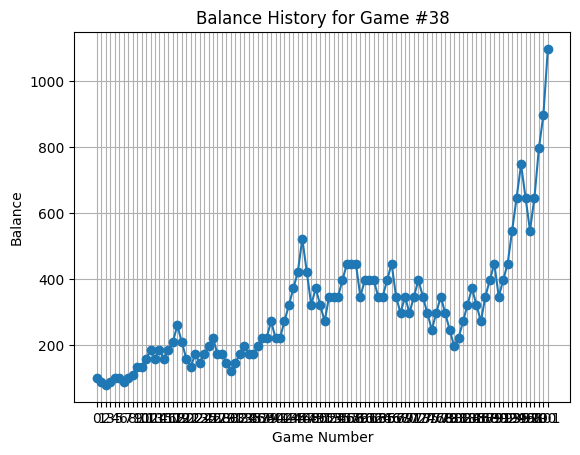

hands:  107
balance:  [100, 100.0, 100.0, 100.0, 110.0, 135.0, 110.0, 135.0, 160.0, 185.0, 210.0, 260.0, 310.0, 260.0, 210.0, 160.0, 185.0, 160.0, 135.0, 172.5, 210.0, 260.0, 210.0, 260.0, 210.0, 160.0, 160.0, 160.0, 185.0, 160.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 110.0, 135.0, 135.0, 135.0, 110.0, 135.0, 110.0, 147.5, 122.5, 97.5, 87.5, 97.5, 97.5, 107.5, 107.5, 132.5, 107.5, 107.5, 132.5, 157.5, 157.5, 132.5, 107.5, 132.5, 107.5, 145.0, 170.0, 195.0, 195.0, 220.0, 170.0, 145.0, 120.0, 95.0, 110.0, 85.0, 85.0, 75.0, 90.0, 80.0, 90.0, 105.0, 142.5, 167.5, 142.5, 167.5, 205.0, 155.0, 192.5, 192.5, 217.5, 217.5, 267.5, 317.5, 367.5, 417.5, 517.5, 617.5, 717.5, 617.5, 517.5, 617.5, 767.5, 867.5, 667.5, 767.5, 667.5, 767.5, 667.5, 767.5, 917.5, 1117.5]


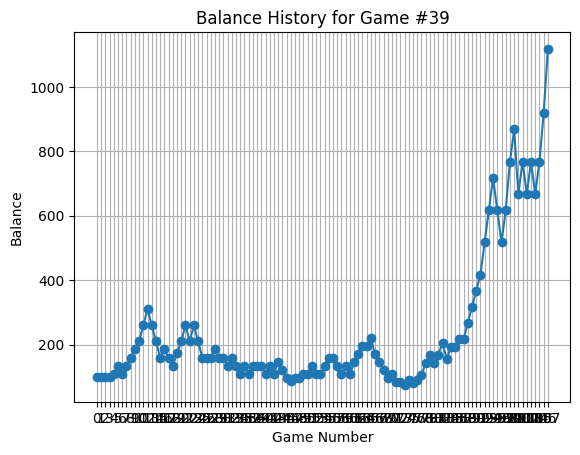

hands:  153
balance:  [100, 100.0, 110.0, 85.0, 95.0, 105.0, 142.5, 117.5, 155.0, 130.0, 130.0, 105.0, 130.0, 105.0, 80.0, 70.0, 80.0, 90.0, 100.0, 90.0, 90.0, 105.0, 130.0, 155.0, 130.0, 105.0, 130.0, 105.0, 80.0, 70.0, 80.0, 70.0, 60.0, 50.0, 60.0, 50.0, 60.0, 70.0, 60.0, 50.0, 65.0, 80.0, 70.0, 80.0, 90.0, 80.0, 70.0, 80.0, 90.0, 90.0, 100.0, 110.0, 135.0, 172.5, 147.5, 172.5, 147.5, 147.5, 122.5, 97.5, 107.5, 132.5, 170.0, 195.0, 170.0, 145.0, 170.0, 170.0, 145.0, 120.0, 145.0, 170.0, 207.5, 157.5, 132.5, 170.0, 195.0, 170.0, 145.0, 170.0, 195.0, 220.0, 270.0, 270.0, 270.0, 320.0, 370.0, 420.0, 320.0, 370.0, 370.0, 320.0, 370.0, 420.0, 320.0, 370.0, 320.0, 270.0, 345.0, 295.0, 245.0, 195.0, 170.0, 145.0, 120.0, 95.0, 85.0, 95.0, 105.0, 105.0, 105.0, 105.0, 130.0, 167.5, 142.5, 167.5, 142.5, 142.5, 117.5, 92.5, 92.5, 92.5, 82.5, 82.5, 72.5, 87.5, 97.5, 112.5, 137.5, 162.5, 162.5, 187.5, 212.5, 262.5, 262.5, 212.5, 262.5, 312.5, 312.5, 362.5, 362.5, 312.5, 362.5, 362.5, 437.5, 587.5,

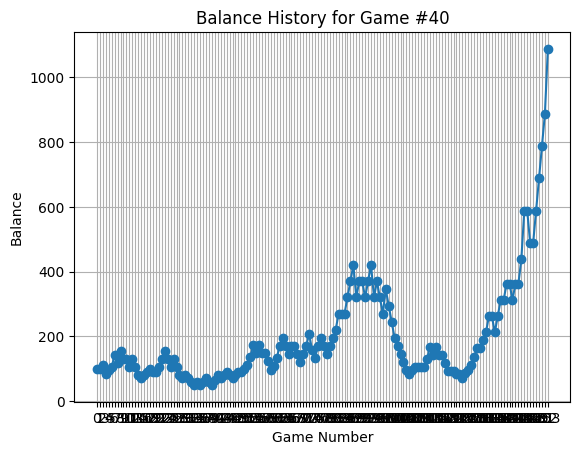

hands:  70
balance:  [100, 110.0, 147.5, 147.5, 122.5, 97.5, 107.5, 82.5, 72.5, 62.5, 77.5, 87.5, 97.5, 107.5, 132.5, 107.5, 82.5, 92.5, 92.5, 82.5, 92.5, 92.5, 102.5, 127.5, 102.5, 127.5, 102.5, 102.5, 77.5, 67.5, 77.5, 87.5, 97.5, 87.5, 97.5, 107.5, 132.5, 107.5, 132.5, 157.5, 182.5, 157.5, 182.5, 220.0, 270.0, 220.0, 295.0, 245.0, 195.0, 220.0, 270.0, 320.0, 370.0, 420.0, 520.0, 420.0, 520.0, 620.0, 720.0, 720.0, 870.0, 670.0, 770.0, 870.0, 670.0, 570.0, 670.0, 770.0, 770.0, 870.0, 1070.0]


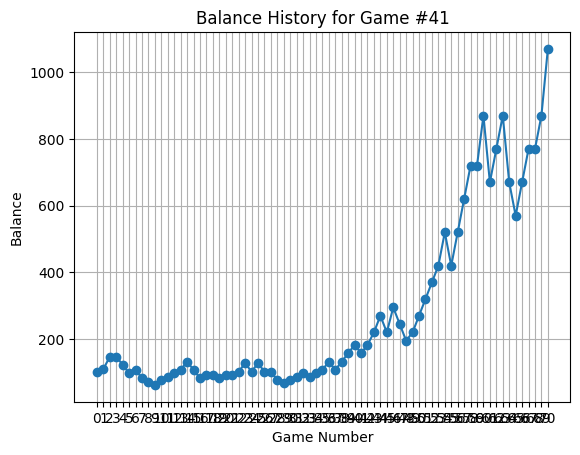

hands:  62
balance:  [100, 110.0, 110.0, 147.5, 122.5, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 160.0, 185.0, 222.5, 297.5, 247.5, 197.5, 222.5, 272.5, 272.5, 222.5, 172.5, 172.5, 172.5, 197.5, 235.0, 185.0, 210.0, 285.0, 335.0, 385.0, 435.0, 435.0, 435.0, 535.0, 635.0, 635.0, 535.0, 635.0, 535.0, 435.0, 335.0, 385.0, 385.0, 335.0, 385.0, 335.0, 385.0, 460.0, 460.0, 560.0, 560.0, 660.0, 660.0, 560.0, 660.0, 760.0, 860.0, 660.0, 760.0, 660.0, 810.0, 1010.0]


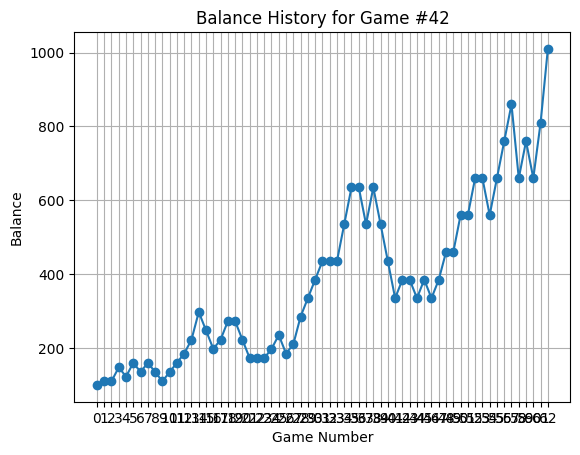

hands:  146
balance:  [100, 110.0, 147.5, 172.5, 147.5, 172.5, 197.5, 222.5, 172.5, 197.5, 172.5, 147.5, 122.5, 147.5, 172.5, 197.5, 172.5, 197.5, 172.5, 197.5, 222.5, 172.5, 197.5, 222.5, 172.5, 197.5, 222.5, 272.5, 322.5, 372.5, 322.5, 372.5, 422.5, 422.5, 522.5, 422.5, 522.5, 422.5, 322.5, 372.5, 322.5, 272.5, 272.5, 322.5, 397.5, 447.5, 347.5, 397.5, 347.5, 422.5, 572.5, 472.5, 572.5, 472.5, 572.5, 572.5, 472.5, 572.5, 572.5, 672.5, 572.5, 472.5, 372.5, 422.5, 522.5, 522.5, 422.5, 522.5, 422.5, 322.5, 272.5, 222.5, 172.5, 147.5, 122.5, 147.5, 122.5, 97.5, 107.5, 132.5, 107.5, 132.5, 157.5, 182.5, 207.5, 157.5, 182.5, 207.5, 257.5, 307.5, 357.5, 407.5, 407.5, 407.5, 407.5, 307.5, 357.5, 307.5, 357.5, 357.5, 307.5, 357.5, 357.5, 307.5, 307.5, 357.5, 307.5, 257.5, 257.5, 307.5, 257.5, 207.5, 257.5, 307.5, 257.5, 207.5, 257.5, 307.5, 382.5, 382.5, 332.5, 407.5, 307.5, 257.5, 332.5, 382.5, 432.5, 532.5, 632.5, 532.5, 632.5, 632.5, 532.5, 532.5, 682.5, 682.5, 682.5, 782.5, 682.5, 582.5, 

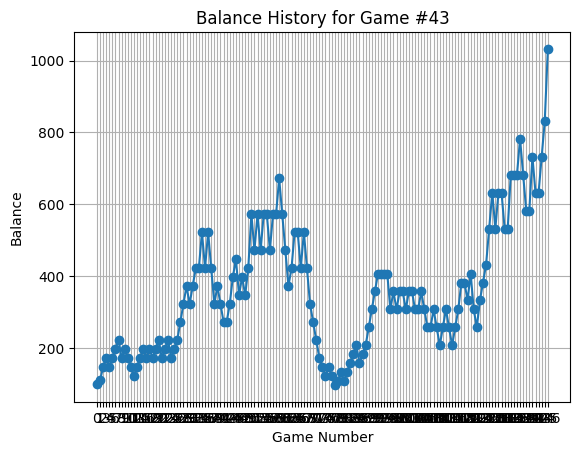

hands:  107
balance:  [100, 110.0, 110.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 75.0, 85.0, 85.0, 75.0, 85.0, 75.0, 65.0, 75.0, 85.0, 95.0, 85.0, 95.0, 85.0, 75.0, 65.0, 55.0, 65.0, 75.0, 85.0, 75.0, 85.0, 95.0, 95.0, 110.0, 135.0, 110.0, 85.0, 75.0, 85.0, 100.0, 110.0, 135.0, 135.0, 110.0, 135.0, 160.0, 185.0, 185.0, 210.0, 160.0, 185.0, 160.0, 135.0, 160.0, 185.0, 210.0, 210.0, 160.0, 185.0, 210.0, 260.0, 210.0, 260.0, 310.0, 260.0, 335.0, 385.0, 435.0, 335.0, 385.0, 435.0, 435.0, 435.0, 335.0, 385.0, 435.0, 335.0, 385.0, 335.0, 385.0, 435.0, 335.0, 410.0, 560.0, 660.0, 810.0, 610.0, 710.0, 860.0, 660.0, 560.0, 460.0, 560.0, 460.0, 360.0, 410.0, 510.0, 610.0, 510.0, 510.0, 610.0, 760.0, 660.0, 560.0, 460.0, 560.0, 660.0, 810.0, 1010.0]


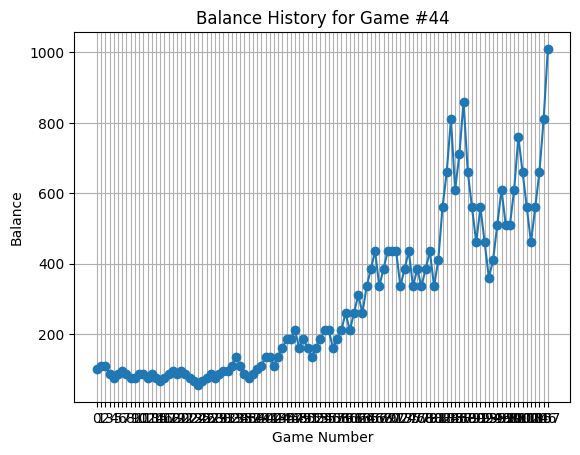

hands:  198
balance:  [100, 90.0, 80.0, 90.0, 80.0, 70.0, 80.0, 95.0, 85.0, 95.0, 105.0, 130.0, 105.0, 80.0, 90.0, 100.0, 100.0, 110.0, 85.0, 95.0, 105.0, 80.0, 70.0, 80.0, 90.0, 100.0, 100.0, 110.0, 135.0, 110.0, 85.0, 85.0, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 222.5, 172.5, 197.5, 172.5, 147.5, 172.5, 147.5, 147.5, 172.5, 197.5, 222.5, 222.5, 172.5, 210.0, 210.0, 260.0, 210.0, 160.0, 185.0, 210.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 172.5, 147.5, 185.0, 210.0, 160.0, 135.0, 172.5, 147.5, 172.5, 197.5, 197.5, 197.5, 197.5, 172.5, 197.5, 235.0, 185.0, 185.0, 160.0, 185.0, 160.0, 185.0, 222.5, 222.5, 172.5, 197.5, 172.5, 172.5, 147.5, 122.5, 97.5, 97.5, 107.5, 132.5, 107.5, 132.5, 107.5, 107.5, 132.5, 157.5, 182.5, 157.5, 182.5, 207.5, 257.5, 307.5, 357.5, 407.5, 507.5, 407.5, 307.5, 257.5, 207.5, 257.5, 207.5, 257.5, 307.5, 257.5, 307.5, 257.5, 207.5, 157.5, 132.5, 132.5, 107.5, 82.5, 92.5, 92.5, 102.5, 77.5, 87.5, 97.5, 107.5, 132.5, 107.5, 82.5, 92.5, 82.5, 82.5, 92

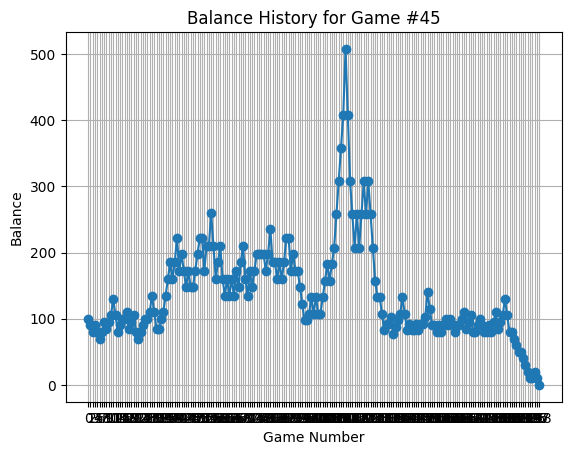

hands:  285
balance:  [100, 90.0, 80.0, 90.0, 80.0, 90.0, 80.0, 80.0, 70.0, 80.0, 95.0, 105.0, 130.0, 155.0, 155.0, 180.0, 205.0, 255.0, 305.0, 255.0, 205.0, 255.0, 305.0, 255.0, 330.0, 380.0, 330.0, 280.0, 280.0, 230.0, 180.0, 205.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 130.0, 155.0, 130.0, 167.5, 192.5, 167.5, 192.5, 217.5, 267.5, 217.5, 267.5, 267.5, 317.5, 317.5, 267.5, 217.5, 167.5, 142.5, 117.5, 92.5, 92.5, 82.5, 72.5, 82.5, 82.5, 82.5, 92.5, 82.5, 92.5, 102.5, 77.5, 87.5, 97.5, 87.5, 77.5, 67.5, 77.5, 67.5, 77.5, 87.5, 77.5, 77.5, 87.5, 77.5, 67.5, 77.5, 87.5, 97.5, 97.5, 87.5, 77.5, 87.5, 77.5, 67.5, 77.5, 77.5, 87.5, 77.5, 77.5, 67.5, 57.5, 67.5, 57.5, 57.5, 67.5, 77.5, 67.5, 57.5, 47.5, 37.5, 27.5, 42.5, 52.5, 62.5, 72.5, 62.5, 72.5, 62.5, 52.5, 52.5, 62.5, 77.5, 87.5, 97.5, 97.5, 87.5, 97.5, 107.5, 107.5, 82.5, 92.5, 102.5, 102.5, 127.5, 102.5, 127.5, 152.5, 127.5, 102.5, 127.5, 152.5, 127.5, 102.5, 77.5, 87.5, 77.5, 87.5, 77.5, 87.5, 97.5, 87.5, 97.5, 107.5, 132.5, 157

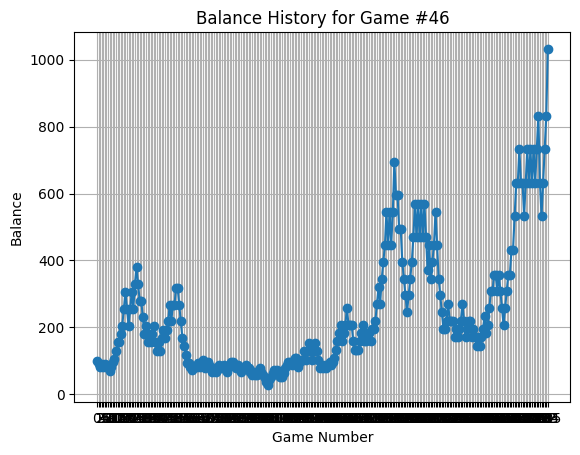

hands:  52
balance:  [100, 90.0, 80.0, 90.0, 80.0, 70.0, 70.0, 80.0, 95.0, 95.0, 105.0, 80.0, 90.0, 80.0, 90.0, 80.0, 90.0, 90.0, 100.0, 110.0, 85.0, 85.0, 75.0, 65.0, 55.0, 65.0, 55.0, 65.0, 55.0, 45.0, 55.0, 65.0, 55.0, 45.0, 55.0, 65.0, 55.0, 45.0, 60.0, 50.0, 60.0, 50.0, 40.0, 30.0, 20.0, 10.0, 20.0, 30.0, 20.0, 10.0, 20.0, 10.0, 0.0]


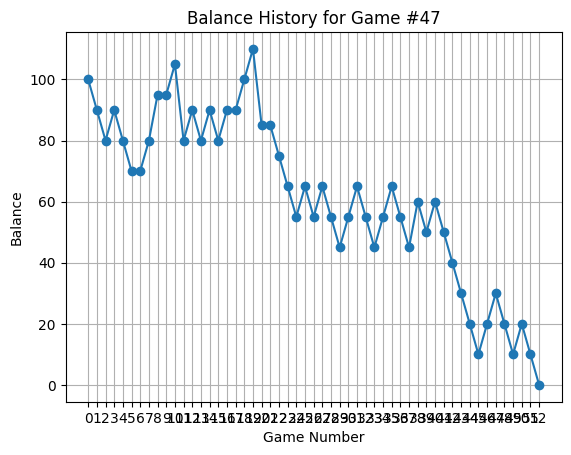

hands:  74
balance:  [100, 100.0, 90.0, 100.0, 110.0, 135.0, 110.0, 85.0, 75.0, 65.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 105.0, 105.0, 130.0, 155.0, 130.0, 130.0, 155.0, 180.0, 180.0, 205.0, 255.0, 305.0, 355.0, 355.0, 305.0, 255.0, 330.0, 280.0, 330.0, 330.0, 330.0, 330.0, 280.0, 330.0, 380.0, 430.0, 530.0, 430.0, 330.0, 380.0, 455.0, 555.0, 655.0, 755.0, 655.0, 755.0, 855.0, 655.0, 755.0, 655.0, 755.0, 855.0, 655.0, 655.0, 555.0, 655.0, 555.0, 655.0, 755.0, 655.0, 755.0, 755.0, 655.0, 755.0, 655.0, 755.0, 855.0, 855.0, 1055.0]


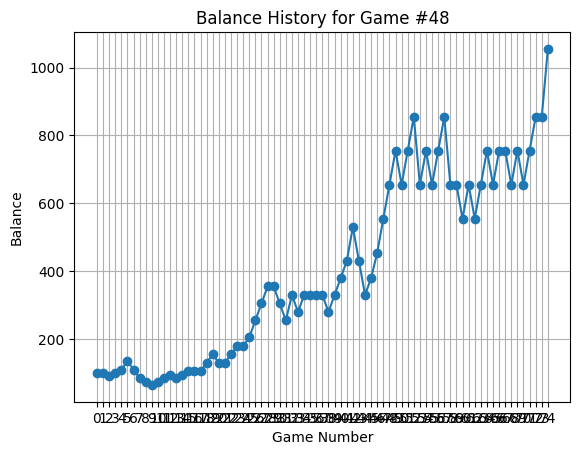

hands:  46
balance:  [100, 110.0, 135.0, 160.0, 185.0, 185.0, 222.5, 297.5, 247.5, 247.5, 247.5, 197.5, 172.5, 172.5, 147.5, 122.5, 147.5, 122.5, 97.5, 107.5, 82.5, 72.5, 72.5, 62.5, 72.5, 62.5, 72.5, 62.5, 72.5, 82.5, 72.5, 72.5, 62.5, 52.5, 62.5, 52.5, 42.5, 32.5, 22.5, 12.5, 2.5, 2.5, 2.5, 5.0, 5.0, 10.0, 0.0]


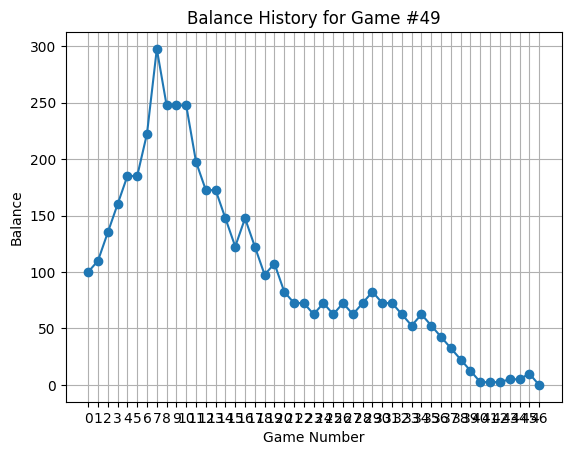

hands:  96
balance:  [100, 90.0, 100.0, 110.0, 147.5, 122.5, 122.5, 122.5, 147.5, 122.5, 122.5, 97.5, 87.5, 77.5, 87.5, 77.5, 77.5, 67.5, 57.5, 67.5, 77.5, 77.5, 87.5, 77.5, 87.5, 97.5, 107.5, 82.5, 72.5, 72.5, 62.5, 52.5, 62.5, 52.5, 42.5, 32.5, 42.5, 52.5, 67.5, 67.5, 67.5, 77.5, 67.5, 67.5, 77.5, 67.5, 57.5, 67.5, 57.5, 57.5, 67.5, 67.5, 77.5, 67.5, 57.5, 47.5, 57.5, 67.5, 77.5, 92.5, 92.5, 102.5, 127.5, 165.0, 140.0, 165.0, 190.0, 165.0, 190.0, 215.0, 165.0, 190.0, 190.0, 165.0, 202.5, 252.5, 202.5, 277.5, 227.5, 227.5, 277.5, 327.5, 377.5, 327.5, 377.5, 327.5, 377.5, 427.5, 527.5, 527.5, 627.5, 627.5, 627.5, 777.5, 777.5, 877.5, 1077.5]


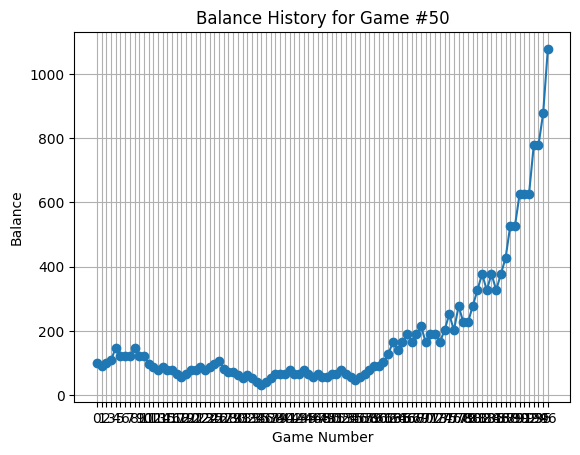

hands:  213
balance:  [100, 110.0, 85.0, 95.0, 105.0, 80.0, 70.0, 70.0, 60.0, 70.0, 80.0, 70.0, 80.0, 70.0, 80.0, 70.0, 80.0, 70.0, 60.0, 70.0, 60.0, 50.0, 40.0, 30.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 60.0, 70.0, 70.0, 60.0, 50.0, 50.0, 65.0, 65.0, 55.0, 65.0, 65.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 80.0, 70.0, 60.0, 50.0, 65.0, 75.0, 85.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 75.0, 85.0, 85.0, 95.0, 85.0, 75.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 85.0, 95.0, 85.0, 95.0, 105.0, 80.0, 90.0, 105.0, 130.0, 105.0, 80.0, 90.0, 80.0, 90.0, 100.0, 90.0, 80.0, 70.0, 60.0, 70.0, 70.0, 60.0, 70.0, 60.0, 70.0, 80.0, 95.0, 110.0, 147.5, 185.0, 210.0, 210.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 135.0, 110.0, 85.0, 95.0, 105.0, 130.0, 130.0, 155.0, 155.0, 130.0, 155.0, 130.0, 155.0, 155.0, 180.0, 155.0, 130.0, 155.0, 180.0, 205.0, 255.0, 330.0, 380.0, 430.0, 330.0, 330.0, 380.0, 330.0, 380.0, 330.0, 380.0, 455.0, 355.0, 405.0, 305.0, 255.0, 305.0, 255.0, 205.0, 

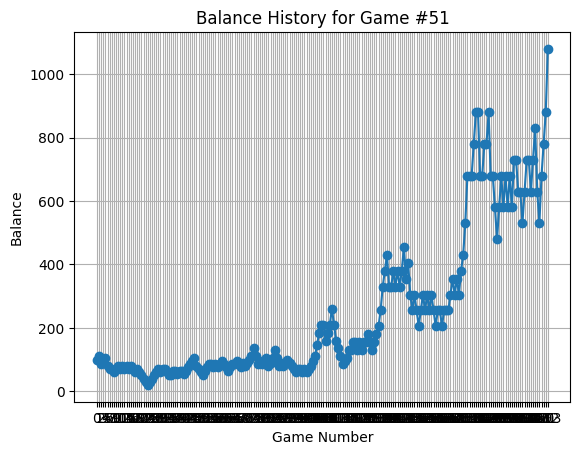

hands:  82
balance:  [100, 90.0, 100.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 160.0, 135.0, 110.0, 85.0, 85.0, 85.0, 75.0, 85.0, 75.0, 85.0, 75.0, 85.0, 85.0, 95.0, 85.0, 95.0, 105.0, 80.0, 70.0, 80.0, 95.0, 105.0, 105.0, 130.0, 105.0, 130.0, 155.0, 130.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 255.0, 330.0, 280.0, 230.0, 180.0, 155.0, 155.0, 180.0, 205.0, 255.0, 305.0, 255.0, 305.0, 355.0, 405.0, 505.0, 405.0, 505.0, 405.0, 305.0, 355.0, 430.0, 530.0, 430.0, 580.0, 480.0, 380.0, 430.0, 530.0, 630.0, 530.0, 630.0, 730.0, 830.0, 630.0, 530.0, 630.0, 730.0, 830.0, 1030.0]


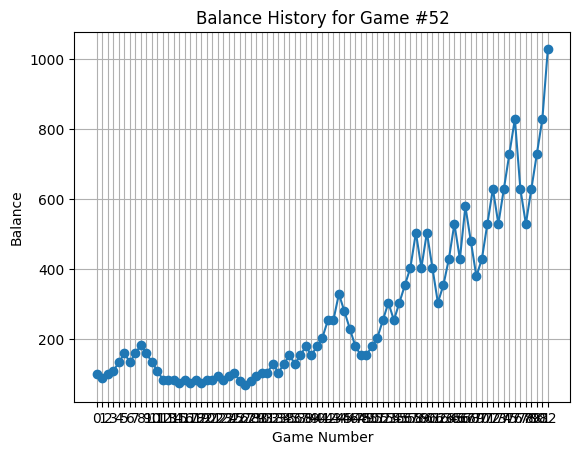

hands:  151
balance:  [100, 100.0, 100.0, 90.0, 80.0, 70.0, 80.0, 70.0, 85.0, 75.0, 65.0, 75.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 105.0, 105.0, 142.5, 117.5, 142.5, 142.5, 167.5, 192.5, 217.5, 267.5, 217.5, 167.5, 167.5, 167.5, 142.5, 167.5, 142.5, 167.5, 167.5, 192.5, 217.5, 167.5, 142.5, 117.5, 92.5, 82.5, 97.5, 107.5, 82.5, 97.5, 87.5, 102.5, 127.5, 102.5, 77.5, 67.5, 77.5, 67.5, 77.5, 87.5, 97.5, 112.5, 137.5, 162.5, 162.5, 137.5, 162.5, 187.5, 212.5, 262.5, 312.5, 362.5, 412.5, 512.5, 612.5, 512.5, 512.5, 412.5, 312.5, 362.5, 412.5, 512.5, 512.5, 412.5, 312.5, 362.5, 312.5, 362.5, 362.5, 437.5, 337.5, 387.5, 337.5, 337.5, 387.5, 337.5, 387.5, 437.5, 337.5, 387.5, 437.5, 537.5, 437.5, 337.5, 387.5, 337.5, 287.5, 237.5, 287.5, 287.5, 287.5, 362.5, 362.5, 312.5, 312.5, 262.5, 262.5, 212.5, 162.5, 187.5, 162.5, 187.5, 187.5, 212.5, 262.5, 212.5, 162.5, 137.5, 112.5, 112.5, 137.5, 162.5, 187.5, 212.5, 262.5, 212.5, 212.5, 162.5, 187.5, 187.5, 212.5, 262.5, 212.5, 262.5, 312.5, 387.5,

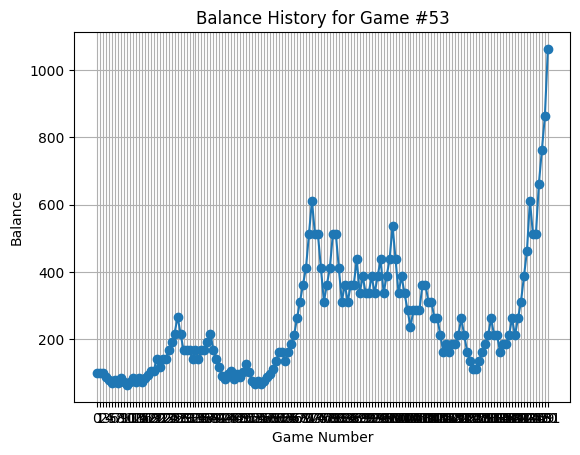

hands:  133
balance:  [100, 90.0, 80.0, 70.0, 80.0, 80.0, 90.0, 80.0, 90.0, 80.0, 90.0, 80.0, 90.0, 100.0, 90.0, 100.0, 110.0, 135.0, 110.0, 135.0, 110.0, 135.0, 172.5, 147.5, 172.5, 197.5, 172.5, 197.5, 222.5, 172.5, 197.5, 222.5, 272.5, 322.5, 272.5, 347.5, 297.5, 347.5, 347.5, 297.5, 297.5, 247.5, 197.5, 222.5, 172.5, 147.5, 122.5, 147.5, 172.5, 197.5, 197.5, 222.5, 272.5, 322.5, 372.5, 422.5, 422.5, 522.5, 522.5, 422.5, 422.5, 322.5, 397.5, 397.5, 347.5, 297.5, 297.5, 347.5, 297.5, 347.5, 297.5, 372.5, 322.5, 272.5, 322.5, 372.5, 422.5, 322.5, 272.5, 322.5, 272.5, 222.5, 172.5, 147.5, 122.5, 147.5, 172.5, 147.5, 147.5, 122.5, 147.5, 122.5, 147.5, 172.5, 147.5, 122.5, 147.5, 172.5, 197.5, 172.5, 147.5, 172.5, 210.0, 210.0, 260.0, 210.0, 160.0, 185.0, 160.0, 135.0, 135.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 210.0, 260.0, 210.0, 210.0, 260.0, 310.0, 360.0, 310.0, 360.0, 410.0, 510.0, 410.0, 510.0, 610.0, 710.0, 810.0, 1010.0]


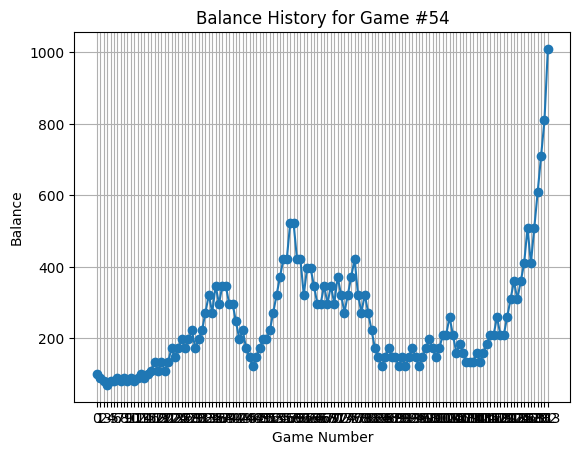

hands:  19
balance:  [100, 100.0, 110.0, 135.0, 160.0, 185.0, 210.0, 260.0, 335.0, 385.0, 435.0, 585.0, 685.0, 835.0, 635.0, 535.0, 635.0, 735.0, 835.0, 1035.0]


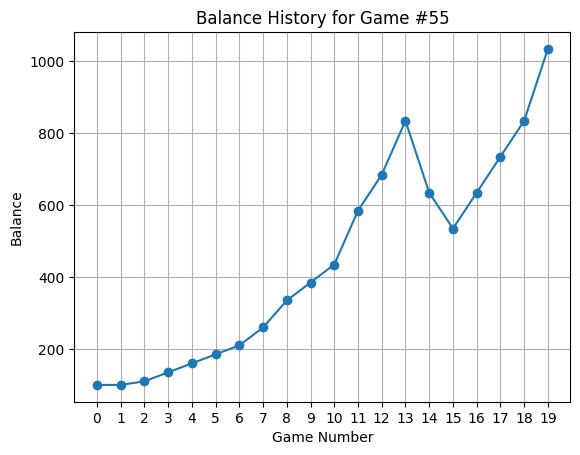

hands:  302
balance:  [100, 110.0, 110.0, 135.0, 110.0, 85.0, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 135.0, 110.0, 85.0, 95.0, 105.0, 80.0, 90.0, 90.0, 90.0, 100.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 185.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 135.0, 160.0, 135.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 160.0, 185.0, 210.0, 160.0, 135.0, 110.0, 110.0, 135.0, 160.0, 185.0, 160.0, 197.5, 222.5, 297.5, 347.5, 397.5, 447.5, 597.5, 497.5, 597.5, 697.5, 597.5, 497.5, 597.5, 497.5, 397.5, 397.5, 347.5, 397.5, 447.5, 347.5, 297.5, 247.5, 297.5, 347.5, 347.5, 297.5, 247.5, 297.5, 247.5, 197.5, 172.5, 147.5, 122.5, 147.5, 122.5, 147.5, 122.5, 122.5, 147.5, 147.5, 147.5, 122.5, 97.5, 107.5, 82.5, 82.5, 92.5, 82.5, 92.5, 82.5, 92.5, 102.5, 77.5, 87.5, 77.5, 87.5, 77.5, 87.5, 87.5, 102.5, 77.5, 87.5, 102.5, 140.0, 115.0, 140.0, 115.0, 140.0, 115.0, 140.0, 115.0, 115.0, 152.5, 177.5, 152.5, 190.0, 165.0, 190.0, 190.0, 165.0, 14

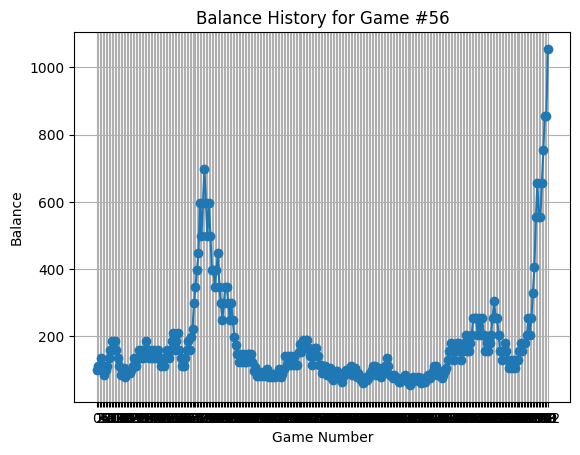

hands:  25
balance:  [100, 90.0, 100.0, 110.0, 85.0, 95.0, 85.0, 100.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 185.0, 210.0, 260.0, 310.0, 360.0, 360.0, 410.0, 510.0, 610.0, 710.0, 810.0, 1010.0]


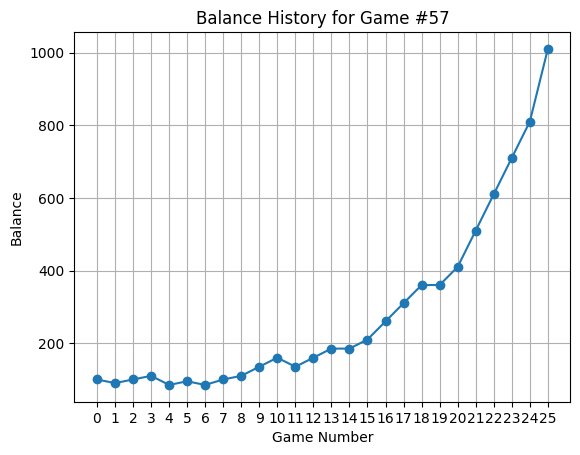

hands:  158
balance:  [100, 90.0, 100.0, 90.0, 100.0, 90.0, 80.0, 70.0, 60.0, 70.0, 80.0, 90.0, 80.0, 80.0, 70.0, 60.0, 70.0, 60.0, 70.0, 60.0, 70.0, 80.0, 90.0, 80.0, 90.0, 80.0, 80.0, 80.0, 90.0, 80.0, 90.0, 100.0, 100.0, 90.0, 100.0, 90.0, 100.0, 110.0, 135.0, 110.0, 135.0, 160.0, 160.0, 135.0, 160.0, 160.0, 185.0, 160.0, 135.0, 110.0, 85.0, 100.0, 110.0, 85.0, 85.0, 95.0, 85.0, 75.0, 65.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 75.0, 90.0, 80.0, 80.0, 90.0, 100.0, 100.0, 90.0, 90.0, 90.0, 90.0, 80.0, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 90.0, 80.0, 70.0, 70.0, 80.0, 70.0, 60.0, 70.0, 60.0, 70.0, 60.0, 60.0, 70.0, 60.0, 70.0, 60.0, 70.0, 80.0, 95.0, 105.0, 130.0, 105.0, 130.0, 105.0, 105.0, 80.0, 90.0, 80.0, 90.0, 90.0, 100.0, 90.0, 105.0, 130.0, 105.0, 130.0, 105.0, 130.0, 155.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 255.0, 330.0, 280.0, 330.0, 280.0, 230.0, 305.0, 255.0, 305.0, 355.0, 305.0, 255.0, 205.0, 255.0, 305.0, 355.0, 355.0, 305.0, 255.0, 305.0, 305.0, 255.0, 330.0, 380.

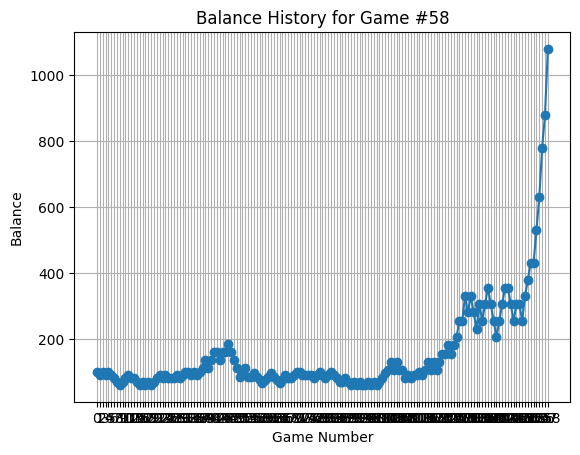

hands:  71
balance:  [100, 115.0, 152.5, 152.5, 177.5, 152.5, 177.5, 202.5, 152.5, 127.5, 152.5, 177.5, 152.5, 127.5, 127.5, 102.5, 77.5, 67.5, 77.5, 67.5, 67.5, 57.5, 57.5, 47.5, 57.5, 67.5, 57.5, 47.5, 37.5, 37.5, 47.5, 57.5, 67.5, 57.5, 47.5, 57.5, 72.5, 72.5, 62.5, 72.5, 82.5, 72.5, 62.5, 72.5, 82.5, 92.5, 82.5, 92.5, 92.5, 92.5, 102.5, 127.5, 165.0, 190.0, 215.0, 215.0, 265.0, 265.0, 315.0, 315.0, 265.0, 215.0, 265.0, 315.0, 365.0, 440.0, 540.0, 540.0, 640.0, 740.0, 840.0, 1040.0]


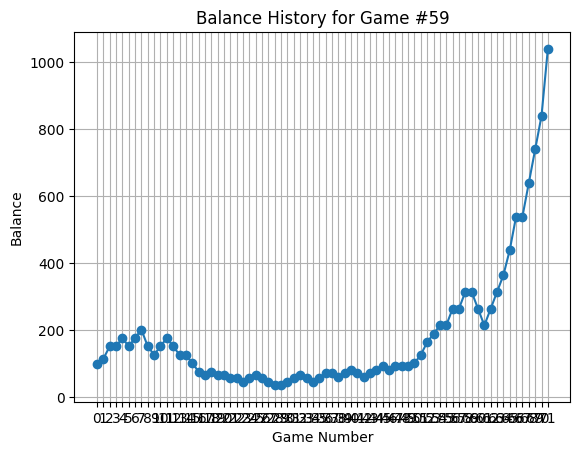

hands:  320
balance:  [100, 90.0, 90.0, 100.0, 110.0, 85.0, 75.0, 65.0, 55.0, 45.0, 45.0, 35.0, 25.0, 25.0, 35.0, 45.0, 45.0, 55.0, 70.0, 70.0, 60.0, 70.0, 80.0, 70.0, 80.0, 70.0, 60.0, 50.0, 60.0, 75.0, 65.0, 75.0, 65.0, 80.0, 70.0, 70.0, 80.0, 70.0, 80.0, 70.0, 80.0, 90.0, 100.0, 100.0, 110.0, 110.0, 147.5, 172.5, 147.5, 172.5, 197.5, 222.5, 272.5, 347.5, 297.5, 247.5, 297.5, 347.5, 347.5, 297.5, 347.5, 397.5, 347.5, 297.5, 372.5, 422.5, 322.5, 372.5, 372.5, 372.5, 422.5, 322.5, 372.5, 372.5, 422.5, 522.5, 422.5, 572.5, 472.5, 572.5, 472.5, 372.5, 322.5, 272.5, 222.5, 272.5, 222.5, 172.5, 147.5, 185.0, 210.0, 260.0, 310.0, 260.0, 210.0, 160.0, 160.0, 185.0, 210.0, 260.0, 310.0, 260.0, 310.0, 360.0, 310.0, 360.0, 410.0, 310.0, 360.0, 435.0, 535.0, 435.0, 335.0, 385.0, 435.0, 535.0, 435.0, 335.0, 385.0, 335.0, 410.0, 310.0, 260.0, 210.0, 210.0, 160.0, 197.5, 172.5, 147.5, 172.5, 197.5, 172.5, 197.5, 222.5, 272.5, 222.5, 272.5, 272.5, 272.5, 222.5, 172.5, 147.5, 122.5, 147.5, 172.5, 147

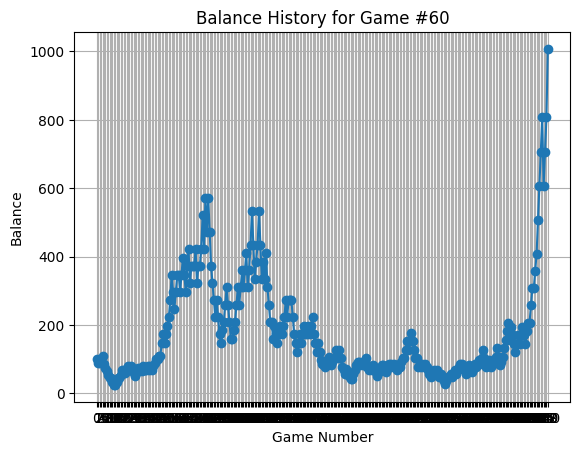

hands:  208
balance:  [100, 90.0, 100.0, 90.0, 80.0, 90.0, 90.0, 100.0, 90.0, 100.0, 100.0, 110.0, 135.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 197.5, 222.5, 272.5, 222.5, 297.5, 247.5, 197.5, 222.5, 222.5, 222.5, 172.5, 210.0, 260.0, 310.0, 260.0, 210.0, 210.0, 160.0, 185.0, 185.0, 185.0, 160.0, 160.0, 185.0, 160.0, 160.0, 185.0, 210.0, 260.0, 210.0, 260.0, 210.0, 260.0, 210.0, 210.0, 260.0, 210.0, 210.0, 210.0, 260.0, 210.0, 260.0, 210.0, 260.0, 210.0, 260.0, 310.0, 360.0, 360.0, 410.0, 410.0, 510.0, 660.0, 760.0, 660.0, 560.0, 560.0, 660.0, 560.0, 460.0, 360.0, 410.0, 310.0, 360.0, 410.0, 410.0, 310.0, 260.0, 210.0, 160.0, 185.0, 160.0, 135.0, 160.0, 197.5, 172.5, 197.5, 197.5, 172.5, 197.5, 222.5, 172.5, 147.5, 122.5, 97.5, 87.5, 97.5, 87.5, 97.5, 87.5, 97.5, 87.5, 77.5, 92.5, 102.5, 127.5, 152.5, 127.5, 152.5, 127.5, 102.5, 77.5, 87.5, 97.5, 107.5, 132.5, 107.5, 82.5, 72.5, 62.5, 52.5, 62.5, 52.5, 62.5, 72.5, 82.5, 72.5, 72.5, 82.5, 72.5, 62.5, 72.5, 87.5, 77.5, 92.5, 102.5, 1

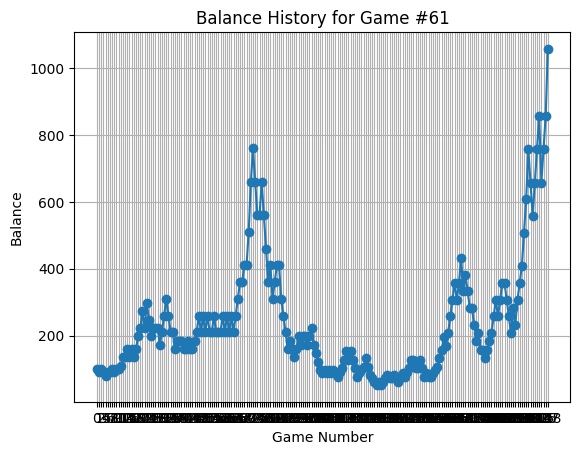

hands:  298
balance:  [100, 110.0, 135.0, 160.0, 135.0, 110.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 210.0, 210.0, 160.0, 135.0, 172.5, 172.5, 197.5, 222.5, 222.5, 222.5, 172.5, 147.5, 122.5, 147.5, 122.5, 147.5, 172.5, 147.5, 122.5, 147.5, 122.5, 97.5, 87.5, 97.5, 107.5, 132.5, 157.5, 195.0, 170.0, 207.5, 157.5, 182.5, 207.5, 157.5, 132.5, 157.5, 182.5, 207.5, 157.5, 132.5, 107.5, 132.5, 107.5, 82.5, 72.5, 72.5, 62.5, 72.5, 62.5, 72.5, 82.5, 97.5, 107.5, 145.0, 170.0, 145.0, 120.0, 157.5, 132.5, 157.5, 132.5, 132.5, 157.5, 132.5, 132.5, 107.5, 82.5, 72.5, 62.5, 62.5, 52.5, 62.5, 72.5, 82.5, 72.5, 72.5, 62.5, 72.5, 82.5, 72.5, 62.5, 72.5, 82.5, 72.5, 82.5, 72.5, 82.5, 82.5, 72.5, 82.5, 92.5, 82.5, 92.5, 82.5, 72.5, 62.5, 62.5, 62.5, 72.5, 82.5, 72.5, 62.5, 72.5, 62.5, 52.5, 42.5, 52.5, 62.5, 72.5, 82.5, 92.5, 102.5, 77.5, 87.5, 87.5, 97.5, 107.5, 82.5, 92.5, 82.5, 72.5, 62.5, 52.5, 67.5, 77.5, 87.5, 77.5, 67.5, 57.5, 47.5, 37.5, 27.5, 37.5, 37.5, 47.5, 3

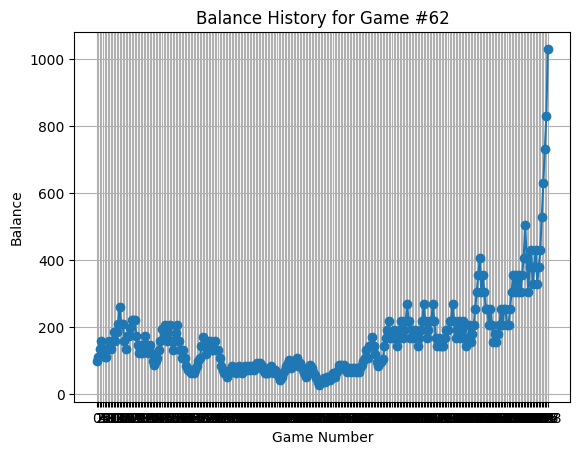

hands:  74
balance:  [100, 110.0, 135.0, 160.0, 185.0, 210.0, 160.0, 185.0, 160.0, 185.0, 160.0, 197.5, 172.5, 197.5, 172.5, 147.5, 122.5, 147.5, 122.5, 147.5, 172.5, 147.5, 172.5, 172.5, 197.5, 222.5, 172.5, 147.5, 185.0, 160.0, 185.0, 210.0, 260.0, 260.0, 310.0, 260.0, 310.0, 360.0, 310.0, 360.0, 310.0, 360.0, 410.0, 310.0, 360.0, 310.0, 360.0, 360.0, 360.0, 360.0, 310.0, 310.0, 360.0, 410.0, 510.0, 410.0, 560.0, 660.0, 560.0, 660.0, 760.0, 660.0, 560.0, 660.0, 760.0, 660.0, 560.0, 660.0, 560.0, 460.0, 610.0, 760.0, 760.0, 860.0, 1060.0]


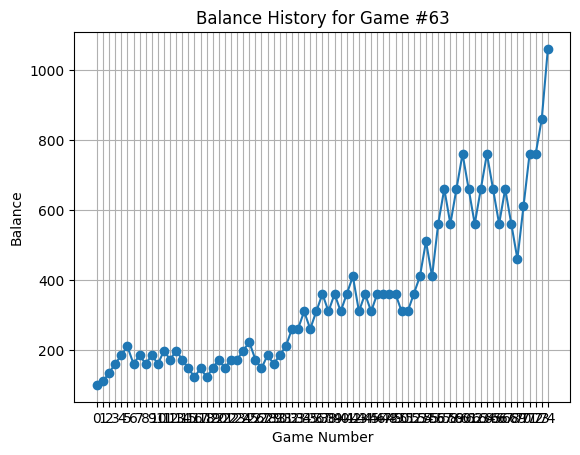

hands:  68
balance:  [100, 90.0, 80.0, 95.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 155.0, 180.0, 217.5, 267.5, 217.5, 167.5, 192.5, 217.5, 267.5, 317.5, 267.5, 267.5, 217.5, 292.5, 342.5, 392.5, 442.5, 342.5, 392.5, 342.5, 342.5, 292.5, 242.5, 292.5, 242.5, 192.5, 217.5, 267.5, 217.5, 267.5, 267.5, 317.5, 367.5, 317.5, 392.5, 342.5, 292.5, 342.5, 392.5, 442.5, 542.5, 442.5, 542.5, 442.5, 442.5, 442.5, 542.5, 442.5, 442.5, 442.5, 542.5, 642.5, 792.5, 792.5, 892.5, 692.5, 792.5, 892.5, 1092.5]


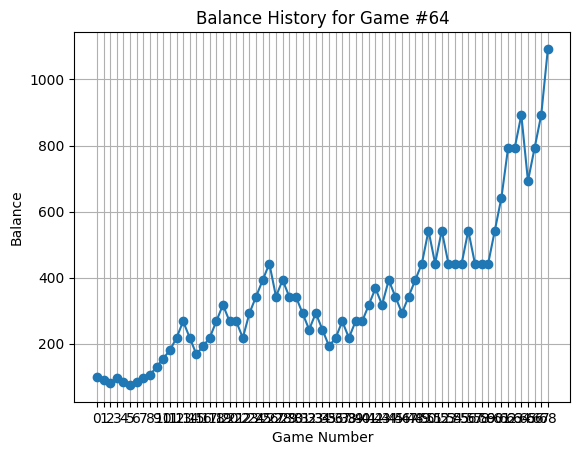

hands:  262
balance:  [100, 110.0, 85.0, 100.0, 110.0, 85.0, 100.0, 110.0, 85.0, 95.0, 105.0, 142.5, 167.5, 192.5, 217.5, 217.5, 267.5, 217.5, 167.5, 142.5, 117.5, 92.5, 102.5, 77.5, 87.5, 87.5, 97.5, 97.5, 107.5, 132.5, 107.5, 132.5, 107.5, 132.5, 107.5, 82.5, 92.5, 82.5, 72.5, 62.5, 52.5, 42.5, 52.5, 62.5, 72.5, 62.5, 52.5, 62.5, 62.5, 52.5, 62.5, 52.5, 52.5, 52.5, 62.5, 52.5, 42.5, 52.5, 62.5, 72.5, 62.5, 52.5, 42.5, 52.5, 42.5, 57.5, 67.5, 77.5, 67.5, 67.5, 57.5, 67.5, 57.5, 47.5, 62.5, 52.5, 62.5, 72.5, 62.5, 52.5, 62.5, 62.5, 52.5, 62.5, 72.5, 82.5, 92.5, 102.5, 77.5, 67.5, 77.5, 87.5, 97.5, 107.5, 82.5, 92.5, 102.5, 127.5, 102.5, 77.5, 77.5, 67.5, 57.5, 67.5, 77.5, 87.5, 97.5, 97.5, 87.5, 77.5, 87.5, 77.5, 92.5, 102.5, 77.5, 87.5, 77.5, 77.5, 77.5, 87.5, 77.5, 77.5, 87.5, 97.5, 97.5, 107.5, 107.5, 82.5, 97.5, 87.5, 77.5, 67.5, 77.5, 92.5, 82.5, 72.5, 62.5, 72.5, 87.5, 97.5, 107.5, 82.5, 92.5, 82.5, 92.5, 82.5, 72.5, 62.5, 77.5, 87.5, 77.5, 67.5, 77.5, 67.5, 57.5, 67.5, 77.5, 77.

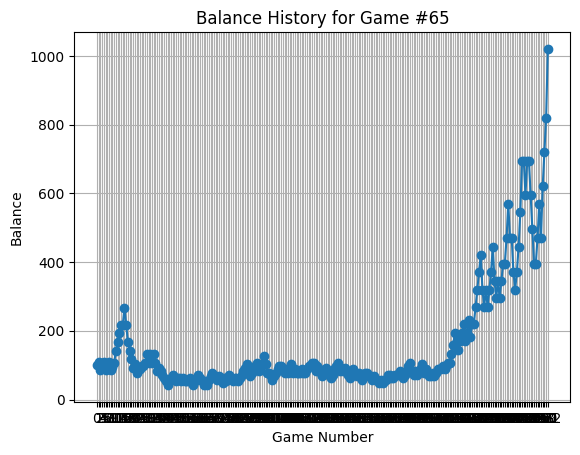

hands:  107
balance:  [100, 110.0, 85.0, 75.0, 75.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 105.0, 130.0, 155.0, 130.0, 105.0, 105.0, 130.0, 130.0, 155.0, 155.0, 180.0, 155.0, 180.0, 155.0, 130.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 180.0, 205.0, 255.0, 255.0, 205.0, 155.0, 130.0, 130.0, 105.0, 80.0, 70.0, 80.0, 70.0, 80.0, 90.0, 105.0, 130.0, 105.0, 130.0, 130.0, 105.0, 130.0, 155.0, 130.0, 167.5, 192.5, 217.5, 167.5, 167.5, 192.5, 167.5, 142.5, 180.0, 155.0, 130.0, 155.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 130.0, 105.0, 80.0, 70.0, 60.0, 70.0, 60.0, 60.0, 60.0, 50.0, 40.0, 30.0, 30.0, 30.0, 45.0, 45.0, 45.0, 35.0, 35.0, 25.0, 35.0, 25.0, 15.0, 25.0, 15.0, 25.0, 15.0, 15.0, 5.0, 10.0, 10.0, 10.0, 0.0]


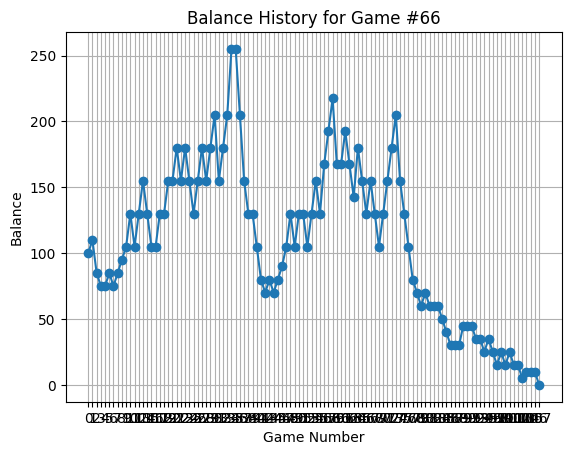

hands:  235
balance:  [100, 90.0, 80.0, 90.0, 90.0, 80.0, 90.0, 80.0, 90.0, 100.0, 90.0, 100.0, 100.0, 110.0, 147.5, 122.5, 97.5, 97.5, 107.5, 132.5, 157.5, 182.5, 157.5, 182.5, 157.5, 132.5, 157.5, 182.5, 157.5, 132.5, 107.5, 82.5, 72.5, 82.5, 82.5, 82.5, 92.5, 102.5, 77.5, 67.5, 67.5, 77.5, 77.5, 92.5, 82.5, 92.5, 102.5, 102.5, 77.5, 87.5, 77.5, 87.5, 97.5, 87.5, 97.5, 107.5, 145.0, 120.0, 95.0, 105.0, 105.0, 130.0, 155.0, 130.0, 105.0, 80.0, 90.0, 100.0, 90.0, 100.0, 110.0, 135.0, 160.0, 160.0, 185.0, 222.5, 172.5, 147.5, 122.5, 147.5, 147.5, 172.5, 147.5, 122.5, 97.5, 107.5, 145.0, 145.0, 182.5, 207.5, 157.5, 132.5, 157.5, 157.5, 132.5, 157.5, 182.5, 157.5, 182.5, 207.5, 157.5, 132.5, 107.5, 132.5, 157.5, 132.5, 157.5, 182.5, 157.5, 182.5, 157.5, 182.5, 207.5, 157.5, 182.5, 207.5, 257.5, 307.5, 357.5, 407.5, 557.5, 657.5, 757.5, 857.5, 657.5, 757.5, 657.5, 557.5, 457.5, 557.5, 457.5, 357.5, 357.5, 307.5, 307.5, 357.5, 407.5, 407.5, 407.5, 307.5, 357.5, 307.5, 357.5, 307.5, 357.5, 4

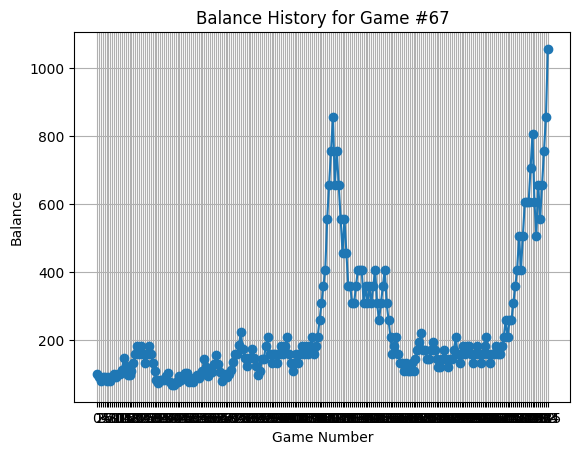

hands:  34
balance:  [100, 110.0, 135.0, 110.0, 147.5, 122.5, 97.5, 87.5, 87.5, 77.5, 67.5, 77.5, 67.5, 57.5, 67.5, 57.5, 67.5, 77.5, 87.5, 97.5, 87.5, 77.5, 67.5, 57.5, 47.5, 37.5, 37.5, 47.5, 37.5, 27.5, 17.5, 7.5, 15.0, 5.0, 0.0]


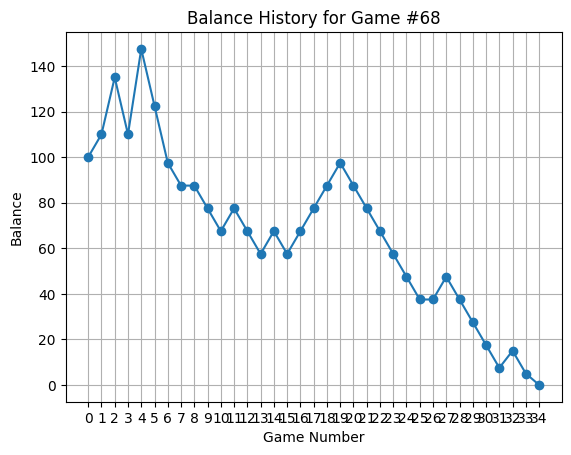

hands:  208
balance:  [100, 115.0, 140.0, 115.0, 90.0, 80.0, 90.0, 80.0, 90.0, 80.0, 70.0, 60.0, 70.0, 70.0, 60.0, 50.0, 60.0, 70.0, 70.0, 80.0, 90.0, 105.0, 130.0, 167.5, 167.5, 142.5, 167.5, 142.5, 167.5, 192.5, 167.5, 192.5, 217.5, 167.5, 192.5, 217.5, 217.5, 217.5, 267.5, 267.5, 217.5, 267.5, 217.5, 217.5, 267.5, 317.5, 267.5, 217.5, 167.5, 192.5, 217.5, 267.5, 217.5, 267.5, 217.5, 267.5, 342.5, 342.5, 392.5, 442.5, 342.5, 392.5, 342.5, 292.5, 342.5, 292.5, 242.5, 192.5, 192.5, 167.5, 142.5, 117.5, 92.5, 102.5, 77.5, 87.5, 87.5, 87.5, 97.5, 97.5, 107.5, 82.5, 92.5, 102.5, 102.5, 127.5, 152.5, 177.5, 152.5, 177.5, 152.5, 127.5, 102.5, 77.5, 67.5, 77.5, 87.5, 97.5, 87.5, 97.5, 112.5, 137.5, 162.5, 187.5, 187.5, 162.5, 187.5, 162.5, 137.5, 112.5, 87.5, 77.5, 67.5, 57.5, 47.5, 37.5, 47.5, 57.5, 72.5, 62.5, 52.5, 62.5, 52.5, 52.5, 62.5, 72.5, 62.5, 77.5, 67.5, 77.5, 87.5, 77.5, 67.5, 77.5, 92.5, 102.5, 140.0, 165.0, 190.0, 215.0, 265.0, 215.0, 165.0, 140.0, 165.0, 165.0, 190.0, 165.0, 2

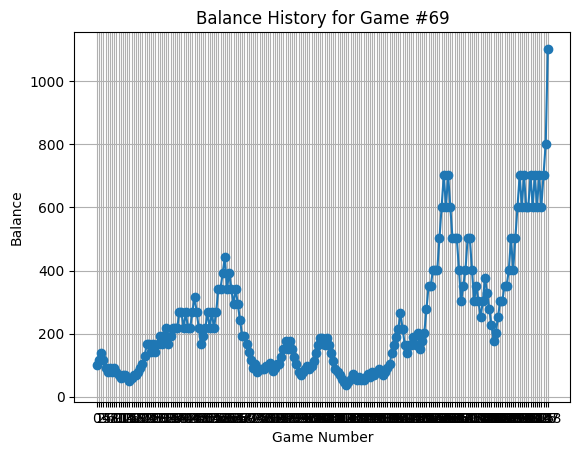

hands:  107
balance:  [100, 110.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 160.0, 185.0, 160.0, 135.0, 110.0, 135.0, 110.0, 85.0, 95.0, 110.0, 110.0, 85.0, 95.0, 85.0, 95.0, 105.0, 80.0, 70.0, 80.0, 95.0, 105.0, 80.0, 80.0, 90.0, 80.0, 90.0, 105.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 130.0, 130.0, 105.0, 130.0, 155.0, 130.0, 105.0, 130.0, 105.0, 130.0, 105.0, 130.0, 105.0, 105.0, 130.0, 155.0, 192.5, 167.5, 142.5, 117.5, 142.5, 167.5, 142.5, 167.5, 142.5, 167.5, 192.5, 167.5, 192.5, 167.5, 142.5, 142.5, 117.5, 92.5, 102.5, 77.5, 67.5, 57.5, 67.5, 77.5, 87.5, 97.5, 107.5, 132.5, 157.5, 182.5, 207.5, 257.5, 332.5, 382.5, 432.5, 532.5, 532.5, 432.5, 582.5, 482.5, 582.5, 682.5, 582.5, 682.5, 782.5, 682.5, 782.5, 882.5, 1082.5]


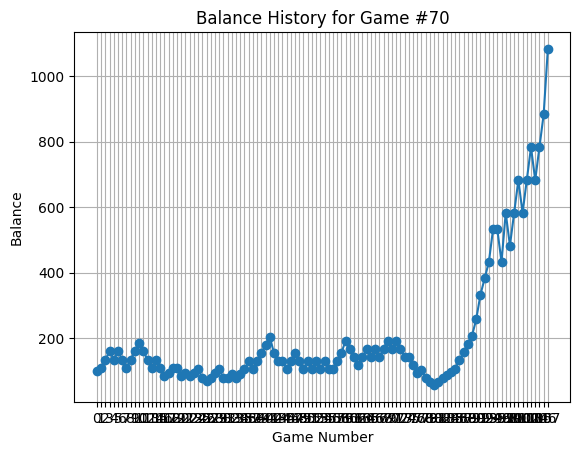

hands:  61
balance:  [100, 110.0, 85.0, 95.0, 85.0, 95.0, 105.0, 130.0, 155.0, 180.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 180.0, 205.0, 155.0, 180.0, 205.0, 155.0, 180.0, 205.0, 155.0, 130.0, 155.0, 180.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 305.0, 355.0, 405.0, 505.0, 405.0, 555.0, 455.0, 355.0, 355.0, 405.0, 305.0, 355.0, 405.0, 505.0, 605.0, 705.0, 605.0, 505.0, 405.0, 505.0, 605.0, 705.0, 605.0, 705.0, 605.0, 705.0, 805.0, 1005.0]


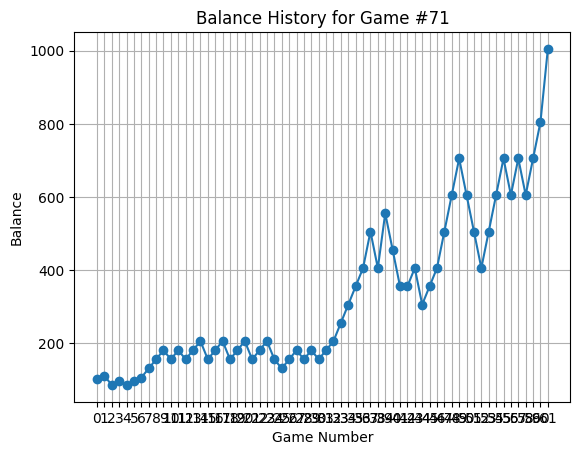

hands:  114
balance:  [100, 90.0, 90.0, 80.0, 70.0, 80.0, 70.0, 70.0, 80.0, 90.0, 80.0, 90.0, 90.0, 80.0, 70.0, 80.0, 80.0, 70.0, 60.0, 70.0, 60.0, 60.0, 75.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 105.0, 80.0, 90.0, 100.0, 100.0, 115.0, 115.0, 140.0, 165.0, 190.0, 215.0, 290.0, 240.0, 290.0, 240.0, 190.0, 215.0, 265.0, 215.0, 265.0, 265.0, 265.0, 315.0, 390.0, 340.0, 390.0, 340.0, 290.0, 240.0, 290.0, 340.0, 290.0, 340.0, 390.0, 340.0, 290.0, 240.0, 290.0, 290.0, 340.0, 290.0, 340.0, 390.0, 390.0, 340.0, 290.0, 240.0, 190.0, 165.0, 165.0, 165.0, 190.0, 165.0, 190.0, 215.0, 165.0, 140.0, 115.0, 140.0, 165.0, 190.0, 190.0, 165.0, 140.0, 115.0, 140.0, 165.0, 190.0, 215.0, 215.0, 265.0, 315.0, 315.0, 365.0, 415.0, 515.0, 415.0, 515.0, 415.0, 415.0, 415.0, 515.0, 615.0, 715.0, 815.0, 1015.0]


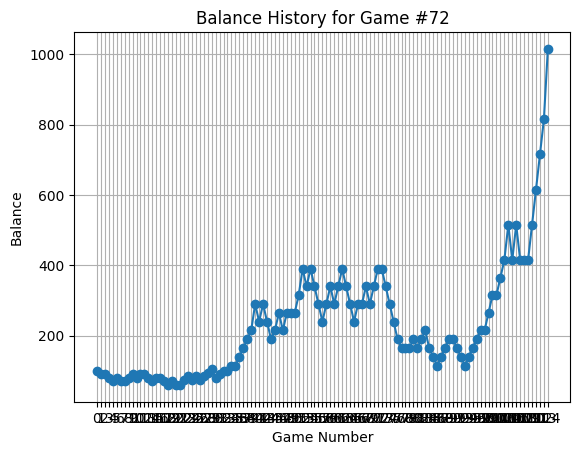

hands:  131
balance:  [100, 110.0, 135.0, 160.0, 185.0, 210.0, 210.0, 160.0, 185.0, 160.0, 135.0, 160.0, 135.0, 135.0, 160.0, 135.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 310.0, 310.0, 260.0, 210.0, 260.0, 210.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 110.0, 85.0, 95.0, 105.0, 80.0, 90.0, 80.0, 70.0, 60.0, 50.0, 40.0, 50.0, 40.0, 50.0, 50.0, 60.0, 70.0, 70.0, 80.0, 90.0, 80.0, 95.0, 105.0, 80.0, 70.0, 60.0, 50.0, 60.0, 50.0, 40.0, 30.0, 20.0, 30.0, 20.0, 20.0, 10.0, 20.0, 30.0, 40.0, 50.0, 40.0, 30.0, 20.0, 30.0, 40.0, 40.0, 50.0, 40.0, 50.0, 40.0, 30.0, 20.0, 35.0, 45.0, 55.0, 55.0, 70.0, 60.0, 50.0, 40.0, 50.0, 40.0, 30.0, 45.0, 35.0, 50.0, 40.0, 55.0, 65.0, 55.0, 65.0, 55.0, 65.0, 55.0, 45.0, 55.0, 65.0, 75.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 15.0, 25.0, 15.0, 25.0, 35.0, 45.0, 35.0, 25.0, 15.0, 5.0, 10.0, 0.0]


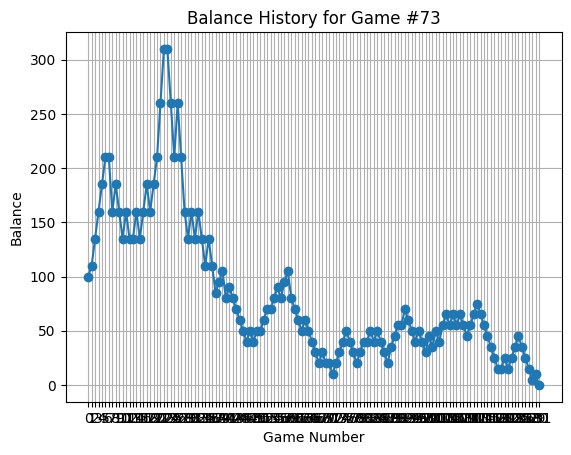

hands:  63
balance:  [100, 110.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 85.0, 95.0, 85.0, 75.0, 65.0, 55.0, 65.0, 75.0, 90.0, 80.0, 80.0, 90.0, 100.0, 110.0, 135.0, 110.0, 85.0, 85.0, 75.0, 85.0, 100.0, 90.0, 100.0, 100.0, 90.0, 100.0, 90.0, 80.0, 70.0, 60.0, 50.0, 65.0, 55.0, 45.0, 35.0, 25.0, 35.0, 25.0, 35.0, 25.0, 35.0, 45.0, 45.0, 55.0, 65.0, 55.0, 45.0, 35.0, 35.0, 35.0, 45.0, 35.0, 25.0, 15.0, 5.0, 0.0]


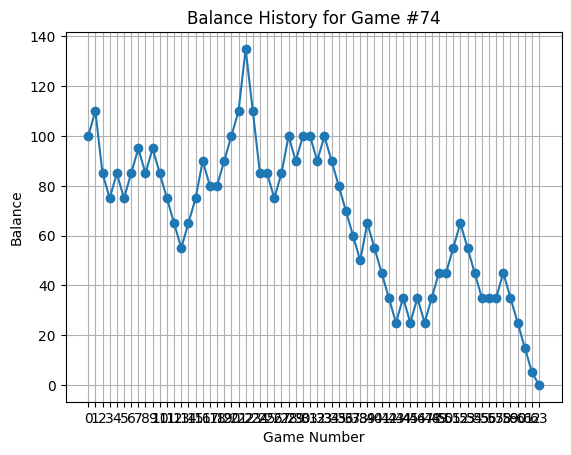

hands:  93
balance:  [100, 90.0, 100.0, 110.0, 110.0, 85.0, 75.0, 85.0, 95.0, 110.0, 110.0, 85.0, 75.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 85.0, 75.0, 65.0, 55.0, 65.0, 55.0, 45.0, 35.0, 45.0, 55.0, 45.0, 55.0, 65.0, 55.0, 45.0, 35.0, 35.0, 45.0, 35.0, 45.0, 55.0, 55.0, 45.0, 55.0, 65.0, 75.0, 85.0, 100.0, 110.0, 135.0, 110.0, 135.0, 135.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 185.0, 210.0, 285.0, 235.0, 185.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 310.0, 360.0, 410.0, 410.0, 510.0, 660.0, 560.0, 460.0, 460.0, 610.0, 510.0, 410.0, 410.0, 510.0, 410.0, 510.0, 410.0, 510.0, 410.0, 510.0, 510.0, 610.0, 710.0, 810.0, 1010.0]


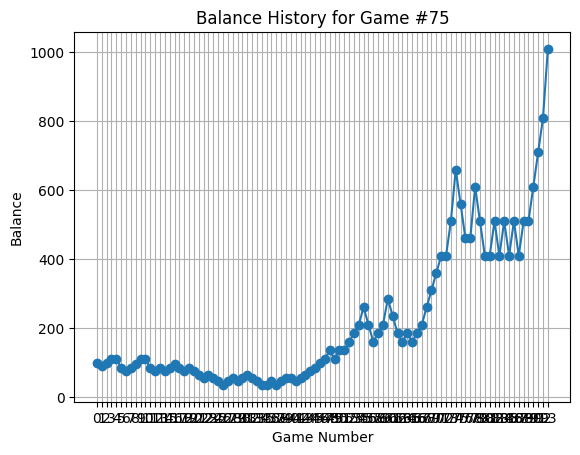

hands:  294
balance:  [100, 110.0, 135.0, 160.0, 135.0, 110.0, 110.0, 110.0, 85.0, 75.0, 65.0, 75.0, 65.0, 55.0, 45.0, 60.0, 50.0, 60.0, 70.0, 80.0, 70.0, 80.0, 70.0, 70.0, 60.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 135.0, 135.0, 172.5, 197.5, 172.5, 147.5, 122.5, 122.5, 122.5, 147.5, 122.5, 147.5, 147.5, 147.5, 122.5, 147.5, 147.5, 172.5, 197.5, 235.0, 285.0, 235.0, 285.0, 285.0, 235.0, 285.0, 335.0, 285.0, 360.0, 310.0, 260.0, 260.0, 210.0, 160.0, 185.0, 210.0, 260.0, 335.0, 385.0, 335.0, 385.0, 385.0, 335.0, 335.0, 285.0, 235.0, 185.0, 210.0, 160.0, 185.0, 160.0, 135.0, 135.0, 110.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 65.0, 75.0, 65.0, 75.0, 65.0, 65.0, 75.0, 65.0, 75.0, 85.0, 95.0, 95.0, 85.0, 75.0, 85.0, 95.0, 85.0, 75.0, 85.0, 85.0, 95.0, 105.0, 142.5, 167.5, 142.5, 117.5, 142.5, 142.5, 142.5, 117.5, 155.0, 130.0, 105.0, 130.0, 155.0, 180.0, 205.0, 155.0, 130.0, 155.0, 130.0, 105.0, 80.0, 70.0, 60.0, 50.0, 50.0, 50.0, 60.0, 60.0, 70.0, 70.0, 60.0, 70.0, 80.0, 70.0, 60.0, 50.0, 

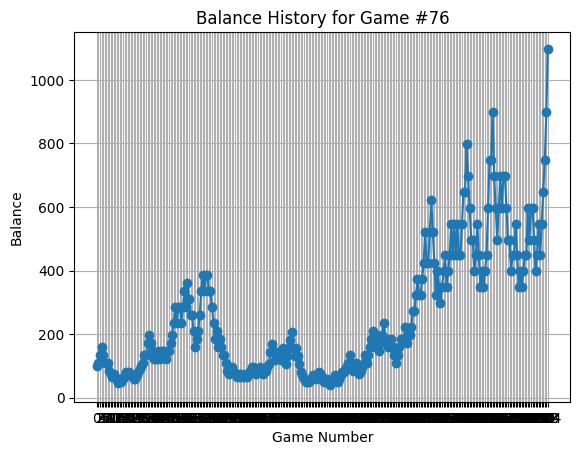

hands:  157
balance:  [100, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 135.0, 110.0, 135.0, 110.0, 135.0, 135.0, 135.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 310.0, 360.0, 410.0, 310.0, 360.0, 410.0, 410.0, 310.0, 360.0, 410.0, 310.0, 260.0, 260.0, 210.0, 260.0, 310.0, 360.0, 310.0, 310.0, 260.0, 310.0, 360.0, 310.0, 260.0, 310.0, 360.0, 410.0, 310.0, 260.0, 210.0, 160.0, 185.0, 210.0, 160.0, 135.0, 135.0, 110.0, 135.0, 135.0, 110.0, 135.0, 160.0, 185.0, 210.0, 160.0, 135.0, 172.5, 210.0, 160.0, 185.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 197.5, 222.5, 272.5, 272.5, 322.5, 322.5, 372.5, 322.5, 397.5, 347.5, 397.5, 447.5, 597.5, 597.5, 697.5, 797.5, 697.5, 597.5, 697.5, 797.5, 897.5, 697.5, 597.5, 697.5, 597.5, 697.5, 697.5, 697.5, 597.5, 597.5, 697.5, 797.5, 897.5, 697.5, 597.5, 497.5, 397.5, 347.5, 297.5, 372.5, 322.5, 397.5, 347.5, 297.5, 247.5, 197.5, 222.5, 272.5, 322.5, 322.5, 272.5, 222.5, 172.5, 197.5, 197.5, 197.5, 172.5, 147.5, 172.5, 197.5, 222.5,

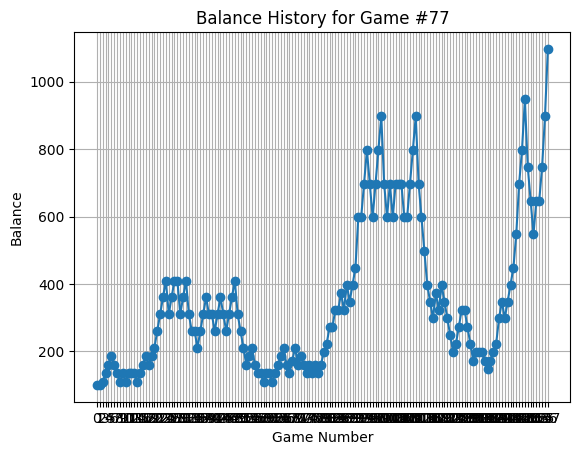

hands:  147
balance:  [100, 115.0, 140.0, 115.0, 90.0, 100.0, 110.0, 85.0, 95.0, 95.0, 85.0, 95.0, 105.0, 80.0, 90.0, 100.0, 100.0, 90.0, 100.0, 115.0, 90.0, 105.0, 130.0, 130.0, 105.0, 130.0, 167.5, 192.5, 192.5, 167.5, 142.5, 167.5, 142.5, 167.5, 192.5, 217.5, 217.5, 267.5, 217.5, 267.5, 217.5, 267.5, 217.5, 267.5, 217.5, 267.5, 217.5, 217.5, 267.5, 217.5, 267.5, 217.5, 292.5, 342.5, 342.5, 342.5, 392.5, 342.5, 417.5, 517.5, 517.5, 617.5, 617.5, 517.5, 417.5, 317.5, 367.5, 367.5, 317.5, 317.5, 267.5, 267.5, 217.5, 267.5, 217.5, 267.5, 267.5, 217.5, 167.5, 192.5, 167.5, 192.5, 167.5, 142.5, 167.5, 192.5, 167.5, 142.5, 167.5, 142.5, 142.5, 117.5, 142.5, 142.5, 167.5, 192.5, 217.5, 267.5, 217.5, 292.5, 367.5, 417.5, 317.5, 267.5, 317.5, 317.5, 367.5, 442.5, 342.5, 392.5, 442.5, 342.5, 292.5, 342.5, 342.5, 392.5, 442.5, 342.5, 392.5, 442.5, 342.5, 292.5, 342.5, 392.5, 342.5, 342.5, 392.5, 442.5, 542.5, 442.5, 542.5, 542.5, 442.5, 542.5, 642.5, 742.5, 642.5, 742.5, 642.5, 742.5, 642.5, 74

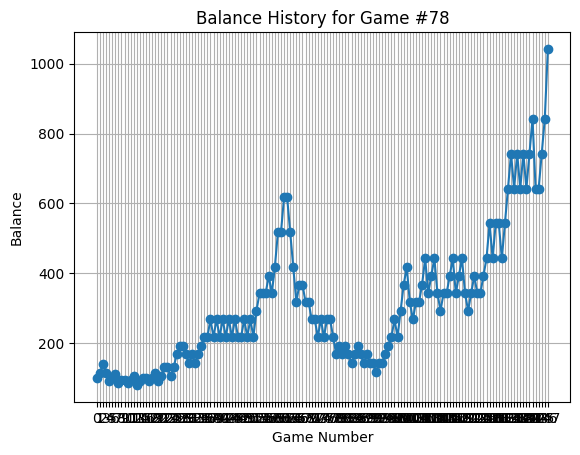

hands:  50
balance:  [100, 90.0, 80.0, 90.0, 90.0, 100.0, 110.0, 135.0, 110.0, 110.0, 135.0, 160.0, 135.0, 110.0, 135.0, 172.5, 197.5, 222.5, 172.5, 197.5, 222.5, 297.5, 347.5, 397.5, 447.5, 597.5, 497.5, 397.5, 447.5, 447.5, 547.5, 547.5, 647.5, 747.5, 897.5, 697.5, 597.5, 597.5, 697.5, 797.5, 897.5, 697.5, 597.5, 597.5, 497.5, 597.5, 697.5, 697.5, 797.5, 947.5, 1147.5]


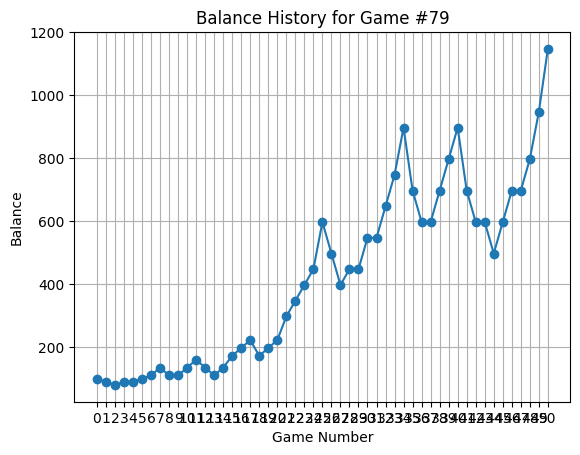

hands:  83
balance:  [100, 90.0, 80.0, 80.0, 90.0, 100.0, 90.0, 80.0, 90.0, 100.0, 115.0, 140.0, 165.0, 190.0, 215.0, 265.0, 215.0, 165.0, 165.0, 190.0, 165.0, 140.0, 140.0, 115.0, 90.0, 100.0, 90.0, 100.0, 100.0, 90.0, 100.0, 100.0, 100.0, 90.0, 80.0, 70.0, 70.0, 80.0, 70.0, 85.0, 95.0, 105.0, 142.5, 167.5, 142.5, 117.5, 155.0, 130.0, 155.0, 180.0, 205.0, 255.0, 305.0, 255.0, 255.0, 205.0, 155.0, 130.0, 155.0, 155.0, 180.0, 205.0, 255.0, 305.0, 380.0, 330.0, 280.0, 230.0, 280.0, 330.0, 280.0, 330.0, 280.0, 330.0, 380.0, 430.0, 530.0, 430.0, 580.0, 680.0, 680.0, 780.0, 880.0, 1080.0]


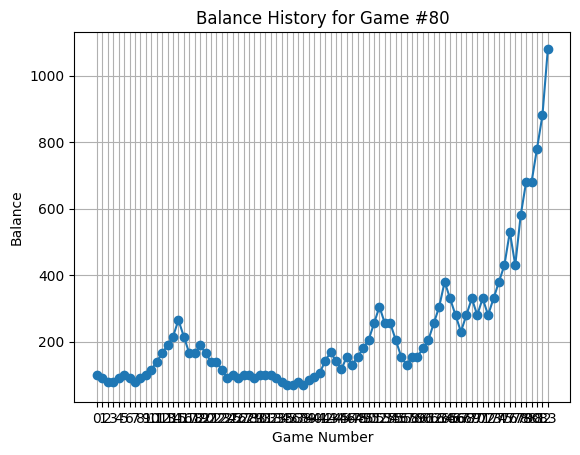

hands:  42
balance:  [100, 110.0, 110.0, 135.0, 160.0, 185.0, 160.0, 185.0, 160.0, 185.0, 210.0, 285.0, 235.0, 285.0, 285.0, 335.0, 385.0, 435.0, 535.0, 435.0, 335.0, 385.0, 335.0, 335.0, 385.0, 385.0, 335.0, 385.0, 460.0, 560.0, 560.0, 560.0, 460.0, 560.0, 660.0, 760.0, 660.0, 560.0, 460.0, 610.0, 710.0, 810.0, 1110.0]


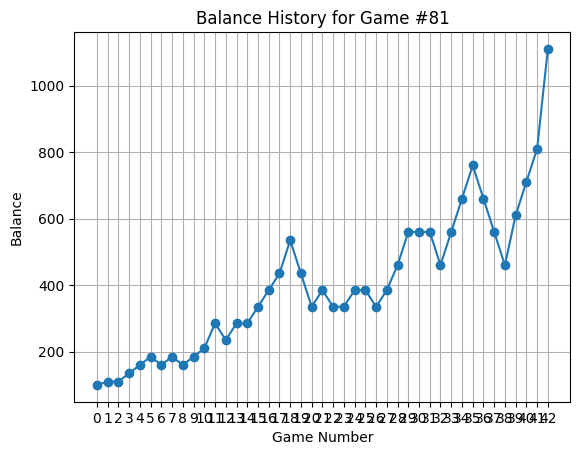

hands:  68
balance:  [100, 110.0, 135.0, 110.0, 135.0, 160.0, 160.0, 185.0, 160.0, 135.0, 160.0, 160.0, 185.0, 210.0, 210.0, 260.0, 260.0, 210.0, 260.0, 310.0, 360.0, 310.0, 360.0, 310.0, 385.0, 385.0, 335.0, 335.0, 385.0, 335.0, 410.0, 310.0, 360.0, 435.0, 535.0, 435.0, 535.0, 685.0, 585.0, 485.0, 585.0, 685.0, 835.0, 635.0, 735.0, 835.0, 635.0, 535.0, 435.0, 435.0, 335.0, 385.0, 435.0, 585.0, 685.0, 685.0, 785.0, 685.0, 585.0, 685.0, 785.0, 685.0, 685.0, 585.0, 485.0, 585.0, 685.0, 835.0, 1035.0]


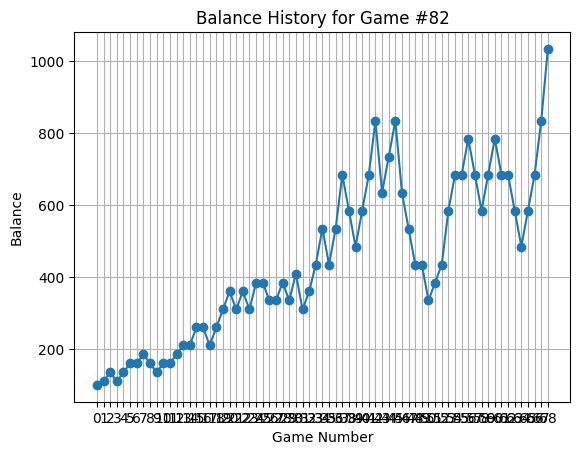

hands:  212
balance:  [100, 110.0, 85.0, 75.0, 85.0, 100.0, 90.0, 100.0, 110.0, 85.0, 95.0, 105.0, 130.0, 167.5, 192.5, 217.5, 267.5, 317.5, 317.5, 317.5, 317.5, 267.5, 217.5, 167.5, 142.5, 167.5, 192.5, 217.5, 167.5, 192.5, 217.5, 217.5, 167.5, 192.5, 217.5, 267.5, 217.5, 167.5, 142.5, 117.5, 92.5, 102.5, 77.5, 87.5, 97.5, 87.5, 97.5, 87.5, 97.5, 87.5, 87.5, 77.5, 92.5, 107.5, 145.0, 120.0, 145.0, 120.0, 145.0, 120.0, 95.0, 105.0, 130.0, 155.0, 130.0, 105.0, 105.0, 130.0, 155.0, 130.0, 155.0, 130.0, 167.5, 142.5, 167.5, 142.5, 142.5, 117.5, 92.5, 82.5, 92.5, 82.5, 72.5, 82.5, 82.5, 92.5, 92.5, 102.5, 140.0, 115.0, 115.0, 140.0, 165.0, 165.0, 140.0, 115.0, 90.0, 100.0, 115.0, 140.0, 165.0, 190.0, 215.0, 265.0, 315.0, 265.0, 215.0, 265.0, 315.0, 265.0, 215.0, 265.0, 265.0, 215.0, 265.0, 215.0, 265.0, 215.0, 165.0, 190.0, 165.0, 190.0, 165.0, 165.0, 190.0, 165.0, 165.0, 190.0, 215.0, 165.0, 140.0, 165.0, 190.0, 165.0, 190.0, 165.0, 165.0, 190.0, 215.0, 265.0, 265.0, 215.0, 215.0, 165.0, 

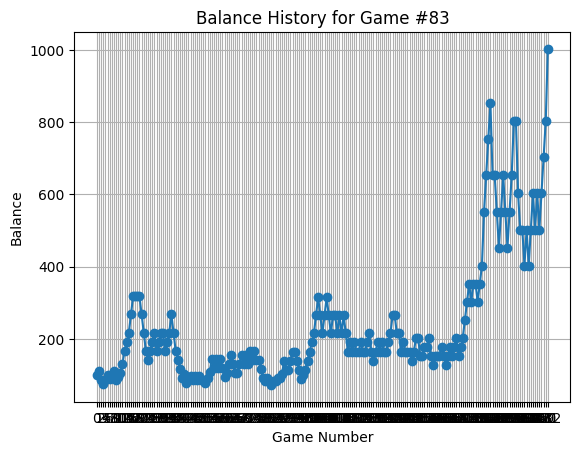

hands:  110
balance:  [100, 90.0, 100.0, 90.0, 80.0, 80.0, 90.0, 105.0, 130.0, 155.0, 192.5, 217.5, 267.5, 342.5, 392.5, 442.5, 342.5, 292.5, 242.5, 192.5, 217.5, 167.5, 192.5, 167.5, 205.0, 205.0, 155.0, 130.0, 155.0, 130.0, 105.0, 80.0, 70.0, 80.0, 80.0, 90.0, 80.0, 70.0, 80.0, 70.0, 60.0, 75.0, 75.0, 65.0, 55.0, 65.0, 75.0, 85.0, 75.0, 65.0, 75.0, 75.0, 85.0, 95.0, 85.0, 75.0, 85.0, 100.0, 110.0, 135.0, 110.0, 147.5, 122.5, 147.5, 122.5, 147.5, 122.5, 97.5, 87.5, 77.5, 92.5, 82.5, 72.5, 82.5, 82.5, 92.5, 102.5, 127.5, 152.5, 127.5, 165.0, 190.0, 227.5, 227.5, 277.5, 227.5, 277.5, 227.5, 277.5, 327.5, 277.5, 227.5, 277.5, 227.5, 177.5, 202.5, 252.5, 302.5, 302.5, 377.5, 327.5, 402.5, 502.5, 502.5, 402.5, 402.5, 502.5, 602.5, 702.5, 802.5, 1002.5]


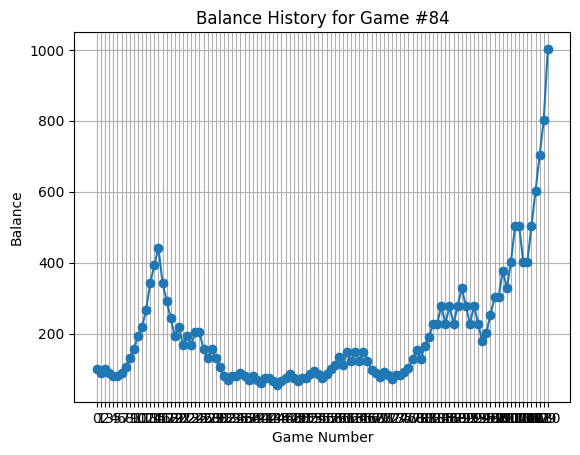

hands:  93
balance:  [100, 100.0, 90.0, 80.0, 70.0, 80.0, 90.0, 105.0, 105.0, 130.0, 155.0, 192.5, 167.5, 142.5, 167.5, 192.5, 217.5, 167.5, 192.5, 192.5, 167.5, 192.5, 192.5, 167.5, 192.5, 192.5, 217.5, 167.5, 142.5, 117.5, 142.5, 167.5, 192.5, 217.5, 267.5, 317.5, 267.5, 317.5, 367.5, 317.5, 367.5, 367.5, 367.5, 317.5, 367.5, 317.5, 317.5, 367.5, 417.5, 517.5, 417.5, 517.5, 617.5, 717.5, 617.5, 517.5, 517.5, 417.5, 317.5, 367.5, 417.5, 417.5, 517.5, 417.5, 517.5, 417.5, 317.5, 367.5, 417.5, 517.5, 417.5, 517.5, 667.5, 767.5, 867.5, 667.5, 567.5, 467.5, 367.5, 442.5, 592.5, 692.5, 792.5, 692.5, 592.5, 692.5, 592.5, 592.5, 692.5, 792.5, 692.5, 792.5, 892.5, 1192.5]


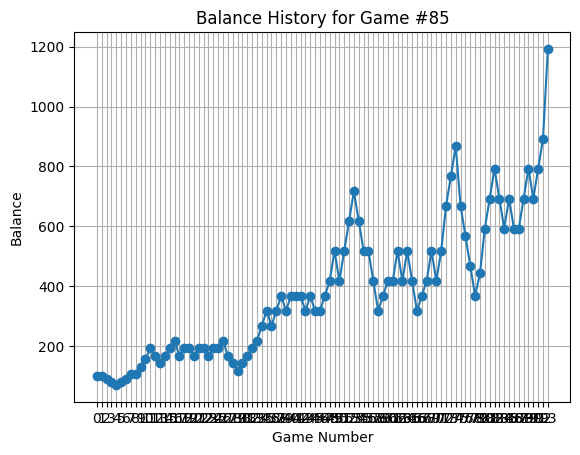

hands:  182
balance:  [100, 90.0, 100.0, 110.0, 135.0, 110.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 285.0, 235.0, 185.0, 160.0, 135.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 185.0, 210.0, 210.0, 160.0, 185.0, 160.0, 135.0, 172.5, 197.5, 222.5, 272.5, 322.5, 272.5, 322.5, 272.5, 272.5, 272.5, 222.5, 272.5, 322.5, 272.5, 222.5, 272.5, 222.5, 272.5, 222.5, 222.5, 272.5, 272.5, 272.5, 322.5, 397.5, 347.5, 422.5, 322.5, 272.5, 272.5, 222.5, 172.5, 210.0, 285.0, 285.0, 235.0, 185.0, 210.0, 260.0, 310.0, 310.0, 360.0, 310.0, 360.0, 360.0, 360.0, 410.0, 310.0, 260.0, 210.0, 160.0, 135.0, 110.0, 85.0, 95.0, 105.0, 130.0, 155.0, 130.0, 155.0, 155.0, 180.0, 180.0, 205.0, 255.0, 305.0, 355.0, 405.0, 305.0, 355.0, 405.0, 305.0, 305.0, 255.0, 255.0, 205.0, 155.0, 155.0, 130.0, 155.0, 180.0, 205.0, 205.0, 155.0, 130.0, 155.0, 180.0, 180.0, 205.0, 255.0, 205.0, 255.0, 305.0, 355.0, 405.0, 305.0, 255.0, 330.0, 380.0, 330.0, 380.0, 43

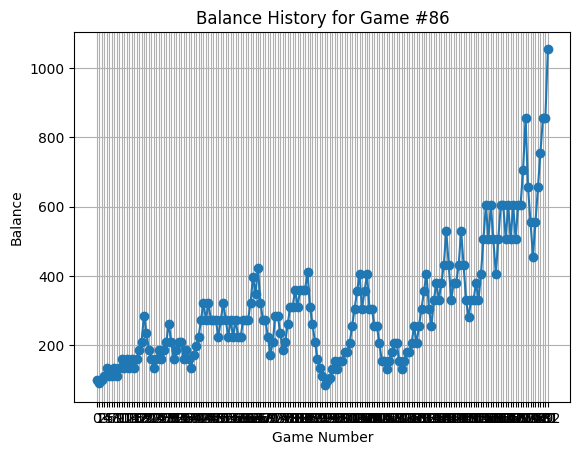

hands:  78
balance:  [100, 110.0, 85.0, 100.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 160.0, 135.0, 160.0, 185.0, 210.0, 160.0, 135.0, 160.0, 185.0, 185.0, 160.0, 160.0, 185.0, 210.0, 260.0, 210.0, 160.0, 185.0, 160.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 222.5, 222.5, 222.5, 172.5, 197.5, 172.5, 172.5, 197.5, 172.5, 172.5, 197.5, 172.5, 147.5, 122.5, 97.5, 97.5, 107.5, 132.5, 107.5, 132.5, 132.5, 157.5, 132.5, 157.5, 182.5, 157.5, 195.0, 220.0, 170.0, 195.0, 220.0, 270.0, 320.0, 270.0, 270.0, 320.0, 370.0, 420.0, 520.0, 620.0, 720.0, 820.0, 1020.0]


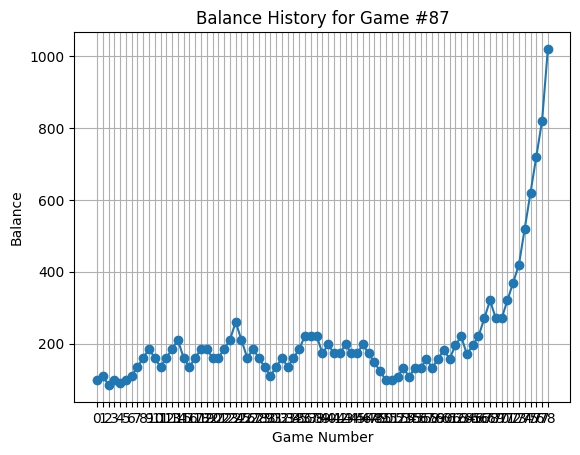

hands:  38
balance:  [100, 110.0, 85.0, 95.0, 85.0, 75.0, 85.0, 75.0, 75.0, 75.0, 85.0, 75.0, 75.0, 65.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 142.5, 167.5, 167.5, 142.5, 142.5, 167.5, 192.5, 192.5, 217.5, 217.5, 267.5, 317.5, 367.5, 417.5, 517.5, 617.5, 717.5, 817.5, 1017.5]


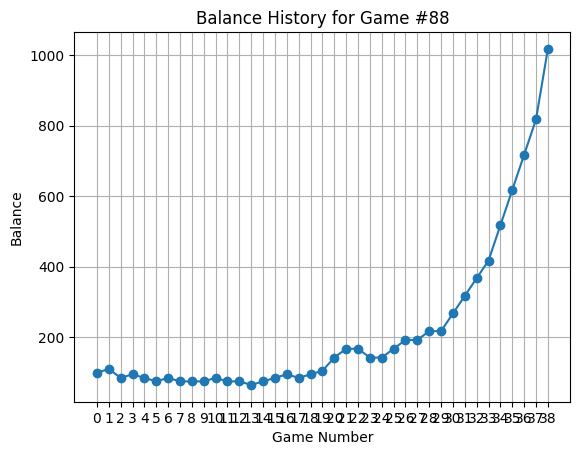

hands:  197
balance:  [100, 110.0, 85.0, 95.0, 95.0, 95.0, 105.0, 130.0, 155.0, 130.0, 155.0, 130.0, 155.0, 130.0, 155.0, 155.0, 130.0, 155.0, 130.0, 105.0, 80.0, 90.0, 100.0, 110.0, 135.0, 172.5, 197.5, 222.5, 222.5, 172.5, 197.5, 172.5, 197.5, 172.5, 147.5, 147.5, 122.5, 122.5, 147.5, 122.5, 160.0, 185.0, 210.0, 260.0, 310.0, 360.0, 310.0, 260.0, 210.0, 160.0, 135.0, 110.0, 85.0, 95.0, 85.0, 95.0, 85.0, 95.0, 105.0, 105.0, 130.0, 105.0, 80.0, 70.0, 85.0, 95.0, 110.0, 135.0, 110.0, 110.0, 135.0, 110.0, 85.0, 95.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 155.0, 180.0, 205.0, 255.0, 305.0, 255.0, 255.0, 330.0, 380.0, 430.0, 530.0, 430.0, 330.0, 280.0, 330.0, 280.0, 230.0, 280.0, 330.0, 380.0, 430.0, 330.0, 280.0, 230.0, 280.0, 330.0, 280.0, 330.0, 380.0, 330.0, 330.0, 280.0, 230.0, 280.0, 230.0, 280.0, 330.0, 330.0, 280.0, 230.0, 280.0, 230.0, 280.0, 280.0, 330.0, 380.0, 430.0, 330.0, 380.0, 330.0, 380.0, 430.0, 530.0, 430.0, 330.0, 380.0, 430.0, 330.0, 380.0, 380.0, 455.0, 555.0, 455.0, 

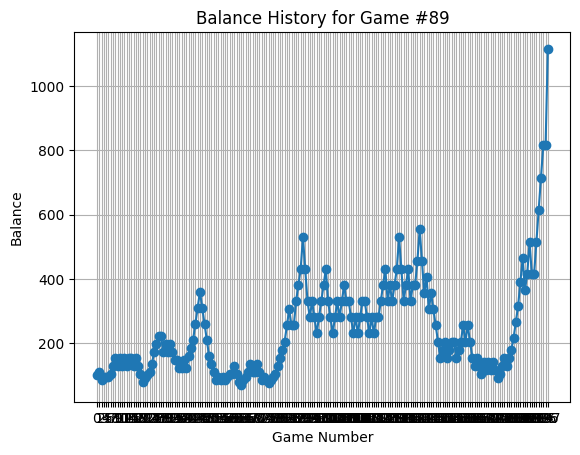

hands:  60
balance:  [100, 90.0, 80.0, 90.0, 90.0, 100.0, 100.0, 110.0, 135.0, 110.0, 135.0, 160.0, 185.0, 210.0, 160.0, 185.0, 210.0, 160.0, 135.0, 160.0, 135.0, 160.0, 160.0, 185.0, 210.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 85.0, 75.0, 85.0, 95.0, 105.0, 130.0, 155.0, 180.0, 205.0, 255.0, 255.0, 330.0, 280.0, 330.0, 380.0, 430.0, 530.0, 530.0, 680.0, 580.0, 680.0, 680.0, 780.0, 880.0, 1080.0]


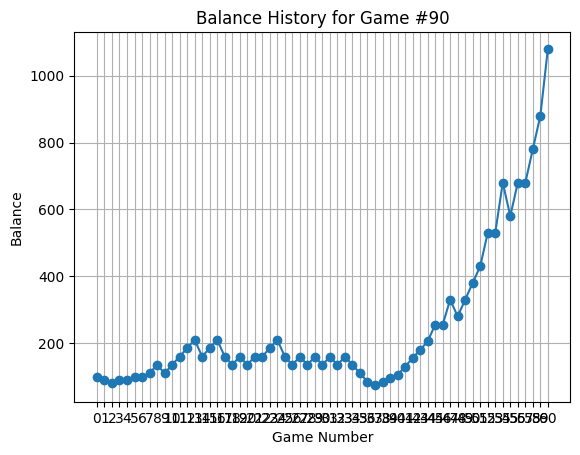

hands:  256
balance:  [100, 110.0, 85.0, 75.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 80.0, 70.0, 60.0, 50.0, 40.0, 50.0, 40.0, 30.0, 40.0, 30.0, 45.0, 55.0, 45.0, 55.0, 65.0, 75.0, 90.0, 100.0, 110.0, 110.0, 135.0, 160.0, 135.0, 110.0, 135.0, 160.0, 185.0, 160.0, 135.0, 110.0, 85.0, 95.0, 105.0, 80.0, 90.0, 80.0, 95.0, 110.0, 147.5, 172.5, 147.5, 172.5, 172.5, 197.5, 172.5, 147.5, 172.5, 197.5, 197.5, 172.5, 147.5, 122.5, 147.5, 172.5, 147.5, 147.5, 172.5, 210.0, 160.0, 185.0, 160.0, 185.0, 160.0, 135.0, 110.0, 85.0, 75.0, 65.0, 75.0, 85.0, 85.0, 75.0, 90.0, 105.0, 130.0, 155.0, 180.0, 205.0, 205.0, 155.0, 180.0, 205.0, 205.0, 155.0, 130.0, 155.0, 180.0, 155.0, 192.5, 217.5, 267.5, 317.5, 267.5, 317.5, 392.5, 442.5, 342.5, 392.5, 442.5, 442.5, 342.5, 292.5, 342.5, 292.5, 342.5, 392.5, 342.5, 292.5, 292.5, 292.5, 242.5, 242.5, 192.5, 217.5, 167.5, 167.5, 192.5, 217.5, 167.5, 142.5, 117.5, 92.5, 82.5, 92.5, 102.5, 127.5, 165.0, 190.0, 215.0, 165.0, 190.0, 215.0, 265.0, 315.0, 265.0, 315.0

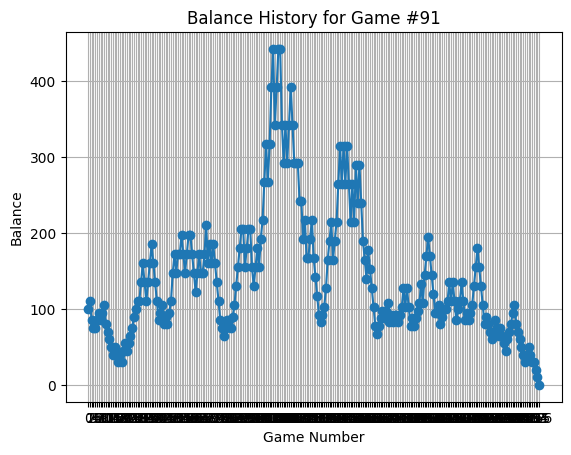

hands:  89
balance:  [100, 110.0, 135.0, 160.0, 160.0, 185.0, 185.0, 185.0, 222.5, 172.5, 197.5, 172.5, 147.5, 147.5, 147.5, 147.5, 147.5, 172.5, 147.5, 172.5, 172.5, 197.5, 222.5, 172.5, 147.5, 122.5, 97.5, 107.5, 107.5, 107.5, 82.5, 72.5, 62.5, 72.5, 62.5, 72.5, 72.5, 82.5, 92.5, 82.5, 72.5, 62.5, 52.5, 42.5, 57.5, 67.5, 77.5, 87.5, 77.5, 87.5, 77.5, 77.5, 77.5, 77.5, 87.5, 97.5, 87.5, 77.5, 77.5, 67.5, 77.5, 77.5, 77.5, 87.5, 77.5, 67.5, 57.5, 67.5, 57.5, 47.5, 37.5, 27.5, 37.5, 27.5, 37.5, 27.5, 17.5, 27.5, 37.5, 27.5, 17.5, 27.5, 37.5, 27.5, 17.5, 7.5, 15.0, 5.0, 5.0, 0.0]


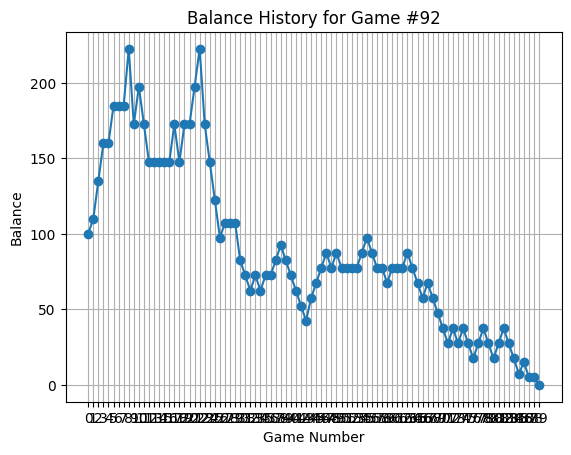

hands:  49
balance:  [100, 90.0, 90.0, 100.0, 90.0, 80.0, 90.0, 80.0, 80.0, 95.0, 95.0, 85.0, 75.0, 85.0, 95.0, 85.0, 85.0, 85.0, 95.0, 110.0, 85.0, 95.0, 105.0, 80.0, 70.0, 60.0, 50.0, 40.0, 30.0, 20.0, 10.0, 20.0, 30.0, 20.0, 10.0, 25.0, 15.0, 25.0, 15.0, 25.0, 15.0, 5.0, 10.0, 20.0, 10.0, 20.0, 30.0, 20.0, 10.0, 0.0]


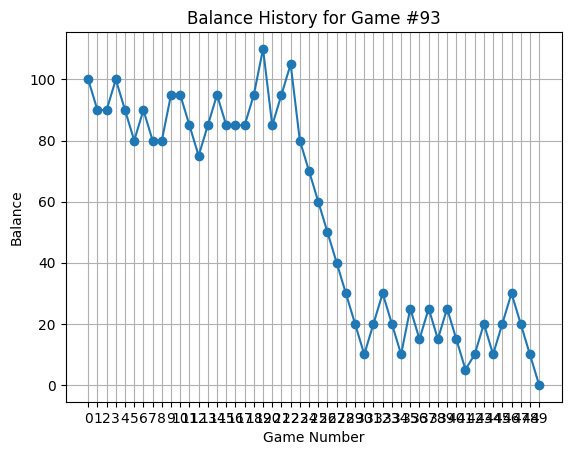

hands:  97
balance:  [100, 90.0, 80.0, 70.0, 80.0, 90.0, 80.0, 95.0, 85.0, 95.0, 85.0, 85.0, 75.0, 65.0, 55.0, 70.0, 60.0, 50.0, 65.0, 75.0, 65.0, 75.0, 75.0, 65.0, 55.0, 65.0, 80.0, 90.0, 100.0, 110.0, 85.0, 95.0, 105.0, 105.0, 130.0, 155.0, 130.0, 155.0, 180.0, 205.0, 155.0, 130.0, 105.0, 130.0, 130.0, 105.0, 130.0, 155.0, 130.0, 105.0, 130.0, 155.0, 180.0, 155.0, 180.0, 205.0, 155.0, 130.0, 155.0, 192.5, 192.5, 192.5, 167.5, 142.5, 117.5, 92.5, 92.5, 82.5, 72.5, 62.5, 77.5, 67.5, 82.5, 92.5, 102.5, 102.5, 140.0, 165.0, 140.0, 115.0, 140.0, 115.0, 90.0, 100.0, 110.0, 85.0, 75.0, 65.0, 55.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0, 10.0, 0.0]


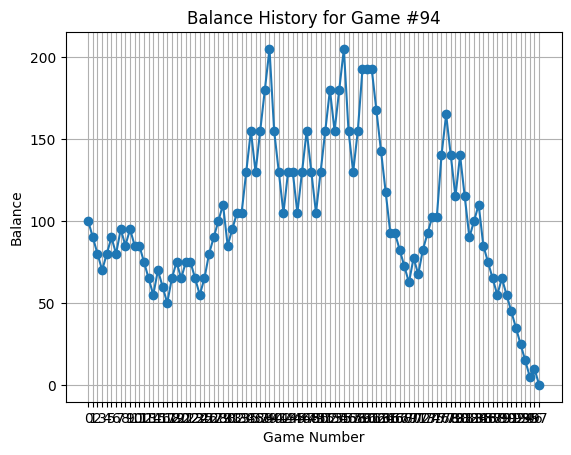

hands:  112
balance:  [100, 90.0, 80.0, 70.0, 60.0, 60.0, 60.0, 75.0, 85.0, 95.0, 105.0, 105.0, 80.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 222.5, 172.5, 197.5, 172.5, 147.5, 172.5, 197.5, 172.5, 197.5, 222.5, 272.5, 222.5, 172.5, 210.0, 260.0, 210.0, 210.0, 260.0, 310.0, 360.0, 310.0, 360.0, 310.0, 360.0, 410.0, 510.0, 610.0, 710.0, 610.0, 710.0, 710.0, 610.0, 710.0, 610.0, 510.0, 410.0, 510.0, 410.0, 310.0, 310.0, 260.0, 260.0, 210.0, 210.0, 260.0, 310.0, 360.0, 435.0, 535.0, 635.0, 735.0, 635.0, 735.0, 635.0, 535.0, 635.0, 735.0, 635.0, 535.0, 635.0, 535.0, 435.0, 535.0, 635.0, 535.0, 635.0, 785.0, 685.0, 785.0, 935.0, 735.0, 635.0, 735.0, 835.0, 635.0, 735.0, 835.0, 635.0, 535.0, 635.0, 535.0, 635.0, 735.0, 735.0, 835.0, 635.0, 735.0, 885.0, 685.0, 785.0, 885.0, 1085.0]


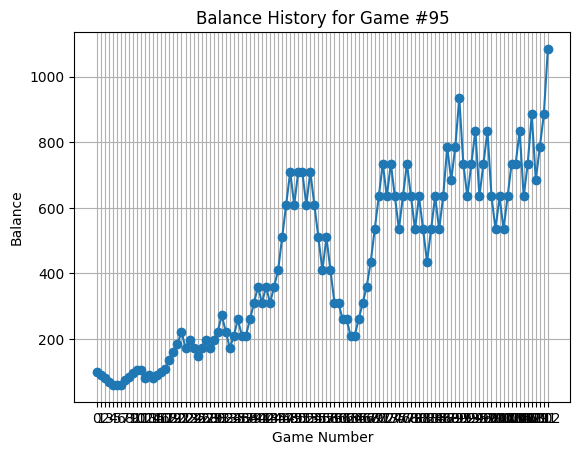

hands:  99
balance:  [100, 90.0, 80.0, 70.0, 60.0, 50.0, 40.0, 50.0, 40.0, 40.0, 30.0, 40.0, 30.0, 30.0, 20.0, 35.0, 45.0, 55.0, 45.0, 55.0, 65.0, 55.0, 65.0, 55.0, 45.0, 45.0, 55.0, 65.0, 55.0, 65.0, 55.0, 65.0, 75.0, 85.0, 95.0, 85.0, 95.0, 105.0, 130.0, 105.0, 105.0, 130.0, 155.0, 130.0, 155.0, 180.0, 205.0, 255.0, 255.0, 305.0, 255.0, 205.0, 205.0, 155.0, 180.0, 205.0, 255.0, 305.0, 305.0, 255.0, 305.0, 355.0, 305.0, 305.0, 255.0, 205.0, 255.0, 305.0, 255.0, 255.0, 305.0, 355.0, 430.0, 530.0, 630.0, 530.0, 430.0, 330.0, 380.0, 430.0, 530.0, 630.0, 730.0, 630.0, 730.0, 630.0, 530.0, 430.0, 530.0, 430.0, 530.0, 530.0, 630.0, 530.0, 430.0, 530.0, 630.0, 780.0, 880.0, 1080.0]


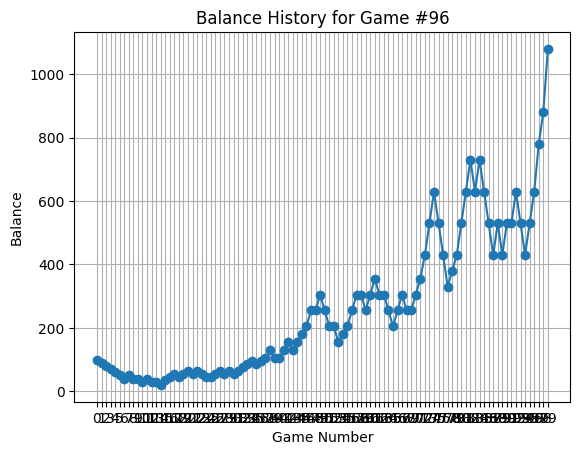

hands:  293
balance:  [100, 90.0, 80.0, 90.0, 80.0, 90.0, 100.0, 110.0, 135.0, 160.0, 185.0, 210.0, 160.0, 185.0, 160.0, 160.0, 185.0, 185.0, 210.0, 160.0, 185.0, 160.0, 135.0, 110.0, 135.0, 160.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 210.0, 285.0, 235.0, 185.0, 210.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 260.0, 210.0, 160.0, 185.0, 160.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 85.0, 95.0, 105.0, 130.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 205.0, 155.0, 130.0, 155.0, 130.0, 155.0, 180.0, 155.0, 180.0, 155.0, 130.0, 155.0, 155.0, 130.0, 155.0, 192.5, 192.5, 217.5, 167.5, 142.5, 117.5, 92.5, 102.5, 77.5, 87.5, 97.5, 112.5, 137.5, 112.5, 87.5, 97.5, 107.5, 82.5, 72.5, 72.5, 62.5, 72.5, 82.5, 72.5, 82.5, 92.5, 102.5, 127.5, 152.5, 127.5, 102.5, 127.5, 152.5, 127.5, 127.5, 152.5, 177.5, 202.5, 252.5, 202.5, 252.5, 302.5, 252.5, 302.5, 252.5, 202.5, 152.5, 152.5, 127.5, 152.5, 177.5, 152.5, 127.5, 152.5, 152.5, 190.0, 215.0, 165.0, 190.0, 165.0, 190.0, 215.0, 265.0, 215.0, 

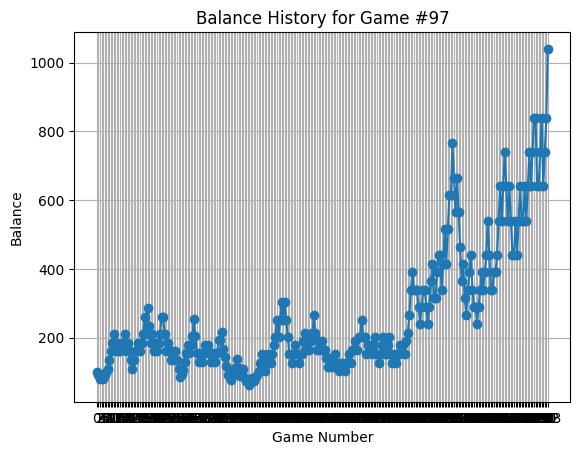

hands:  44
balance:  [100, 110.0, 85.0, 75.0, 85.0, 95.0, 85.0, 95.0, 85.0, 95.0, 105.0, 130.0, 105.0, 105.0, 130.0, 105.0, 130.0, 155.0, 180.0, 155.0, 180.0, 205.0, 255.0, 305.0, 355.0, 405.0, 305.0, 255.0, 330.0, 380.0, 430.0, 330.0, 380.0, 430.0, 530.0, 630.0, 530.0, 630.0, 530.0, 430.0, 530.0, 630.0, 730.0, 830.0, 1030.0]


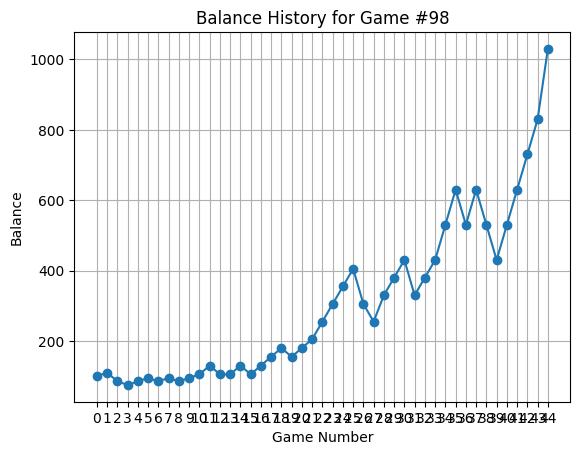

hands:  286
balance:  [100, 110.0, 135.0, 160.0, 135.0, 160.0, 185.0, 210.0, 260.0, 210.0, 210.0, 260.0, 260.0, 210.0, 260.0, 310.0, 260.0, 310.0, 385.0, 335.0, 285.0, 285.0, 335.0, 285.0, 335.0, 285.0, 235.0, 285.0, 335.0, 385.0, 435.0, 335.0, 385.0, 435.0, 535.0, 435.0, 535.0, 535.0, 685.0, 585.0, 485.0, 385.0, 435.0, 335.0, 285.0, 235.0, 185.0, 160.0, 185.0, 160.0, 185.0, 210.0, 260.0, 310.0, 360.0, 410.0, 410.0, 510.0, 410.0, 310.0, 260.0, 310.0, 260.0, 210.0, 260.0, 335.0, 285.0, 235.0, 285.0, 335.0, 385.0, 335.0, 285.0, 235.0, 285.0, 335.0, 285.0, 335.0, 285.0, 235.0, 285.0, 335.0, 285.0, 360.0, 310.0, 360.0, 410.0, 310.0, 360.0, 360.0, 410.0, 310.0, 260.0, 210.0, 260.0, 310.0, 260.0, 310.0, 360.0, 410.0, 310.0, 360.0, 410.0, 510.0, 410.0, 310.0, 360.0, 310.0, 260.0, 310.0, 260.0, 210.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 135.0, 110.0, 135.0, 160.0, 135.0, 160.0, 135.0, 110.0, 85.0, 75.0, 65.0, 55.0, 65.0, 75.0, 75.0, 65.0, 55.0, 6

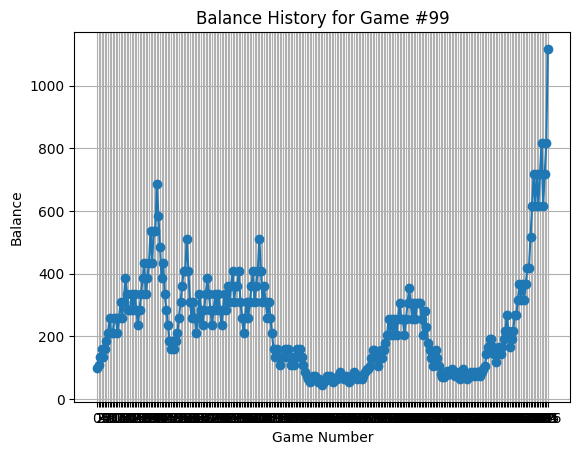

In [184]:
import matplotlib.pyplot as plt

# Step 1: Read the File
def plot_game_history(game_number):
    with open('game_history.txt', 'r') as file:
        lines = file.readlines()
    # Step 2: Extract Balance Values
    balances = [100]
    current_game = -1
    collect_balances = False
    hands = 0
    # now find the balance values
    for line in lines:
        if "~~~~~  Game" in line:
            current_game += 1
            if current_game > game_number:
                break  
            if current_game == game_number:
                collect_balances = True  # Start collecting balances from the next line
        elif collect_balances:
            if "balance" in line:
                hands += 1
                balance = float(line.split()[-1])
                balances.append(balance)
            elif "~~~~~" in line:
                collect_balances = False  # Stop collecting balances after the game ends

    print("hands: ", hands)
    print("balance: ", balances)
    # Step 3: Plot the Balance History
    plt.plot(balances, marker='o')  # Use a marker for each balance point
    plt.xlabel('Game Number')
    plt.ylabel('Balance')
    plt.title('Balance History for Game #' + str(game_number))
    plt.xticks(range(len(balances)))  # Set x-ticks to match the number of games
    plt.grid(True)
    plt.show()

for i in range(100):
    plot_game_history(i)